<a href="https://colab.research.google.com/github/massivedesigns/Machine-learning-prediction-for-Soccer-Team-performance/blob/main/Copy_of_finalcodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
# df = pd.read_csv('/content/drive/MyDrive/merged_df.csv')

alls = pd.read_csv('/content/drive/MyDrive/attributes.csv')
alls.head()

Player     Season        Date  Day            Comp  \
0       vicente guaita  2022-2023  2022-08-05  fri  premier league   
1  oleksandr zinchenko  2022-2023  2022-08-05  fri  premier league   
2          matt turner  2022-2023  2022-08-05  fri  premier league   
3       kieran tierney  2022-2023  2022-08-05  fri  premier league   
4        eddie nketiah  2022-2023  2022-08-05  fri  premier league   

         Round Venue Result           Squad        Opponent Start  \
0  matchweek 1  home  l 0–2  crystal palace         arsenal     y   
1  matchweek 1  away  w 2–0         arsenal  crystal palace     y   
2  matchweek 1  away  w 2–0         arsenal  crystal palace     n   
3  matchweek 1  away  w 2–0         arsenal  crystal palace     n   
4  matchweek 1  away  w 2–0         arsenal  crystal palace     n   

                                   Pos   Min  SCA_SCA_Types  \
0                                   gk  90.0            0.0   
1                                   lb  82.0            2.0   
2  on matchday squad, but did not play   0.0            0.0   
3                                   lb   8.0            0.0   
4                                   fw   8.0            2.0   

   PassLive_SCA_Types  PassDead_SCA_Types  TO_SCA_Types  Sh_SCA_Types  \
0                 0.0                 0.0           0.0           0.0   
1                 2.0                 0.0           0.0           0.0   
2                 0.0                 0.0           0.0           0.0   
3                 0.0                 0.0           0.0           0.0   
4                 1.0                 0.0           1.0           0.0   

   Fld_SCA_Types  Def_SCA_Types  GCA_GCA_Types  PassLive_GCA_Types  \
0            0.0            0.0            0.0                 0.0   
1            0.0            0.0            1.0                 1.0   
2            0.0            0.0            0.0                 0.0   
3            0.0            0.0            0.0                 0.0   
4            0.0            0.0            0.0                 0.0   

   PassDead_GCA_Types  TO_GCA_Types  Sh_GCA_Types  Fld_GCA_Types  \
0                 0.0           0.0           0.0            0.0   
1                 0.0           0.0           0.0            0.0   
2                 0.0           0.0           0.0            0.0   
3                 0.0           0.0           0.0            0.0   
4                 0.0           0.0           0.0            0.0   

   Def_GCA_Types   Att  Live_Pass_Types  Dead_Pass_Types  FK_Pass_Types  \
0            0.0  39.0             31.0              8.0            4.0   
1            0.0  55.0             49.0              5.0            0.0   
2            0.0   0.0              0.0              0.0            0.0   
3            0.0   4.0              4.0              0.0            0.0   
4            0.0   3.0              3.0              0.0            0.0   

   TB_Pass_Types  Sw_Pass_Types  Crs_Pass_Types  TI_Pass_Types  CK_Pass_Types  \
0            0.0            1.0             0.0            0.0            0.0   
1            0.0            0.0             1.0            5.0            0.0   
2            0.0            0.0             0.0            0.0            0.0   
3            0.0            0.0             0.0            0.0            0.0   
4            0.0            0.0             0.0            0.0            0.0   

   In_Corner_Kicks  Out_Corner_Kicks  Str_Corner_Kicks  Cmp_Outcomes  \
0              0.0               0.0               0.0          37.0   
1              0.0               0.0               0.0          43.0   
2              0.0               0.0               0.0           0.0   
3              0.0               0.0               0.0           2.0   
4              0.0               0.0               0.0           3.0   

   Off_Outcomes  Blocks_Outcomes  CrdY_Performance  CrdR_Performance  \
0           0.0              0.0               0.0               0.0   
1           1.0  

In [3]:
alls.shape

(13492, 119)

In [4]:
# alls.isnull().sum()
# alls['Player'].value_counts()

In [5]:
# Calculate the total minutes for each player
total_minutes = alls.groupby('Player')['Min'].sum()


# Identify players with 0 or fewer total minutes
players_with_no_minutes = total_minutes[total_minutes <= 0].index

players_with_no_minutes


# Filter these players out of the original DataFrame
alls_filtered = alls[~alls['Player'].isin(players_with_no_minutes)]

# You can check the result by printing or inspecting 'alls_filtered'
print("Original DataFrame size:", alls.shape)
print("Filtered DataFrame size:", alls_filtered.shape)


alls_filtered = alls[alls['Season'] == '2022-2023']
# alls_filtered
alls_filtered.describe()

Original DataFrame size: (13492, 119)
Filtered DataFrame size: (13381, 119)


Min  SCA_SCA_Types  PassLive_SCA_Types  PassDead_SCA_Types  \
count  13491.000000   13491.000000          13491.0000        13491.000000   
mean      51.999185       1.149433              0.8393            0.101697   
std       38.833610       1.730054              1.3185            0.431220   
min        0.000000       0.000000              0.0000            0.000000   
25%        4.000000       0.000000              0.0000            0.000000   
50%       69.000000       0.000000              0.0000            0.000000   
75%       90.000000       2.000000              1.0000            0.000000   
max       90.000000      14.000000             10.0000            7.000000   

       TO_SCA_Types  Sh_SCA_Types  Fld_SCA_Types  Def_SCA_Types  \
count  13491.000000  13491.000000   13491.000000   13491.000000   
mean       0.061004      0.073901       0.054777       0.018753   
std        0.279626      0.294164       0.248423       0.138363   
min        0.000000      0.000000       0.000000       0.000000   
25%        0.000000      0.000000       0.000000       0.000000   
50%        0.000000      0.000000       0.000000       0.000000   
75%        0.000000      0.000000       0.000000       0.000000   
max        5.000000      4.000000       3.000000       2.000000   

       GCA_GCA_Types  PassLive_GCA_Types  PassDead_GCA_Types  TO_GCA_Types  \
count   13491.000000        13491.000000        13491.000000  13491.000000   
mean        0.124157            0.087095            0.007486      0.008376   
std         0.397456            0.313599            0.087906      0.095896   
min         0.000000            0.000000            0.000000      0.000000   
25%         0.000000            0.000000            0.000000      0.000000   
50%         0.000000            0.000000            0.000000      0.000000   
75%         0.000000            0.000000            0.000000      0.000000   
max         5.000000            3.000000            2.000000      2.000000   

       Sh_GCA_Types  Fld_GCA_Types  Def_GCA_Types           Att  \
count  13491.000000   13491.000000   13491.000000  13491.000000   
mean       0.011119       0.007635       0.002446     26.317545   
std        0.107651       0.087893       0.050878     25.626090   
min        0.000000       0.000000       0.000000      0.000000   
25%        0.000000       0.000000       0.000000      2.000000   
50%        0.000000       0.000000       0.000000     22.000000   
75%        0.000000       0.000000       0.000000     42.000000   
max        2.000000       2.000000       2.000000    184.000000   

       Live_Pass_Types  Dead_Pass_Types  FK_Pass_Types  TB_Pass_Types  \
count     13491.000000     13491.000000   13491.000000   13491.000000   
mean         23.797050         2.431992       0.633682       0.082722   
std          23.769152         3.919675       1.250816       0.328945   
min           0.000000         0.000000       0.000000       0.000000   
25%           1.000000         0.000000       0.000000       0.000000   
50%          19.000000         1.000000       0.000000       0.000000   
75%          37.000000         3.000000       1.000000       0.000000   
max         178.000000        41.000000      15.000000       5.000000   

       Sw_Pass_Types  Crs_Pass_Types  TI_Pass_Types  CK_Pass_Types  \
count   13491.000000    13491.000000   13491.000000   13491.000000   
mean        0.175006        0.913201       1.020829       0.265955   
std         0.505552        1.956293       2.642038       0.992625   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000       0.000000       0.000000   
50%         0.000000        0.000000       0.000000       0.000000   
75%         0.000000        1.000000       0.000000       0.000000   
max         7.000000       20.000000      22.000000      13.000000   

       In_Corner_Kicks  Out_Corner_Kicks  Str_Corner_Kicks  Cmp_Outcomes  \
count     13491.000000      13491.000

In [6]:
# correlation for the full metrics , its too much

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Filter to only numeric columns
# numeric_cols = alls_filtered.select_dtypes(include=[np.number])

# # Calculate the correlation matrix for numeric columns
# corr_matrix = numeric_cols.corr()

# # Plot the correlation matrix
# plt.figure(figsize=(20, 18))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
# plt.title('Correlation Matrix of Numeric Columns in alls_filtered')
# plt.show()

# Print all column names in the DataFrame
# print("List of all column names in the DataFrame:")
# print(list(alls_filtered.columns))

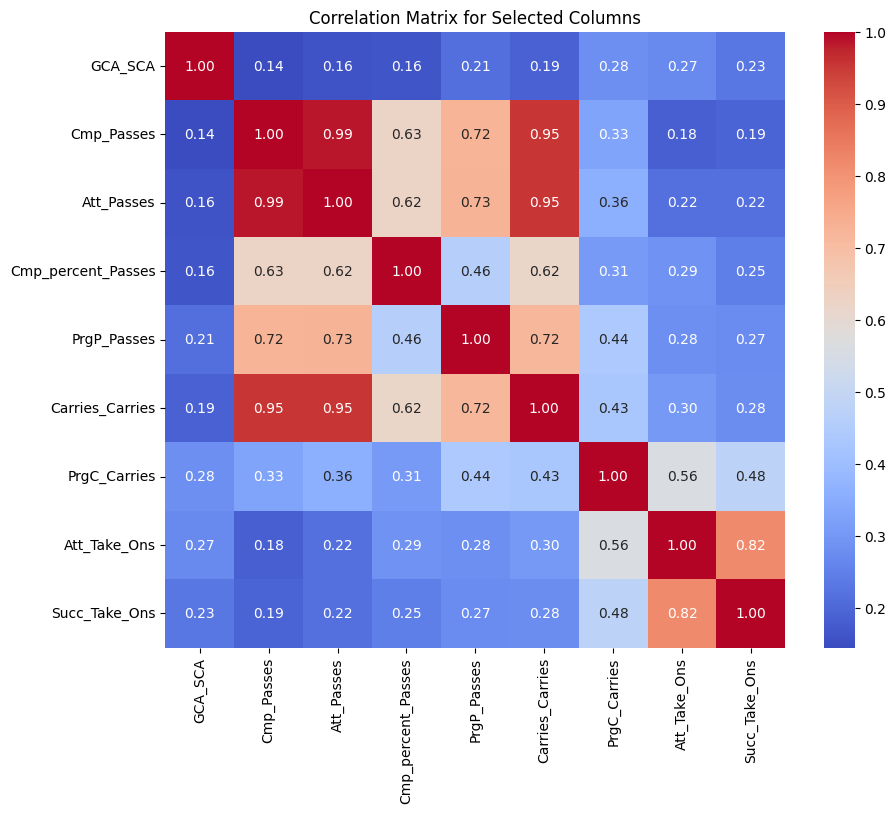

In [7]:
# List of columns of interest (example)
columns_of_interest = ['GCA_SCA', 'Cmp_Passes', 'Att_Passes', 'Cmp_percent_Passes',
       'PrgP_Passes', 'Carries_Carries', 'PrgC_Carries', 'Att_Take_Ons',
       'Succ_Take_Ons']  # Modify as necessary

# Calculate the correlation matrix for selected columns
corr_matrix = alls_filtered[columns_of_interest].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Selected Columns')
plt.show()


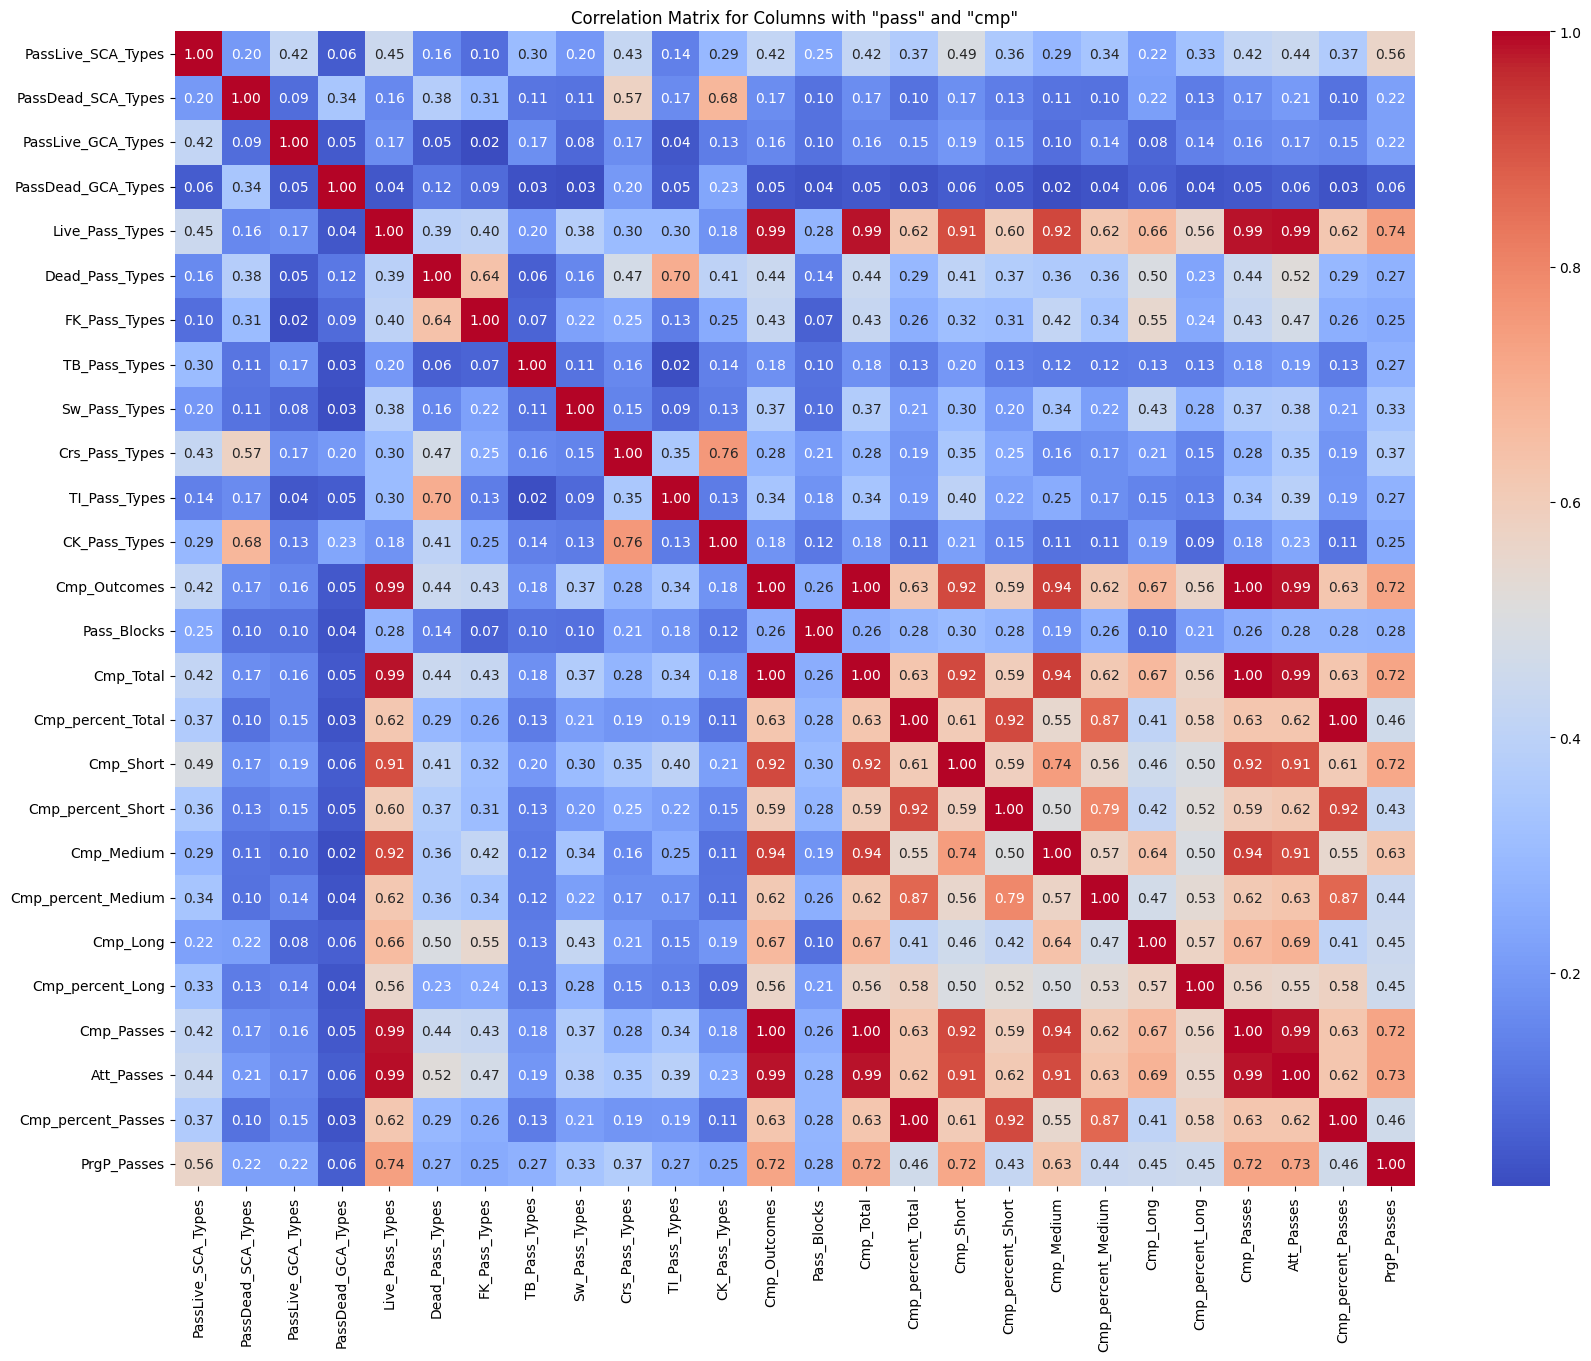

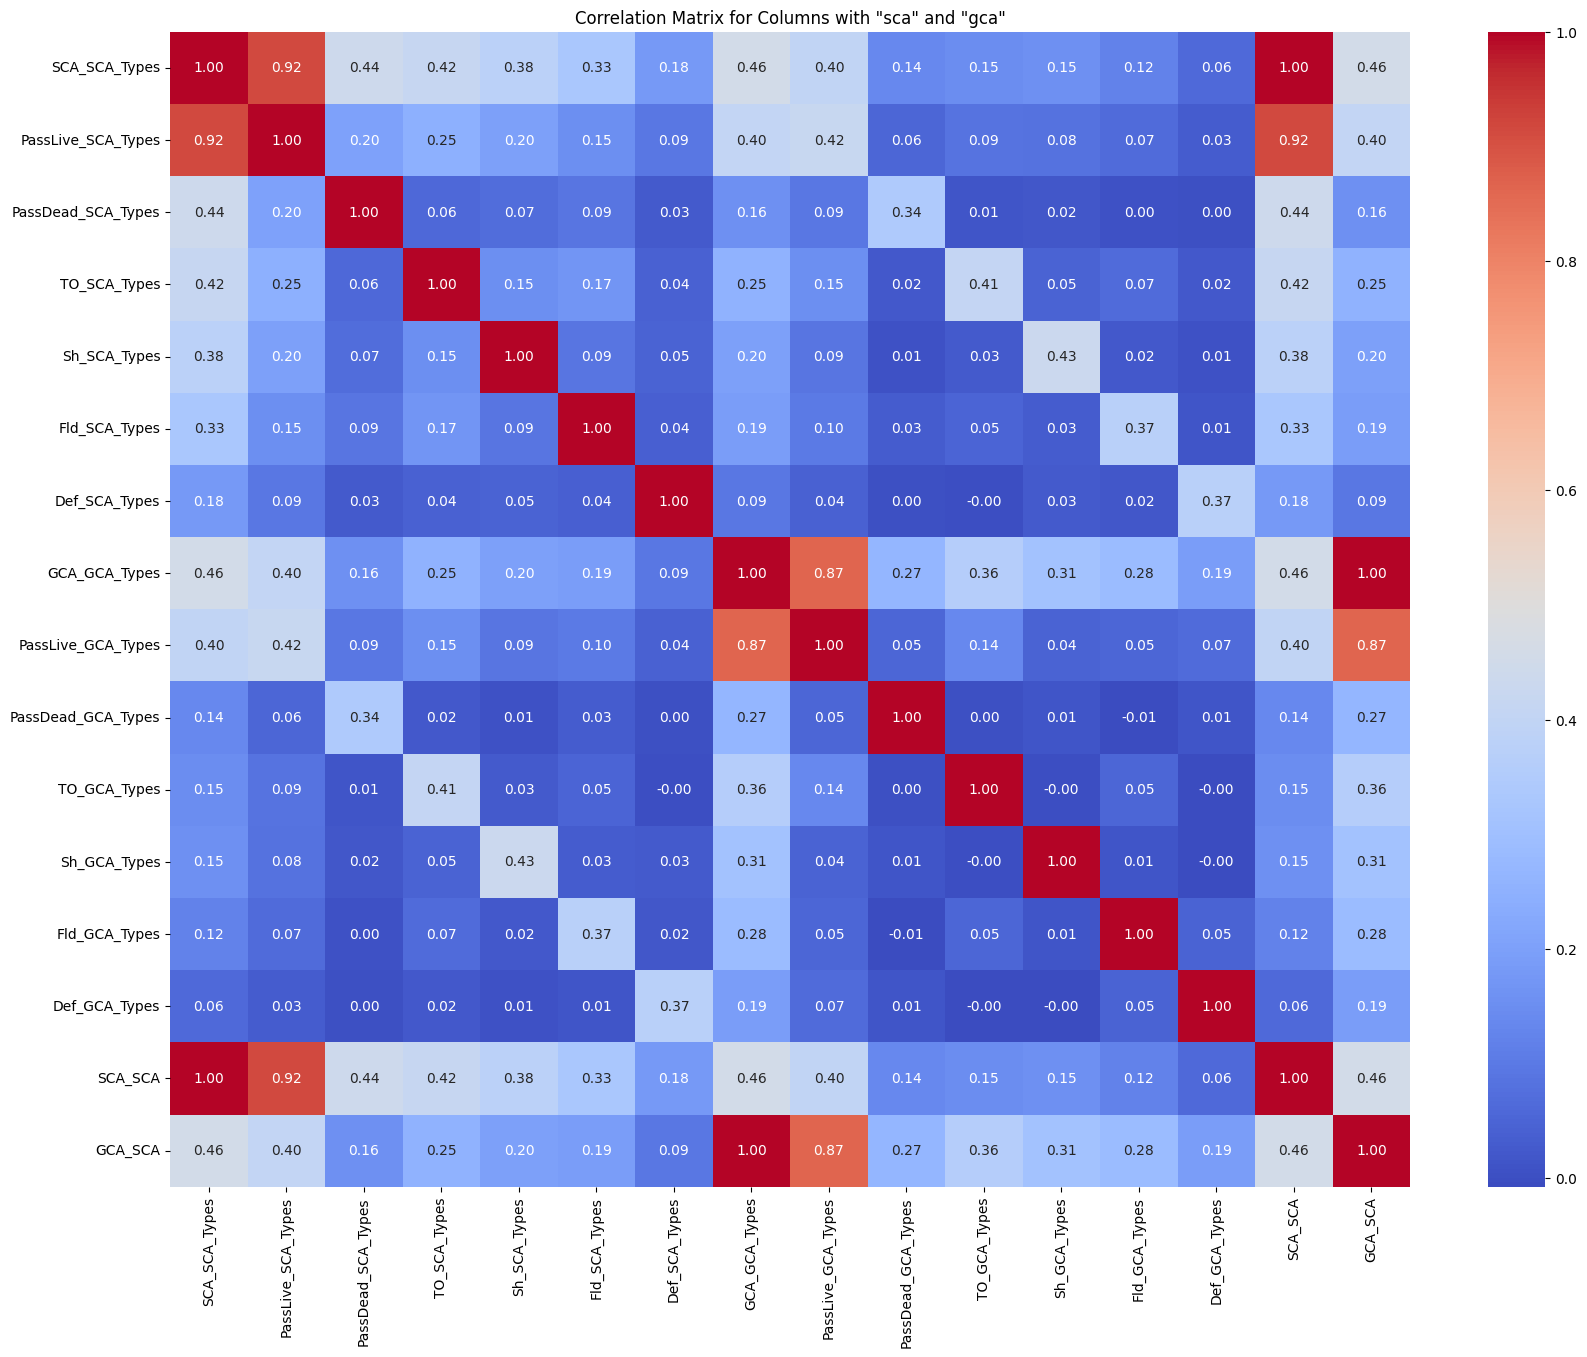

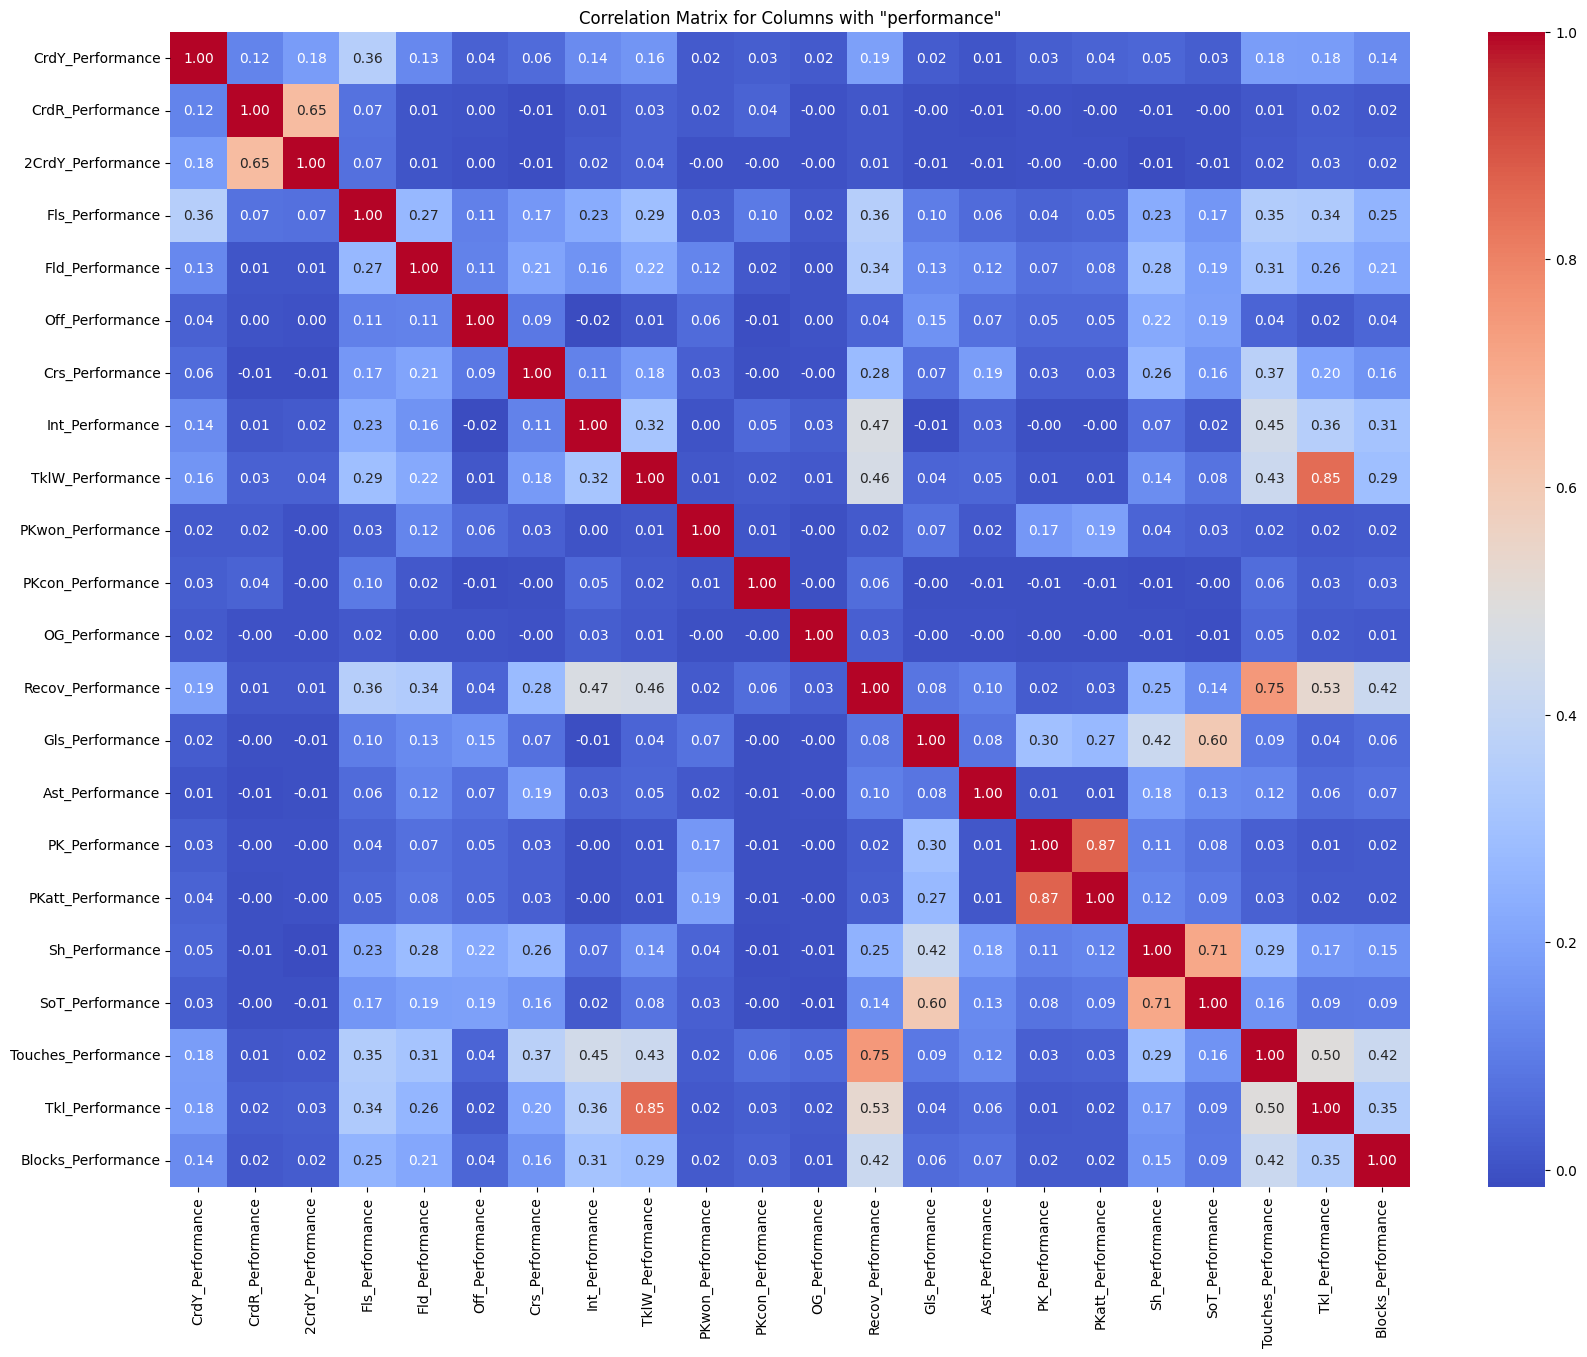

In [8]:


def plot_correlation(dataframe, keywords, title, figsize=(20, 15)):
    # Filter columns that contain any part of the keywords
    filtered_columns = [col for col in dataframe.columns if any(keyword in col.lower() for keyword in keywords)]

    # Check if there are columns to process
    if not filtered_columns:
        print(f"No columns found containing the keywords {keywords}")
        return  # Exit the function if no columns found

    # Calculate the correlation matrix for these filtered columns
    corr_matrix = dataframe[filtered_columns].corr()

    # Check if the correlation matrix is empty
    if corr_matrix.empty:
        print(f"Correlation matrix is empty for columns containing keywords {keywords}")
        return

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Generate a heatmap with annotations
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

    # Add titles and labels
    plt.title(title)
    plt.show()

# Adjusted function calls with annotations
# 1. Columns with 'pass' and 'cmp'
plot_correlation(alls_filtered, ['pass', 'cmp'], 'Correlation Matrix for Columns with "pass" and "cmp"')

# 2. Columns with 'sca' and 'gca'
plot_correlation(alls_filtered, ['sca', 'gca'], 'Correlation Matrix for Columns with "sca" and "gca"')

# 3. Columns with 'performance'
plot_correlation(alls_filtered, ['performance'], 'Correlation Matrix for Columns with "performance"')


In [9]:
df = alls_filtered.sort_values(by=['Date', 'Squad'], ascending=[True, False])

In [10]:
df

Player     Season        Date  Day            Comp  \
0        vicente guaita  2022-2023  2022-08-05  fri  premier league   
11      jeffrey schlupp  2022-2023  2022-08-05  fri  premier league   
12        wilfried zaha  2022-2023  2022-08-05  fri  premier league   
13         eberechi eze  2022-2023  2022-08-05  fri  premier league   
14      odsonne édouard  2022-2023  2022-08-05  fri  premier league   
...                 ...        ...         ...  ...             ...   
13374     thomas partey  2022-2023  2023-05-28  sun  premier league   
13380  leandro trossard  2022-2023  2023-05-28  sun  premier league   
13429      granit xhaka  2022-2023  2023-05-28  sun  premier league   
13456   martin ødegaard  2022-2023  2023-05-28  sun  premier league   
13467     gabriel jesus  2022-2023  2023-05-28  sun  premier league   

              Round Venue Result           Squad Opponent Start Pos   Min  \
0       matchweek 1  home  l 0–2  crystal palace  arsenal     y  gk  90.0   
11      matchweek 1  home  l 0–2  crystal palace  arsenal     y  dm  85.0   
12      matchweek 1  home  l 0–2  crystal palace  arsenal     y  lw  90.0   
13      matchweek 1  home  l 0–2  crystal palace  arsenal     y  am  85.0   
14      matchweek 1  home  l 0–2  crystal palace  arsenal     y  fw  57.0   
...             ...   ...    ...             ...      ...   ...  ..   ...   
13374  matchweek 38  home  w 5–0         arsenal   wolves     y  rb  90.0   
13380  matchweek 38  home  w 5–0         arsenal   wolves     y  lw  79.0   
13429  matchweek 38  home  w 5–0         arsenal   wolves     y  lm  74.0   
13456  matchweek 38  home  w 5–0         arsenal   wolves    y*  rm  74.0   
13467  matchweek 38  home  w 5–0         arsenal   wolves     y  fw  90.0   

       SCA_SCA_Types  PassLive_SCA_Types  PassDead_SCA_Types  TO_SCA_Types  \
0                0.0                 0.0                 0.0           0.0   
11               1.0                 0.0                 0.0           0.0   
12               3.0                 2.0                 0.0           1.0   
13               1.0                 0.0                 1.0           0.0   
14               1.0                 0.0                 0.0           0.0   
...              ...                 ...                 ...           ...   
13374            1.0                 1.0                 0.0           0.0   
13380            3.0                 2.0                 0.0           0.0   
13429            0.0                 0.0                 0.0           0.0   
13456            5.0                 4.0                 0.0           1.0   
13467            2.0                 2.0                 0.0           0.0   

       Sh_SCA_Types  Fld_SCA_Types  Def_SCA_Types  GCA_GCA_Types  \
0               0.0            0.0            0.0            0.0   
11              1.0            0.0            0.0            0.0   
12              0.0            0.0            0.0            0.0   
13              0.0            0.0            0.0            0.0   
14              1.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
13374           0.0            0.0            0.0            1.0   
13380           0.0            1.0            0.0            2.0   
13429           0.0            0.0            0.0            0.0   
13456           0.0            0.0            0.0            1.0   
13467           0.0            0.0            0.0            1.0   

       PassLive_GCA_Types  PassDead_GCA_Types  TO_GCA_Types  Sh_GCA_Types  \
0                     0.0                 0.0           0.0           0.0   
11                    0.0                 0.0           0.0           0.0   
12                    0.0                 0.0           0.0           0.0   
13                    0.0                 0.0           0.0           0.0   
14                    0.0                 0.0           0.0           0.0   
...                   .

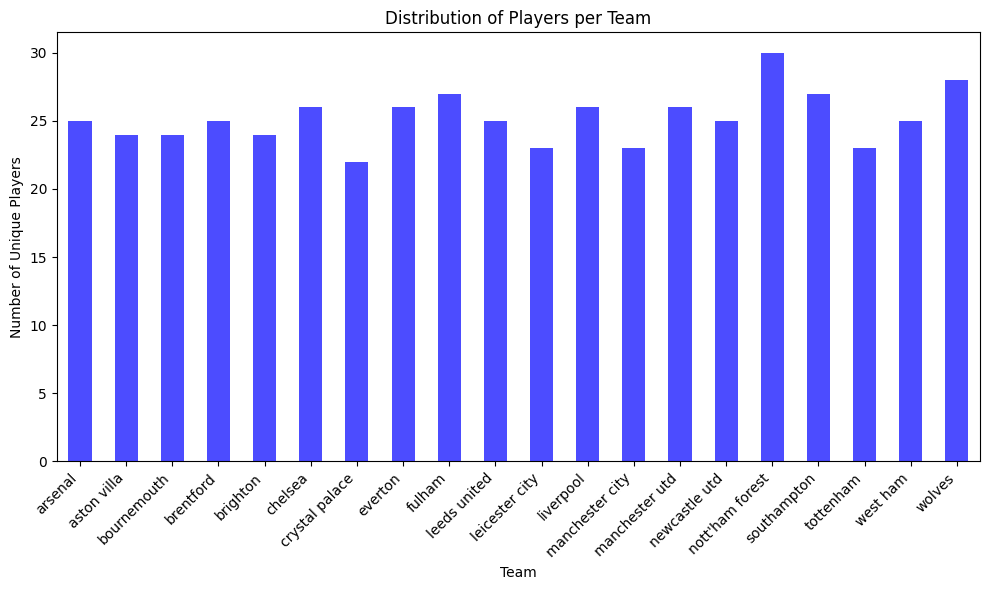

In [11]:
# Calculate number of unique players in each squad
unique_players = df.groupby('Squad')['Player'].nunique()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for distribution of players per team
unique_players.plot(kind='bar', ax=ax, color='b', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labeling and title
ax.set_xlabel('Team')
ax.set_ylabel('Number of Unique Players')
plt.title('Distribution of Players per Team')

# Show plot
plt.tight_layout()
plt.show()


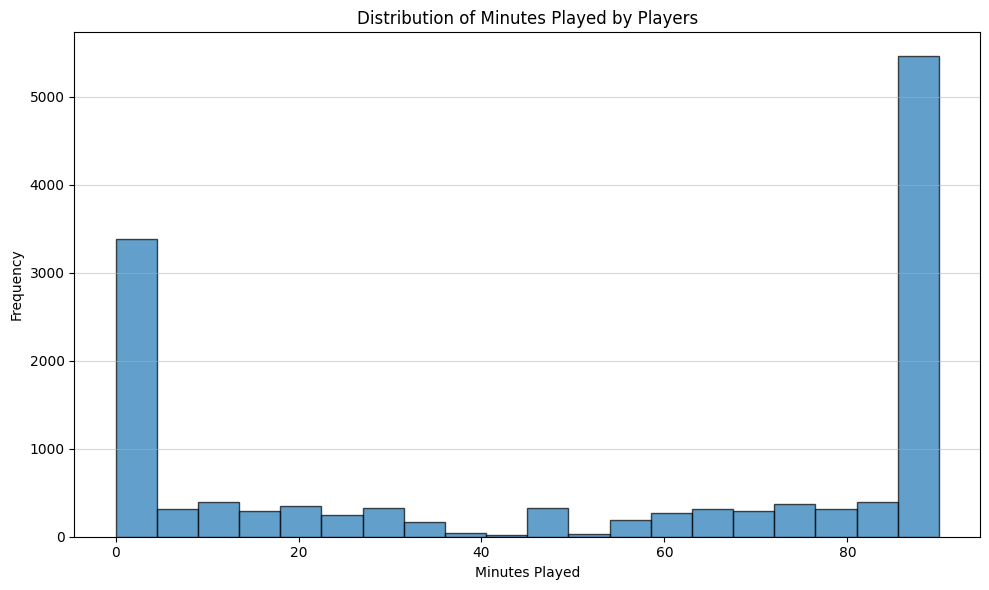

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Min'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Minutes Played by Players')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


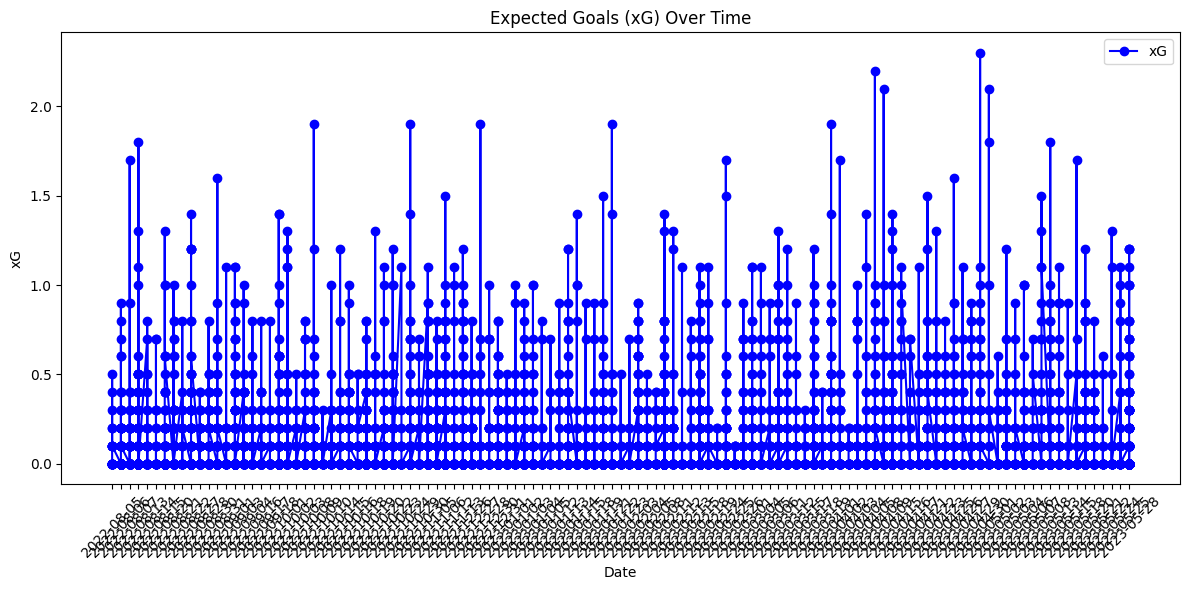

In [13]:
# Example: Plotting xG (Expected Goals) over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['xG_Expected'], marker='o', linestyle='-', color='b', label='xG')
plt.title('Expected Goals (xG) Over Time')
plt.xlabel('Date')
plt.ylabel('xG')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


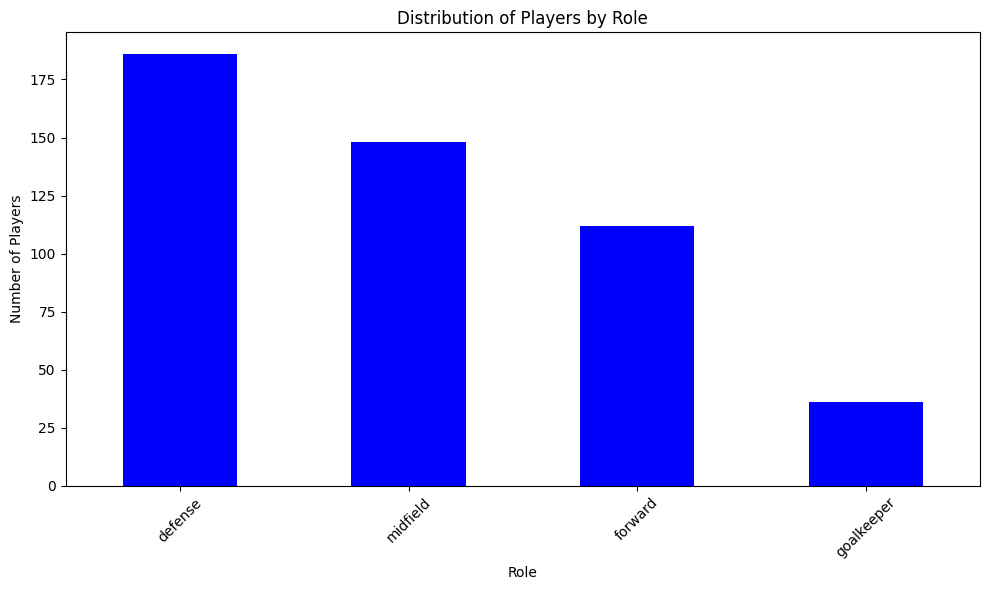

In [14]:
# Drop duplicate players
unique_players = df.drop_duplicates(subset='Player')

# Count the frequency of each role
role_counts = unique_players['Role'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
role_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Players by Role')
plt.xlabel('Role')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

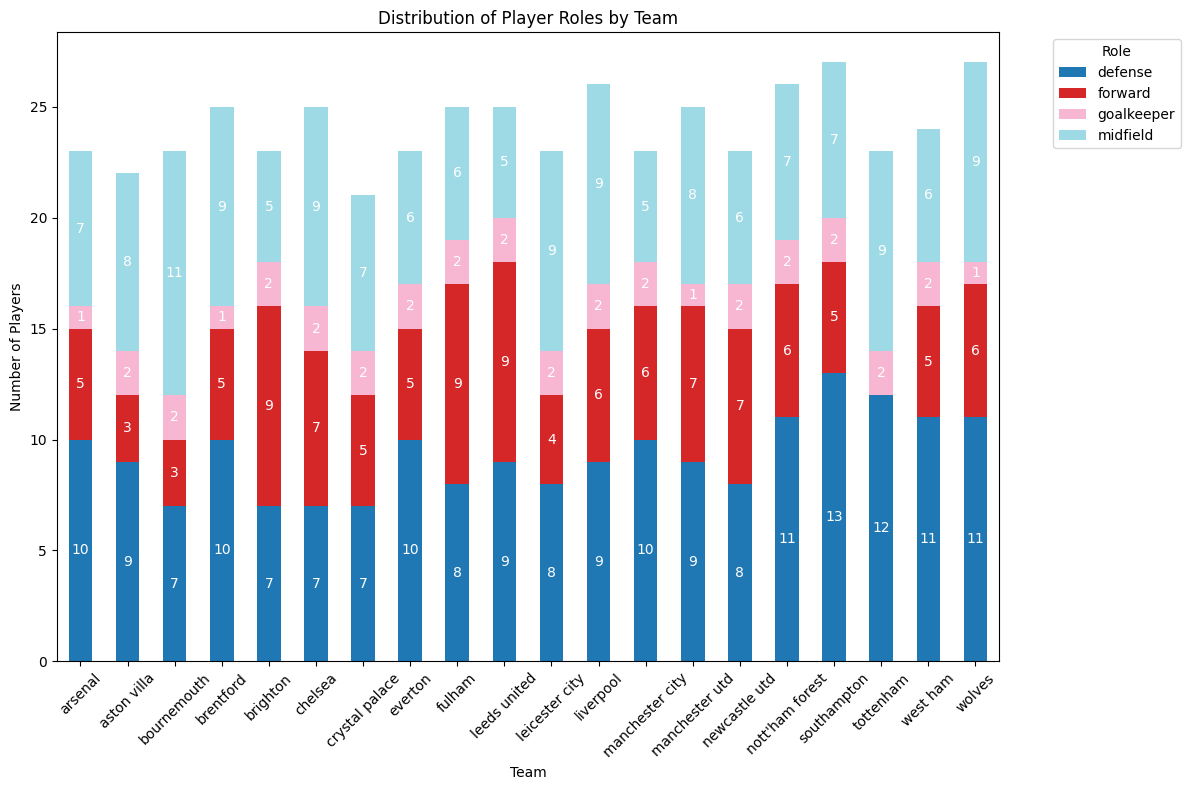

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure unique players across squads
unique_players = df.drop_duplicates(['Player'])

# Grouping by Squad and Role, then counting occurrences of unique players
role_counts_by_team = unique_players.groupby(['Squad', 'Role']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
ax = role_counts_by_team.plot(kind='bar', stacked=True, cmap='tab20', ax=plt.gca())
plt.title('Distribution of Player Roles by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.legend(title='Role', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each stack with the count
for team_idx, team in enumerate(role_counts_by_team.index):
    for role_idx, role in enumerate(role_counts_by_team.columns):
        count = role_counts_by_team.loc[team, role]
        if count > 0:
            ax.annotate(f'{int(count)}', (team_idx, role_counts_by_team.iloc[:, :role_idx].sum(axis=1).loc[team] + count/2),
                        ha='center', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()


In [16]:
features = [
    'SCA_SCA_Types', 'PassLive_SCA_Types', 'PassDead_SCA_Types', 'Sh_SCA_Types',
    'GCA_GCA_Types', 'PassLive_GCA_Types', 'PassDead_GCA_Types', 'Sh_GCA_Types',
    'Live_Pass_Types', 'Dead_Pass_Types', 'Crs_Pass_Types',
    'Won_Aerial_Duels', 'Lost_Aerial_Duels', 'Won_percent_Aerial_Duels',
    'Tkl_Tackles', 'TklW_Tackles', 'Def 3rd_Tackles', 'Mid 3rd_Tackles', 'Att 3rd_Tackles',
    'Blocks_Blocks', 'Sh_Blocks', 'Pass_Blocks',
    'Int', 'Tkl+Int', 'Clr', 'Cmp_Total', 'Att_Total', 'Cmp_percent_Total',
    'Touches_Performance', 'Tkl_Performance', 'Blocks_Performance',
    'TotDist_Total', 'PrgDist_Total', 'Cmp_Short', 'Att_Short', 'Cmp_percent_Short',
    'Cmp_Medium', 'Att_Medium', 'Cmp_percent_Medium', 'Cmp_Long', 'Att_Long', 'Cmp_percent_Long',
    'Ast', 'xAG', 'xA', 'KP', 'Final_Third', 'PPA', 'CrsPA', 'PrgP'
]

# Subsetting the DataFrame
df_selected = df[features]

In [17]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Applying PCA
pca = PCA(n_components=2)  # Reduce dimensions for visualization
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


#**Exploring the playing styles**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


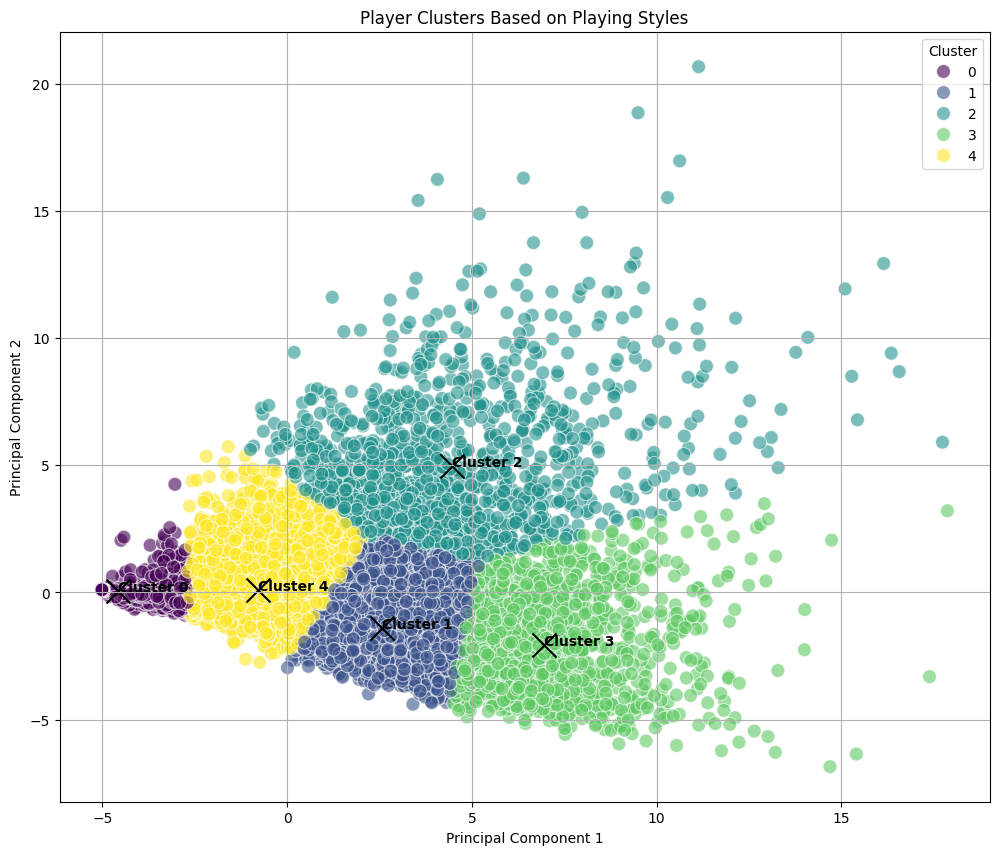

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Clustering using K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Assume 5 distinct playing styles
principal_df['Cluster'] = kmeans.fit_predict(principal_components)

# Assuming principal_components and kmeans have been defined as shown previously
cluster_centers = kmeans.cluster_centers_

# Plotting the clusters with centroid annotations
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='viridis', s=100, alpha=0.6)

# Annotate the cluster centers
for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], s=300, c='black', marker='x')  # Mark the centroid with a black 'x'
    plt.text(center[0], center[1], f'Cluster {i}', horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Player Clusters Based on Playing Styles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [19]:

feature_contributions = pd.DataFrame(pca.components_, columns=df_selected.columns, index=['PC1', 'PC2'])

# Display the contributions of each feature to the first two principal components
print(feature_contributions.transpose().sort_values(by='PC1', ascending=False))  # Sorting by PC1 contributions


                               PC1       PC2
Touches_Performance       0.232759 -0.056194
Att_Total                 0.227406 -0.066741
Live_Pass_Types           0.224586 -0.071330
Cmp_Total                 0.221908 -0.080076
TotDist_Total             0.214247 -0.109099
Att_Short                 0.212274 -0.004718
Cmp_Short                 0.209790 -0.013229
Att_Medium                0.206767 -0.117051
Cmp_Medium                0.198865 -0.132113
PrgP                      0.183183  0.061928
PrgDist_Total             0.178116 -0.135420
Final_Third               0.176756 -0.032368
Cmp_percent_Total         0.170953 -0.029981
Cmp_percent_Medium        0.168132 -0.044660
Cmp_percent_Short         0.167534 -0.023208
Tkl+Int                   0.157835 -0.060453
Cmp_Long                  0.157451 -0.086378
Cmp_percent_Long          0.149293 -0.020781
Att_Long                  0.143115 -0.084818
Tkl_Tackles               0.143085 -0.034692
Tkl_Performance           0.143085 -0.034692
SCA_SCA_Ty

In [20]:
# # Include the player names in the principal component DataFrame
# principal_df['Player'] = df['Player']  #

# # Clustering using K-Means
# kmeans = KMeans(n_clusters=5, random_state=42)
# principal_df['Cluster'] = kmeans.fit_predict(principal_components)

# # Plotting the clusters
# plt.figure(figsize=(14, 12))
# scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='viridis', s=100, alpha=0.6)

# # Annotate each data point with the player's name
# for i in range(principal_df.shape[0]):
#     plt.text(principal_df.iloc[i]['PC1'], principal_df.iloc[i]['PC2'], principal_df.iloc[i]['Player'], horizontalalignment='left', size='small', color='black', weight='semibold')

# plt.title('Player Clusters Based on Playing Styles')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.grid(True)
# plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


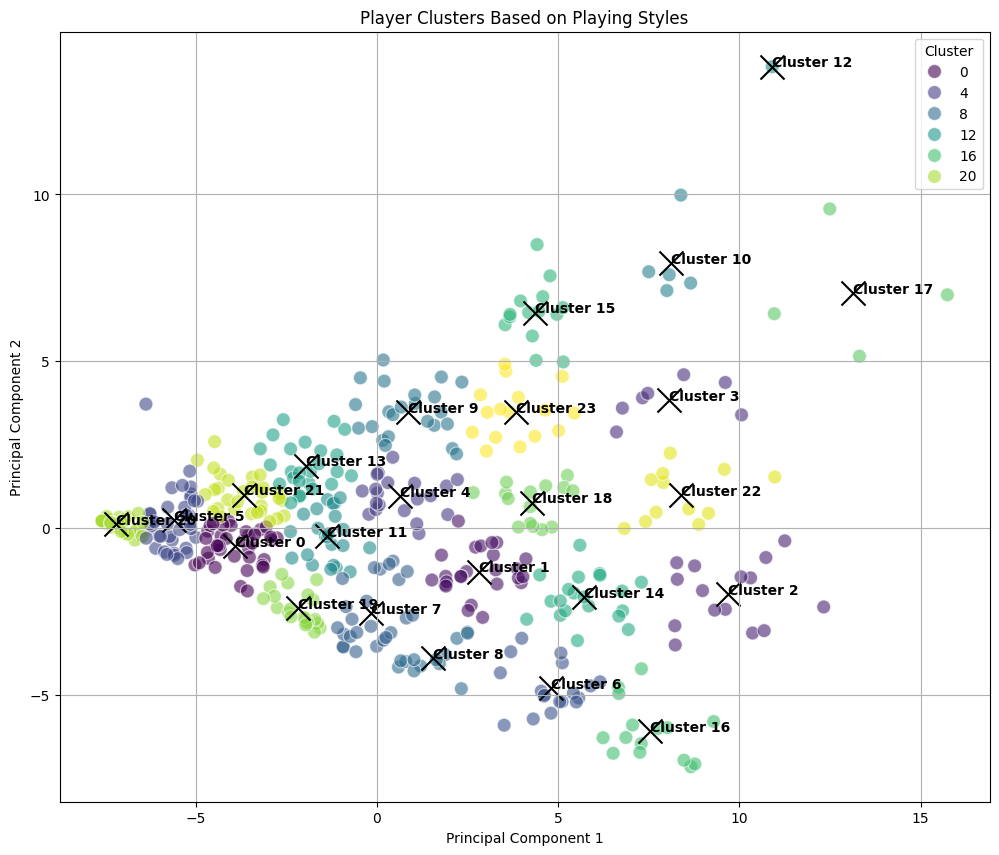

In [21]:

dff = df.copy()
dff.drop(['Date', 'Season', 'Day','Comp',	'Round',	'Venue',	'Result',	'Squad',	'Opponent',	'Start',	'Pos', 'Role'	], axis = 1, inplace=True)
dff= dff.groupby('Player', as_index=False).mean()
df_selected2 = dff[features]



# Standardizing the data
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df_selected2)

# Applying PCA
pca = PCA(n_components=2)  # Reduce dimensions for visualization
principal_components2 = pca.fit_transform(df_scaled2)
principal_df2 = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2'])


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Clustering using K-Means
kmeans = KMeans(n_clusters=24, random_state=42)  # Assume 5 distinct playing styles
principal_df2['Cluster'] = kmeans.fit_predict(principal_components2)

# Assuming principal_components and kmeans have been defined as shown previously
cluster_centers2 = kmeans.cluster_centers_

# Plotting the clusters with centroid annotations
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df2, palette='viridis', s=100, alpha=0.6)

# Annotate the cluster centers
for i, center in enumerate(cluster_centers2):
    plt.scatter(center[0], center[1], s=300, c='black', marker='x')  # Mark the centroid with a black 'x'
    plt.text(center[0], center[1], f'Cluster {i}', horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Player Clusters Based on Playing Styles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


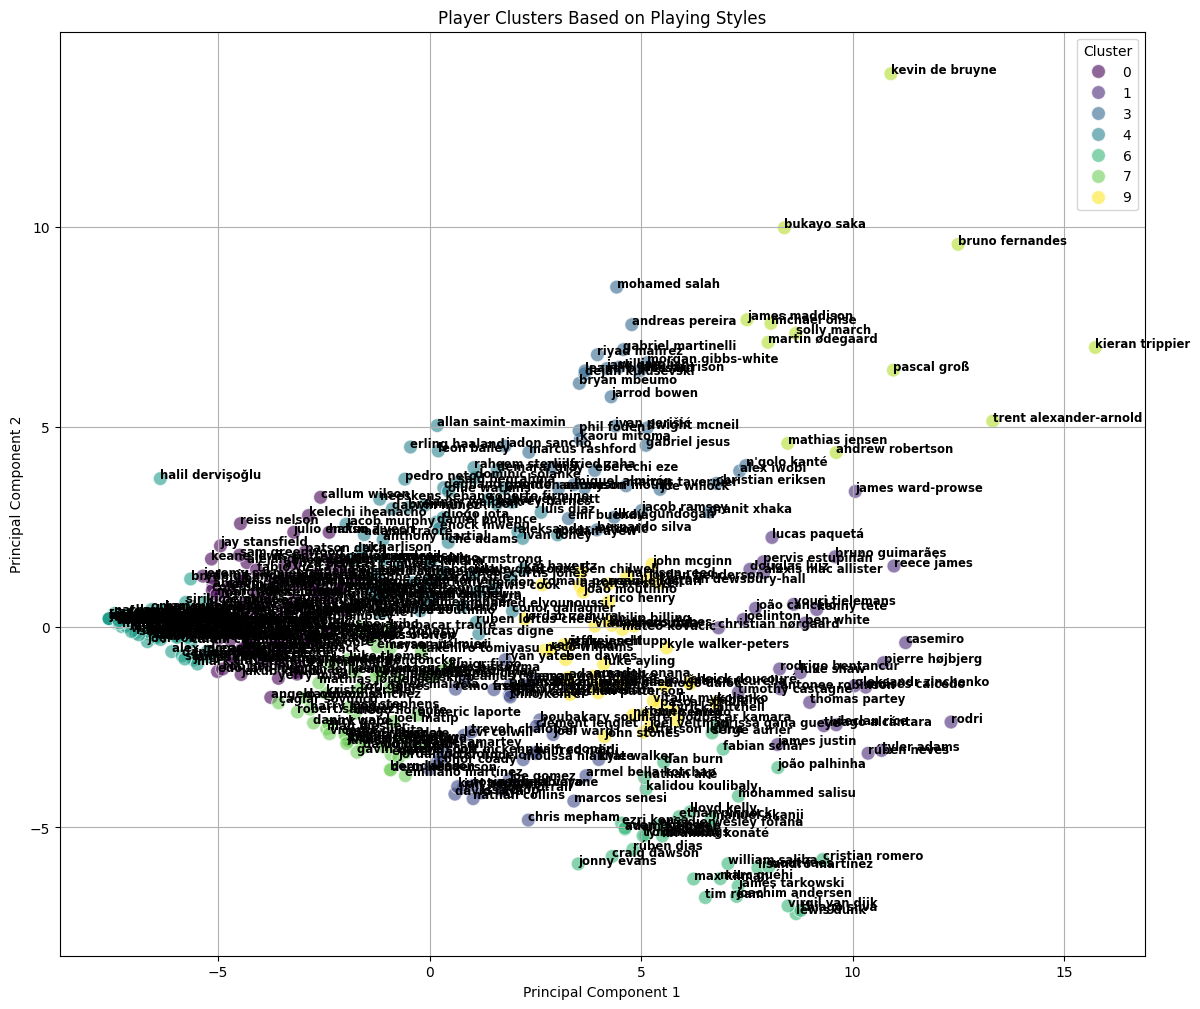

In [22]:
# Include the player names in the principal component DataFrame
principal_df2['Player'] = dff['Player']  #

# Clustering using K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
principal_df2['Cluster'] = kmeans.fit_predict(principal_components2)

# Plotting the clusters
plt.figure(figsize=(14, 12))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df2, palette='viridis', s=100, alpha=0.6)

# Annotate each data point with the player's name
for i in range(principal_df2.shape[0]):
    plt.text(principal_df2.iloc[i]['PC1'], principal_df2.iloc[i]['PC2'], principal_df2.iloc[i]['Player'], horizontalalignment='left', size='small', color='black', weight='semibold')

plt.title('Player Clusters Based on Playing Styles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [23]:

feature_contributions2 = pd.DataFrame(pca.components_, columns=df_selected2.columns, index=['PC1', 'PC2'])

# Display the contributions of each feature to the first two principal components
print(feature_contributions2.transpose().sort_values(by='PC1', ascending=False))  # Sorting by PC1 contributions


                               PC1       PC2
Touches_Performance       0.188101 -0.073083
Att_Short                 0.183709 -0.017900
Att_Total                 0.181794 -0.089462
Live_Pass_Types           0.180887 -0.093521
Cmp_Short                 0.180666 -0.030110
Cmp_Total                 0.176030 -0.106087
PrgP                      0.176013  0.041071
Cmp_percent_Long          0.171294 -0.043510
Final_Third               0.167687 -0.064130
Tkl+Int                   0.166611 -0.064898
Cmp_percent_Total         0.165641 -0.010920
Cmp_percent_Short         0.164773 -0.003888
Cmp_percent_Medium        0.164406 -0.039646
Att_Medium                0.164040 -0.147274
TotDist_Total             0.163909 -0.138311
Tkl_Tackles               0.162713 -0.026882
Tkl_Performance           0.162713 -0.026882
Blocks_Performance        0.161673 -0.043206
Blocks_Blocks             0.161673 -0.043206
TklW_Tackles              0.159032 -0.026462
Cmp_Medium                0.155099 -0.165124
Int       

In [24]:

import plotly.express as px


# # Include the player names in the principal component DataFrame
# principal_df2['Player'] = dff['Player']

# # Clustering using K-Means
# kmeans = KMeans(n_clusters=10, random_state=42)
# principal_df2['Cluster'] = kmeans.fit_predict(principal_components2)

# Plotting the clusters using Plotly
fig = px.scatter(
    principal_df2,
    x='PC1',
    y='PC2',
    color='Cluster',
    title='Player Clusters Based on Playing Styles'
)

# Customize hover information to show player names and cluster numbers
fig.update_traces(marker=dict(size=12, opacity=0.6),
                  hovertemplate='<b>Player:</b> %{text}<br>' +
                                '<b>Cluster:</b> %{customdata[0]}<br>' +
                                '<b>PC1:</b> %{x}<br>' +
                                '<b>PC2:</b> %{y}<br>',
                  text=principal_df2['Player'],
                  customdata=principal_df2[['Cluster']])

# Show the plot
fig.show()

In [25]:
principal_df2

PC1       PC2  Cluster              Player
0    3.553483  1.032469        9     aaron cresswell
1    1.900661 -1.448334        2        aaron hickey
2   -1.956548 -2.728916        7      aaron ramsdale
3    2.473658 -1.305614        2   aaron wan-bissaka
4    0.303240  1.359254        4  abdoulaye doucouré
..        ...       ...      ...                 ...
477 -2.683818  1.318230        0         yoane wissa
478  8.604736  0.572275        1     youri tielemans
479  0.343154 -1.080727        7       yves bissouma
480 -3.571375 -1.887181        7      çağlar söyüncü
481 -1.961914 -2.904136        7    łukasz fabiański

[482 rows x 4 columns]

In [26]:
feature_contributions2.shape

(2, 50)

### Converting dataframe to per90 stats

In [27]:
df['Role'] = df['Role'].astype('object')

features2 = ['Player', 'Season', 'Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad', 'Opponent',
 'Start', 'Pos', 'Min', 'SCA_SCA_Types', 'PassLive_SCA_Types', 'PassDead_SCA_Types', 'TO_SCA_Types',
 'Sh_SCA_Types', 'Fld_SCA_Types', 'Def_SCA_Types', 'GCA_GCA_Types', 'PassLive_GCA_Types',
 'PassDead_GCA_Types', 'TO_GCA_Types', 'Sh_GCA_Types', 'Fld_GCA_Types', 'Def_GCA_Types', 'Att',
 'Live_Pass_Types', 'Dead_Pass_Types', 'FK_Pass_Types', 'TB_Pass_Types', 'Sw_Pass_Types',
 'Crs_Pass_Types', 'TI_Pass_Types', 'CK_Pass_Types', 'In_Corner_Kicks', 'Out_Corner_Kicks',
 'Str_Corner_Kicks', 'Cmp_Outcomes', 'Off_Outcomes', 'Blocks_Outcomes', 'CrdY_Performance',
 'CrdR_Performance', '2CrdY_Performance', 'Fls_Performance', 'Fld_Performance', 'Off_Performance',
 'Crs_Performance', 'Int_Performance', 'TklW_Performance', 'PKwon_Performance', 'PKcon_Performance',
 'OG_Performance', 'Recov_Performance', 'Won_Aerial_Duels', 'Lost_Aerial_Duels',
 'Won_percent_Aerial_Duels', 'Tkl_Tackles', 'TklW_Tackles', 'Def 3rd_Tackles',
 'Mid 3rd_Tackles', 'Att 3rd_Tackles', 'Tkl_Challenges', 'Att_Challenges',
 'Tkl_percent_Challenges', 'Lost_Challenges', 'Blocks_Blocks', 'Sh_Blocks',
 'Pass_Blocks', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Cmp_Total', 'Att_Total', 'Cmp_percent_Total',
 'TotDist_Total', 'PrgDist_Total', 'Cmp_Short', 'Att_Short', 'Cmp_percent_Short', 'Cmp_Medium',
 'Att_Medium', 'Cmp_percent_Medium', 'Cmp_Long', 'Att_Long', 'Cmp_percent_Long',
 'Ast', 'xAG', 'xA', 'KP', 'Final_Third', 'PPA', 'CrsPA', 'PrgP', 'Gls_Performance',
 'Ast_Performance', 'PK_Performance', 'PKatt_Performance', 'Sh_Performance', 'SoT_Performance',
 'Touches_Performance', 'Tkl_Performance', 'Blocks_Performance', 'xG_Expected', 'npxG_Expected',
 'xAG_Expected', 'SCA_SCA', 'GCA_SCA', 'Cmp_Passes', 'Att_Passes', 'Cmp_percent_Passes',
 'PrgP_Passes', 'Carries_Carries', 'PrgC_Carries', 'Att_Take_Ons', 'Succ_Take_Ons', 'Role']

# Columns that should not be converted to per 90
ignore_columns = [
    'Player','Role', 'Season', 'Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad', 'Opponent',
    'Start', 'Pos', 'Min', 'CrdY_Performance', 'CrdR_Performance', '2CrdY_Performance',
    'Won_percent_Aerial_Duels', 'Tkl_percent_Challenges', 'Cmp_percent_Total', 'Cmp_percent_Short',
    'Cmp_percent_Medium', 'Cmp_percent_Long', 'Cmp_percent_Passes'
]

# Assume df is your DataFrame with all the data
df = df.copy()

# List of features to convert to per 90, excluding those not to be converted and already numeric
features_to_convert = [feature for feature in features2 if feature not in ignore_columns and df[feature].dtype == 'object']

# Convert features to numeric, coercing errors for any non-convertible values which will become NaN
for feature in features_to_convert:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

# Now proceed with the original per 90 calculation
for feature in features2:
    if feature not in ignore_columns:
        per_90_feature = f"{feature}_per_90"
        df[per_90_feature] = np.where(df['Min'] > 0, df[feature] / df['Min'] * 90, 0)

# Select columns that were converted to per 90 and the columns to ignore
columns_per_90 = [f"{feature}_per_90" for feature in features2 if feature not in ignore_columns]
df_per_90 = df[columns_per_90]

# Include the ignored columns
df_final = pd.concat([df[ignore_columns], df_per_90], axis=1)



In [28]:
df_final.head(2)

Player        Role     Season        Date  Day            Comp  \
0    vicente guaita  goalkeeper  2022-2023  2022-08-05  fri  premier league   
11  jeffrey schlupp    midfield  2022-2023  2022-08-05  fri  premier league   

          Round Venue Result           Squad Opponent Start Pos   Min  \
0   matchweek 1  home  l 0–2  crystal palace  arsenal     y  gk  90.0   
11  matchweek 1  home  l 0–2  crystal palace  arsenal     y  dm  85.0   

    CrdY_Performance  CrdR_Performance  2CrdY_Performance  \
0                0.0               0.0                0.0   
11               0.0               0.0                0.0   

    Won_percent_Aerial_Duels  Tkl_percent_Challenges  Cmp_percent_Total  \
0                        0.0                     0.0               94.9   
11                      33.3                     0.0               85.7   

    Cmp_percent_Short  Cmp_percent_Medium  Cmp_percent_Long  \
0               100.0               100.0              84.6   
11               88.9               100.0              25.0   

    Cmp_percent_Passes  SCA_SCA_Types_per_90  PassLive_SCA_Types_per_90  \
0                 94.9              0.000000                        0.0   
11                85.7              1.058824                        0.0   

    PassDead_SCA_Types_per_90  TO_SCA_Types_per_90  Sh_SCA_Types_per_90  \
0                         0.0                  0.0             0.000000   
11                        0.0                  0.0             1.058824   

    Fld_SCA_Types_per_90  Def_SCA_Types_per_90  GCA_GCA_Types_per_90  \
0                    0.0                   0.0                   0.0   
11                   0.0                   0.0                   0.0   

    PassLive_GCA_Types_per_90  PassDead_GCA_Types_per_90  TO_GCA_Types_per_90  \
0                         0.0                        0.0                  0.0   
11                        0.0                        0.0                  0.0   

    Sh_GCA_Types_per_90  Fld_GCA_Types_per_90  Def_GCA_Types_per_90  \
0                   0.0                   0.0                   0.0   
11                  0.0                   0.0                   0.0   

    Att_per_90  Live_Pass_Types_per_90  Dead_Pass_Types_per_90  \
0    39.000000               31.000000                     8.0   
11   37.058824               37.058824                     0.0   

    FK_Pass_Types_per_90  TB_Pass_Types_per_90  Sw_Pass_Types_per_90  \
0                    4.0              0.000000                   1.0   
11                   0.0              1.058824                   0.0   

    Crs_Pass_Types_per_90  TI_Pass_Types_per_90  CK_Pass_Types_per_90  \
0                     0.0                   0.0                   0.0   
11                    0.0                   0.0                   0.0   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
0                      0.0                      0.0                      0.0   
11                     0.0                      0.0                      0.0   

    Cmp_Outcomes_per_90  Off_Outcomes_per_90  Blocks_Outcomes_per_90  \
0             37.000000                  0.0                     0.0   
11            31.764706                  0.0                     0.0   

    Fls_Performance_per_90  Fld_Performance_per_90  Off_Performance_per_90  \
0                 0.000000                     0.0                     0.0   
11                2.117647                     0.0                     0.0   

    Crs_Performance_per_90  Int_Performance_per_90  TklW_Performance_per_90  \
0                      0.0                0.000000                 0.000000   
11                     0.0                1.058824                 2.117647   

    PKwon_Performance_per_90  PKcon_Performance_per_90  OG_Performance_per_90  \
0                        0.0                       0.0                    0.0   
11                       0.0                       0.0                    0.0   

    Recov_Perform

# **Dividing dataframe to defensive, attacking , possession style of play**

In [29]:
df_final['Date'] = pd.to_datetime(df_final['Date'])

# Constant columns
constant_columns = [
    'Player', 'Role', 'Season', 'Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad', 'Opponent', 'Start', 'Pos', 'Min'
]

# Columns for different styles of play
attacking_columns = [
    'PrgP_Passes_per_90', 'Carries_Carries_per_90', 'PrgC_Carries_per_90', 'Att_Take_Ons_per_90', 'Succ_Take_Ons_per_90',
    'xG_Expected_per_90', 'npxG_Expected_per_90', 'xAG_Expected_per_90', 'SCA_SCA_per_90', 'GCA_SCA_per_90',
    'Crs_Performance_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
    'Cmp_Long_per_90', 'Att_Long_per_90', 'Cmp_percent_Long', 'PKwon_Performance_per_90', 'Touches_Performance_per_90',
    'Ast_per_90', 'xAG_per_90', 'xA_per_90', 'KP_per_90', 'Final_Third_per_90', 'TB_Pass_Types_per_90', 'Sw_Pass_Types_per_90', 'Crs_Pass_Types_per_90'
]

defensive_columns = [
    'Recov_Performance_per_90', 'Won_Aerial_Duels_per_90', 'Won_percent_Aerial_Duels', 'Lost_Aerial_Duels_per_90',
    'Tkl_Tackles_per_90', 'TklW_Tackles_per_90', 'Def 3rd_Tackles_per_90', 'Mid 3rd_Tackles_per_90', 'Att 3rd_Tackles_per_90',
    'Tkl_Challenges_per_90', 'Tkl_percent_Challenges', 'Att_Challenges_per_90', 'Lost_Challenges_per_90', 'Blocks_Blocks_per_90',
    'Sh_Blocks_per_90', 'Pass_Blocks_per_90', 'Int_per_90', 'Tkl+Int_per_90', 'Clr_per_90', 'Err_per_90', 'PKcon_Performance_per_90'
]

possession_columns = [
    'Cmp_Total_per_90', 'Att_Total_per_90', 'TotDist_Total_per_90', 'PrgDist_Total_per_90', 'Cmp_Short_per_90',
    'Att_Short_per_90', 'Cmp_Medium_per_90', 'Att_Medium_per_90', 'Cmp_Long_per_90', 'Att_Long_per_90', 'Ast_per_90',
    'xAG_per_90', 'xA_per_90', 'KP_per_90', 'Final_Third_per_90', 'PPA_per_90', 'CrsPA_per_90', 'PrgP_per_90',
    'Cmp_percent_Total', 'Cmp_percent_Short', 'Cmp_percent_Medium', 'Cmp_percent_Long', 'Cmp_percent_Passes',
    'Touches_Performance_per_90', 'PrgP_Passes_per_90', 'Carries_Carries_per_90', 'PrgC_Carries_per_90', 'Att_Take_Ons_per_90', 'Succ_Take_Ons_per_90'
]


# Create DataFrames for each style
df_attacking = df_final[constant_columns + attacking_columns]
df_defensive = df_final[constant_columns + defensive_columns]
df_possession = df_final[constant_columns + possession_columns]


# PRINCIPAL COMPONENT ANALYSIS

---



## 1. ATTACKING VARIABLES

In [30]:
# Grouping and aggregating the attacking DataFrame

df_attacking_match_agg = df_attacking.groupby(['Squad', 'Date']).agg({
    col: 'mean' if 'percent' in col else 'sum' for col in attacking_columns
}).reset_index()

# Calculating season averages
df_attacking_season_avg = df_attacking_match_agg.groupby('Squad').mean().reset_index()

# Removing the 'Date' column after initial aggregation
df_attacking_season_avg.drop(columns='Date', inplace=True)

print(df_attacking_season_avg.shape)
df_attacking_season_avg

(20, 28)


Squad  PrgP_Passes_per_90  Carries_Carries_per_90  \
0           arsenal           67.872518              532.660587   
1       aston villa           45.087721              418.292160   
2       bournemouth           34.318747              341.457087   
3         brentford           47.473443              417.634055   
4          brighton           65.898254              573.864284   
5           chelsea           51.889553              517.969135   
6    crystal palace           43.501921              406.903401   
7           everton           36.449063              363.664491   
8            fulham           54.674327              483.537682   
9      leeds united           48.181694              378.614518   
10   leicester city           40.952903              395.770397   
11        liverpool           78.968118              631.864338   
12  manchester city           70.806451              684.731655   
13   manchester utd           63.056610              512.844259   
14    newcastle utd           62.957317              461.618776   
15  nott'ham forest           31.628010              301.451302   
16      southampton           36.588294              408.775174   
17        tottenham           49.349361              458.705610   
18         west ham           47.938123              360.083076   
19           wolves           43.306927              408.935618   

    PrgC_Carries_per_90  Att_Take_Ons_per_90  Succ_Take_Ons_per_90  \
0             32.662647            32.166210             14.953457   
1             24.257980            23.561935             10.050065   
2             16.430600            27.609253             11.081454   
3             25.630577            29.084776             14.222435   
4             35.886805            30.900345             13.320156   
5             28.889545            26.921146             13.110365   
6             19.801283            30.646979             12.759095   
7             17.142281            25.152117             12.542553   
8             26.007712            29.688956             12.299979   
9             21.967001            28.639255             10.019954   
10            18.110036            22.748979              9.316138   
11            29.988326            30.842010             13.237855   
12            35.330216            30.234882             13.745800   
13            27.643928            28.322503             12.163927   
14            33.032235            34.983411             16.340704   
15            16.417741            21.722922              7.971442   
16            22.621298            30.084706             12.523692   
17            24.477313            24.724588             12.936603   
18            23.175005            22.563630              9.500817   
19            22.684228            33.000280             15.732035   

    xG_Expected_per_90  npxG_Expected_per_90  xAG_Expected_per_90  \
0             2.472188              2.384634             1.972532   
1             1.716066              1.628822             1.386234   
2             1.187500              1.187500             0.848220   
3             2.117298              1.943906             1.959986   
4             2.716802              2.590487             1.737882   
5             1.606999              1.543605             1.341427   
6             2.029646              1.961225             1.151175   
7             1.606159              1.542522             0.951619   
8             1.629176              1.439992             1.164691   
9             1.956015              1.868936             1.332578   
10            1.693872              1.541854             1.530041   
11            3.976418              3.893063             2.098276   
12            2.741354              2.387355             2.193858   
13            2.801269              2.698715             2.033872   
14            2.945672              2.851693             1.688891   
15            1.626511         

### ATTACKING VARIABLES PCA

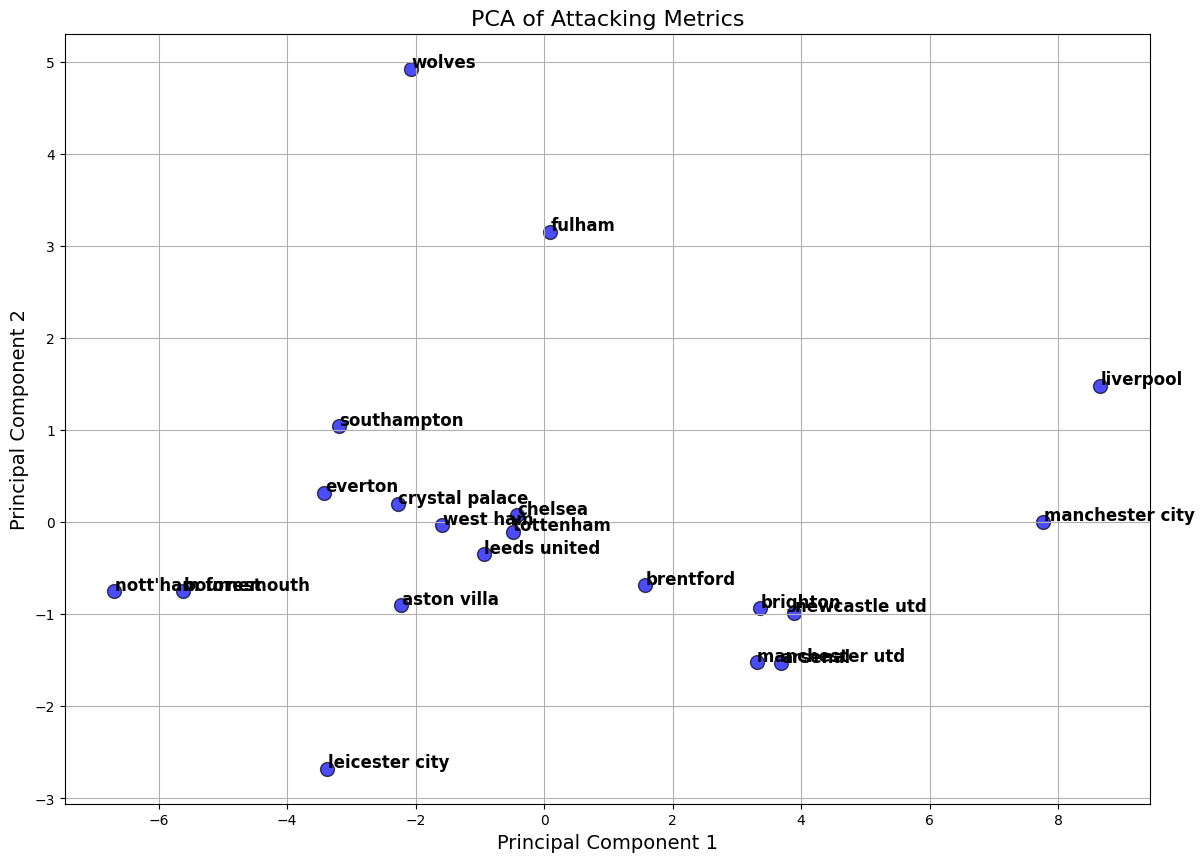

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Selecting only the relevant metrics for PCA
attacking_metrics = [
    'PrgP_Passes_per_90', 'Carries_Carries_per_90', 'PrgC_Carries_per_90', 'Att_Take_Ons_per_90', 'Succ_Take_Ons_per_90',
    'xG_Expected_per_90', 'npxG_Expected_per_90', 'xAG_Expected_per_90', 'SCA_SCA_per_90', 'GCA_SCA_per_90',
    'Crs_Performance_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
    'Cmp_Long_per_90', 'Att_Long_per_90', 'Cmp_percent_Long', 'PKwon_Performance_per_90', 'Touches_Performance_per_90',
    'Ast_per_90', 'xAG_per_90', 'xA_per_90', 'KP_per_90', 'Final_Third_per_90', 'TB_Pass_Types_per_90',
    'Sw_Pass_Types_per_90', 'Crs_Pass_Types_per_90'
]

# Filtering the DataFrame for the attacking metrics
df_attacking_for_pca = df_attacking_season_avg[attacking_metrics]

# Scaling the data
scaler = StandardScaler()
df_attacking_scaled = scaler.fit_transform(df_attacking_for_pca)

# Performing PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_attacking_scaled)

# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Squad'] = df_attacking_season_avg['Squad']


# Plotting the PCA results
plt.figure(figsize=(14, 10))  # Larger figure size for better visibility
for i, point in pca_df.iterrows():
    # Increase the size of the scatter points and make them more prominent
    plt.scatter(point['PC1'], point['PC2'], color='blue', s=100, edgecolors='k', alpha=0.7)  # Larger point size with edge color
    # Enlarge and bold the text labels
    plt.text(point['PC1'] + 0.01, point['PC2'] + 0.01, point['Squad'], fontsize=12, fontweight='bold')  # Larger, bold font

plt.title('PCA of Attacking Metrics', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True)
plt.show()


#### checking with a feature to gain insights

<ipython-input-32-b51b6f36d433>:38: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



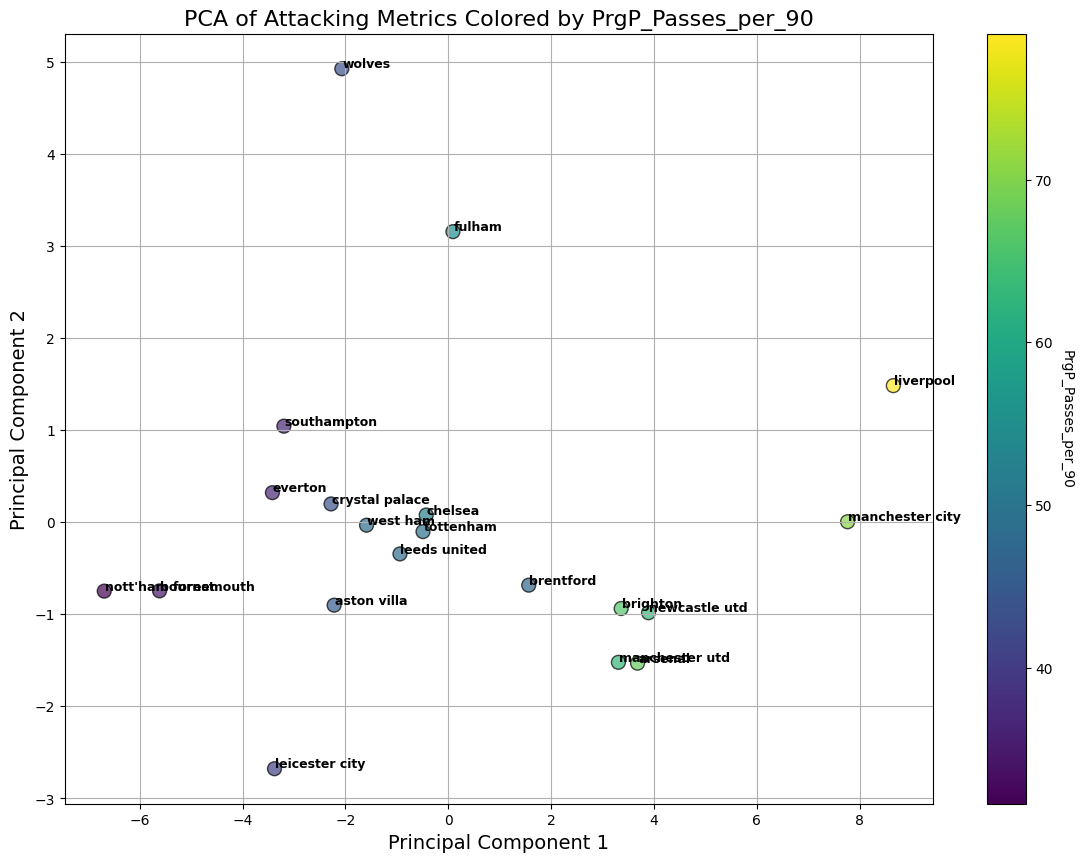

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Performing PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
scaler = StandardScaler()

# Selecting only the relevant metrics for PCA
attacking_metrics = [
    'PrgP_Passes_per_90', 'Carries_Carries_per_90', 'PrgC_Carries_per_90', 'Att_Take_Ons_per_90', 'Succ_Take_Ons_per_90',
    'xG_Expected_per_90', 'npxG_Expected_per_90', 'xAG_Expected_per_90', 'SCA_SCA_per_90', 'GCA_SCA_per_90',
    'Crs_Performance_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
    'Cmp_Long_per_90', 'Att_Long_per_90', 'Cmp_percent_Long', 'PKwon_Performance_per_90', 'Touches_Performance_per_90',
    'Ast_per_90', 'xAG_per_90', 'xA_per_90', 'KP_per_90', 'Final_Third_per_90', 'TB_Pass_Types_per_90',
    'Sw_Pass_Types_per_90', 'Crs_Pass_Types_per_90'
]

df_attacking_scaled = scaler.fit_transform(df_attacking_season_avg[attacking_metrics])
principal_components = pca.fit_transform(df_attacking_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Squad'] = df_attacking_season_avg['Squad']
pca_df['PrgP_Passes_per_90'] = df_attacking_season_avg['PrgP_Passes_per_90']  # Add the metric for coloring

# Normalize 'PrgP_Passes_per_90' for color mapping
norm = plt.Normalize(pca_df['PrgP_Passes_per_90'].min(), pca_df['PrgP_Passes_per_90'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Plotting the PCA results
plt.figure(figsize=(14, 10))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], color=sm.to_rgba(pca_df['PrgP_Passes_per_90']), s=100, edgecolor='k', alpha=0.7)

# Add color bar
cbar = plt.colorbar(sm)
cbar.set_label('PrgP_Passes_per_90', rotation=270, labelpad=15)

# Add labels for each point
for i, point in pca_df.iterrows():
    plt.text(point['PC1'] + 0.01, point['PC2'] + 0.01, point['Squad'], fontsize=9, fontweight='bold', ha='left')

plt.title('PCA of Attacking Metrics Colored by PrgP_Passes_per_90', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True)
plt.show()


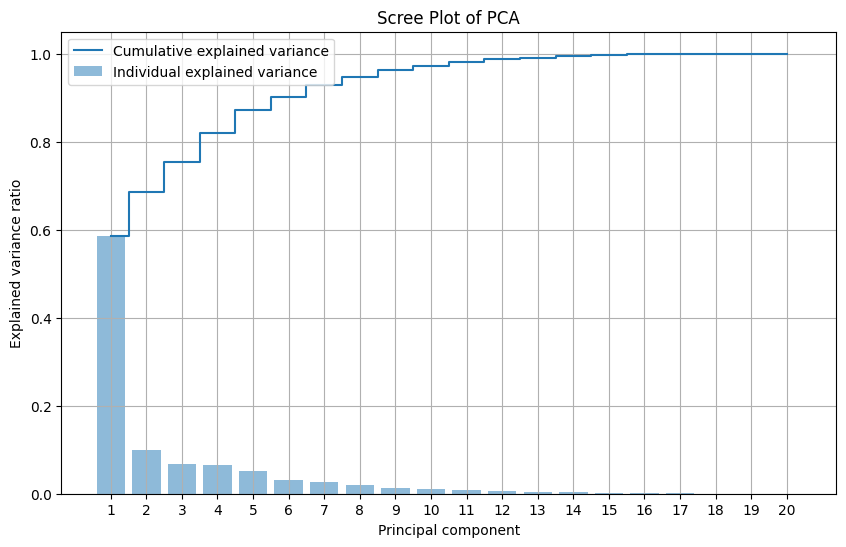

In [33]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# Perform PCA on the scaled data
scaler = StandardScaler()
df_attacking_scaled = scaler.fit_transform(df_attacking_season_avg[attacking_metrics])
pca = PCA()
principal_components = pca.fit_transform(df_attacking_scaled)

# Calculate the variance ratios
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.xticks(ticks=range(1, len(explained_variance) + 1))  # Add tick marks for clarity
plt.title('Scree Plot of PCA')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [34]:
# loadings1 = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=attacking_metrics)
# print(loadings1)

# Create DataFrame with only the first two principal components
loadings1 = pd.DataFrame(pca.components_.T[:, :2], columns=['PC1', 'PC2'], index=attacking_metrics)

print(loadings1)


                                 PC1       PC2
PrgP_Passes_per_90          0.243533 -0.018542
Carries_Carries_per_90      0.228920  0.031990
PrgC_Carries_per_90         0.220998 -0.024097
Att_Take_Ons_per_90         0.144021  0.214745
Succ_Take_Ons_per_90        0.144791  0.205520
xG_Expected_per_90          0.221479 -0.133381
npxG_Expected_per_90        0.214293 -0.135081
xAG_Expected_per_90         0.223253 -0.231690
SCA_SCA_per_90              0.239156 -0.057229
GCA_SCA_per_90              0.213451 -0.063980
Crs_Performance_per_90      0.159702  0.340079
In_Corner_Kicks_per_90      0.024978 -0.140010
Out_Corner_Kicks_per_90     0.144581  0.260611
Str_Corner_Kicks_per_90     0.082044 -0.175091
Cmp_Long_per_90             0.209955  0.162678
Att_Long_per_90             0.158205  0.211323
Cmp_percent_Long            0.205404  0.104591
PKwon_Performance_per_90   -0.013407  0.439990
Touches_Performance_per_90  0.233156  0.058798
Ast_per_90                  0.190369 -0.183505
xAG_per_90   

In [35]:
#Sorting loadings by the absolute values of the first principal component
sorted_loadings1 = loadings1.abs().sort_values(by='PC1', ascending=False)

print("Sorted Loadings by Importance in PC1:\n", sorted_loadings1)

Sorted Loadings by Importance in PC1:
                                  PC1       PC2
PrgP_Passes_per_90          0.243533  0.018542
SCA_SCA_per_90              0.239156  0.057229
Touches_Performance_per_90  0.233156  0.058798
xA_per_90                   0.231027  0.139432
KP_per_90                   0.229092  0.141306
Carries_Carries_per_90      0.228920  0.031990
Final_Third_per_90          0.225448  0.090567
xAG_per_90                  0.223253  0.231690
xAG_Expected_per_90         0.223253  0.231690
xG_Expected_per_90          0.221479  0.133381
PrgC_Carries_per_90         0.220998  0.024097
npxG_Expected_per_90        0.214293  0.135081
GCA_SCA_per_90              0.213451  0.063980
Cmp_Long_per_90             0.209955  0.162678
Cmp_percent_Long            0.205404  0.104591
Ast_per_90                  0.190369  0.183505
TB_Pass_Types_per_90        0.182526  0.189566
Sw_Pass_Types_per_90        0.170220  0.114531
Crs_Pass_Types_per_90       0.159702  0.340079
Crs_Performance_per_9

In [36]:
# Calculate the magnitude of loadings for both PC1 and PC2
loadings1['Magnitude'] = np.sqrt(loadings1['PC1']**2 + loadings1['PC2']**2)

# Sort features based on the magnitude of their loadings across both components
sorted_combined_loadings1 = loadings1.sort_values('Magnitude', ascending=False)

print("Sorted Loadings by Combined Magnitude:\n", sorted_combined_loadings1)


Sorted Loadings by Combined Magnitude:
                                  PC1       PC2  Magnitude
PKwon_Performance_per_90   -0.013407  0.439990   0.440194
Crs_Performance_per_90      0.159702  0.340079   0.375711
Crs_Pass_Types_per_90       0.159702  0.340079   0.375711
xAG_per_90                  0.223253 -0.231690   0.321749
xAG_Expected_per_90         0.223253 -0.231690   0.321749
Out_Corner_Kicks_per_90     0.144581  0.260611   0.298030
xA_per_90                   0.231027 -0.139432   0.269842
KP_per_90                   0.229092 -0.141306   0.269167
Cmp_Long_per_90             0.209955  0.162678   0.265604
Ast_per_90                  0.190369 -0.183505   0.264413
Att_Long_per_90             0.158205  0.211323   0.263981
TB_Pass_Types_per_90        0.182526 -0.189566   0.263156
Att_Take_Ons_per_90         0.144021  0.214745   0.258568
xG_Expected_per_90          0.221479 -0.133381   0.258541
npxG_Expected_per_90        0.214293 -0.135081   0.253315
Succ_Take_Ons_per_90        0.14

 **Visualising PCA loadings**

In [37]:

def plot_pca_loadings(loadings, title='PCA Loadings Plot'):
    fig, ax = plt.subplots(figsize=(16, 10))  # Increase the figure size for better spacing

    # Determine the scale of the plot based on the loadings with an increased margin for clear label display
    max_val = np.max(np.abs(loadings.values)) * 1.2  # Adjust the scale to provide more space around the edges

    # Plot points for each loading
    for i in range(loadings.shape[0]):
        ax.scatter(loadings.iloc[i, 0], loadings.iloc[i, 1], color='blue', s=150)  # Use larger points for better visibility
        # Adjust label positioning slightly away from the point for clarity
        ax.text(loadings.iloc[i, 0], loadings.iloc[i, 1], '  ' + loadings.index[i], color='green', ha='left', va='top', fontsize=10, style='italic')

    ax.set_xlabel("Principal Component 1 (PC1)", fontsize=14)
    ax.set_ylabel("Principal Component 2 (PC2)", fontsize=14)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_title(title, fontsize=16)
    ax.grid(True)

    # Set axis limits based on the adjusted maximum value to ensure all labels fit within the plot
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])

    # Ensure the grid and axes are visible and proportionate
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=12)  # Use larger tick labels for better readability

    plt.show()

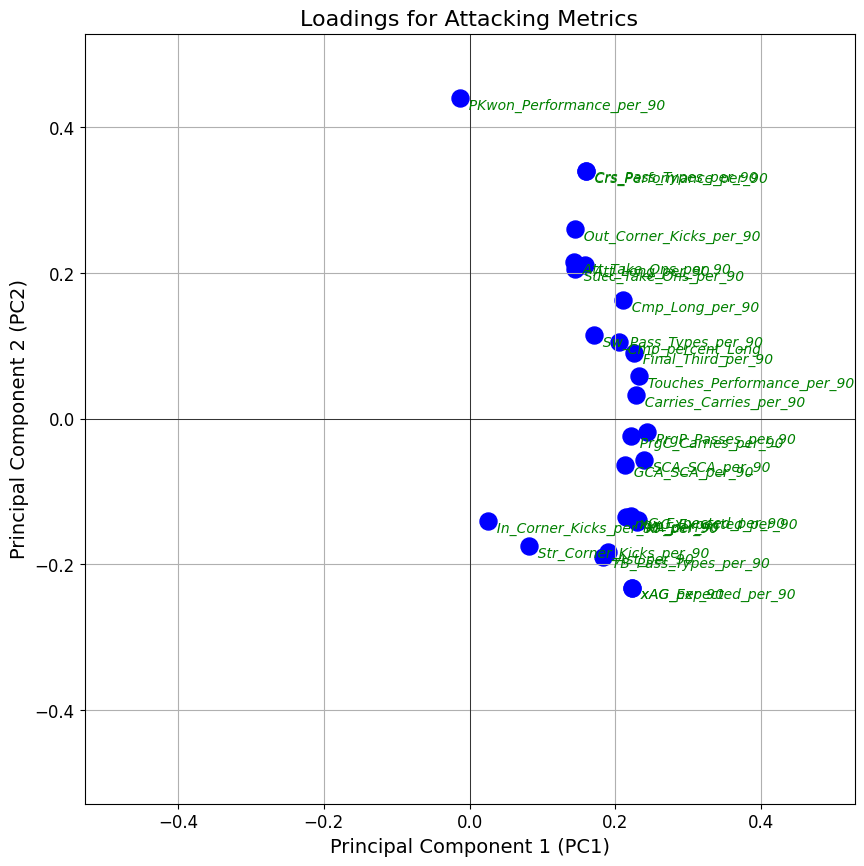

In [38]:
plot_pca_loadings(loadings1, title='Loadings for Attacking Metrics')

## 2.  DEFENSIVE VARIABLES

(20, 23)


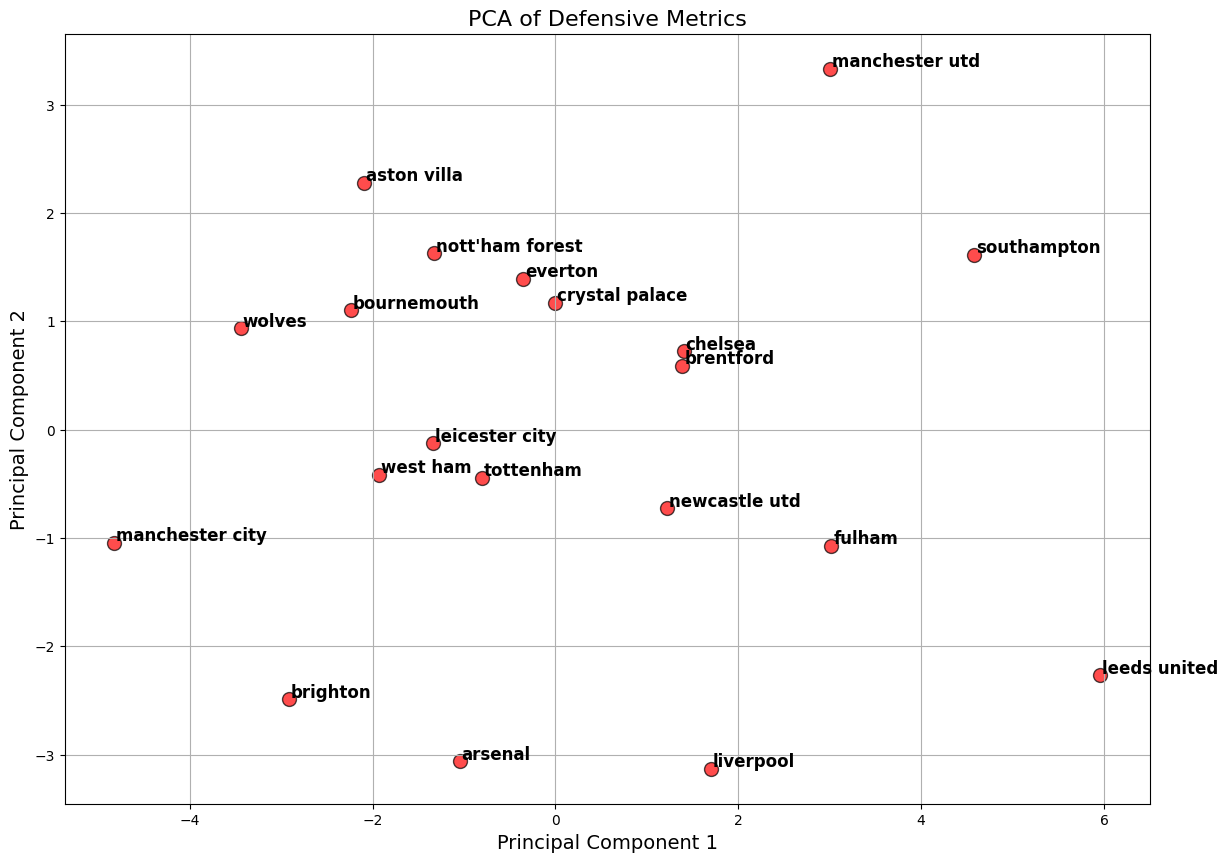

In [39]:
# Grouping and aggregating the defensive DataFrame
df_defensive_match_agg = df_defensive.groupby(['Squad', 'Date']).agg({
    col: 'mean' if 'percent' in col else 'sum' for col in defensive_columns
}).reset_index()

# Calculating season averages
df_defensive_season_avg = df_defensive_match_agg.groupby('Squad').mean().reset_index()

print(df_defensive_season_avg.shape)
df_defensive_season_avg



# THE PCA

# Selecting the numeric columns for PCA (excluding 'Squad' and any non-numeric columns)
defensive_metrics = [
    'Recov_Performance_per_90', 'Won_Aerial_Duels_per_90', 'Lost_Aerial_Duels_per_90',
    'Tkl_Tackles_per_90', 'TklW_Tackles_per_90', 'Def 3rd_Tackles_per_90',
    'Mid 3rd_Tackles_per_90', 'Att 3rd_Tackles_per_90', 'Tkl_Challenges_per_90',
    'Att_Challenges_per_90', 'Lost_Challenges_per_90', 'Blocks_Blocks_per_90',
    'Sh_Blocks_per_90', 'Pass_Blocks_per_90', 'Int_per_90', 'Tkl+Int_per_90',
    'Clr_per_90', 'Err_per_90', 'PKcon_Performance_per_90'
]

df_defensive_for_pca = df_defensive_season_avg[defensive_metrics]

# Scaling the data
scaler = StandardScaler()
df_defensive_scaled = scaler.fit_transform(df_defensive_for_pca)

# Performing PCA
pca = PCA(n_components=2)
principal_components_def = pca.fit_transform(df_defensive_scaled)

# Creating a DataFrame for the principal components
pca_def_df = pd.DataFrame(data=principal_components_def, columns=['PC1', 'PC2'])
pca_def_df['Squad'] = df_defensive_season_avg['Squad']


# Plotting the PCA results
plt.figure(figsize=(14, 10))
for i, point in pca_def_df.iterrows():
    plt.scatter(point['PC1'], point['PC2'], color='red', s=100, edgecolors='k', alpha=0.7)  # Use red for defensive metrics
    plt.text(point['PC1'] + 0.02, point['PC2'] + 0.02, point['Squad'], fontsize=12, fontweight='bold')

plt.title('PCA of Defensive Metrics', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True)
plt.show()

In [40]:
loadings2 = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=defensive_metrics)
print(loadings2)


                               PC1       PC2
Recov_Performance_per_90  0.197402 -0.095710
Won_Aerial_Duels_per_90   0.212514  0.181149
Lost_Aerial_Duels_per_90  0.172900  0.126767
Tkl_Tackles_per_90        0.330795 -0.076458
TklW_Tackles_per_90       0.321919 -0.006214
Def 3rd_Tackles_per_90    0.269041  0.187574
Mid 3rd_Tackles_per_90    0.259812 -0.243621
Att 3rd_Tackles_per_90    0.032704 -0.383117
Tkl_Challenges_per_90     0.287556 -0.230031
Att_Challenges_per_90     0.291537 -0.222373
Lost_Challenges_per_90    0.205759 -0.148577
Blocks_Blocks_per_90      0.215039  0.385561
Sh_Blocks_per_90          0.012277  0.462848
Pass_Blocks_per_90        0.249566  0.139034
Int_per_90                0.252944  0.022361
Tkl+Int_per_90            0.356938 -0.049059
Clr_per_90                0.147334  0.422857
Err_per_90                0.013289 -0.079334
PKcon_Performance_per_90 -0.000488  0.009586


In [41]:
#Sorting loadings by the absolute values of the first principal component
sorted_loadings2 = loadings2.abs().sort_values(by='PC1', ascending=False)

print("Sorted Loadings by Importance in PC1:\n", sorted_loadings2)

Sorted Loadings by Importance in PC1:
                                PC1       PC2
Tkl+Int_per_90            0.356938  0.049059
Tkl_Tackles_per_90        0.330795  0.076458
TklW_Tackles_per_90       0.321919  0.006214
Att_Challenges_per_90     0.291537  0.222373
Tkl_Challenges_per_90     0.287556  0.230031
Def 3rd_Tackles_per_90    0.269041  0.187574
Mid 3rd_Tackles_per_90    0.259812  0.243621
Int_per_90                0.252944  0.022361
Pass_Blocks_per_90        0.249566  0.139034
Blocks_Blocks_per_90      0.215039  0.385561
Won_Aerial_Duels_per_90   0.212514  0.181149
Lost_Challenges_per_90    0.205759  0.148577
Recov_Performance_per_90  0.197402  0.095710
Lost_Aerial_Duels_per_90  0.172900  0.126767
Clr_per_90                0.147334  0.422857
Att 3rd_Tackles_per_90    0.032704  0.383117
Err_per_90                0.013289  0.079334
Sh_Blocks_per_90          0.012277  0.462848
PKcon_Performance_per_90  0.000488  0.009586


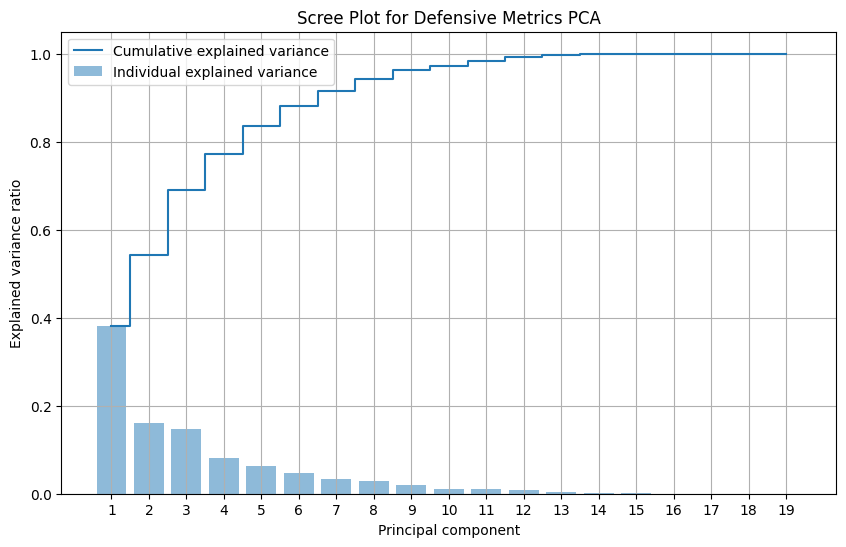

In [42]:
# Scaling the data
scaler = StandardScaler()
df_defensive_scaled = scaler.fit_transform(df_defensive_season_avg[defensive_metrics])

# Performing PCA
pca_defensive = PCA()
principal_components_defensive = pca_defensive.fit_transform(df_defensive_scaled)

# Calculate the explained variance ratio
explained_variance_defensive = pca_defensive.explained_variance_ratio_

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_defensive) + 1), explained_variance_defensive, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_defensive) + 1), np.cumsum(explained_variance_defensive), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Scree Plot for Defensive Metrics PCA')
plt.xticks(ticks=range(1, len(explained_variance_defensive) + 1))
plt.legend(loc='best')
plt.grid(True)
plt.show()


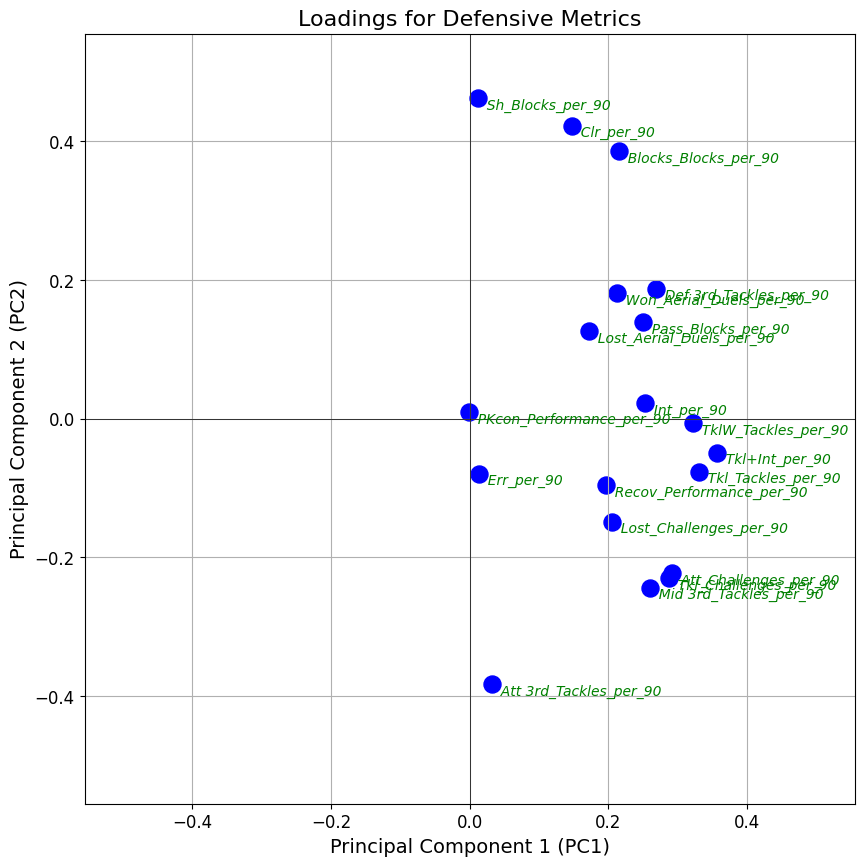

In [43]:
plot_pca_loadings(loadings2, title='Loadings for Defensive Metrics')

## 3. POSSESSION  VARIABLES

(20, 31)


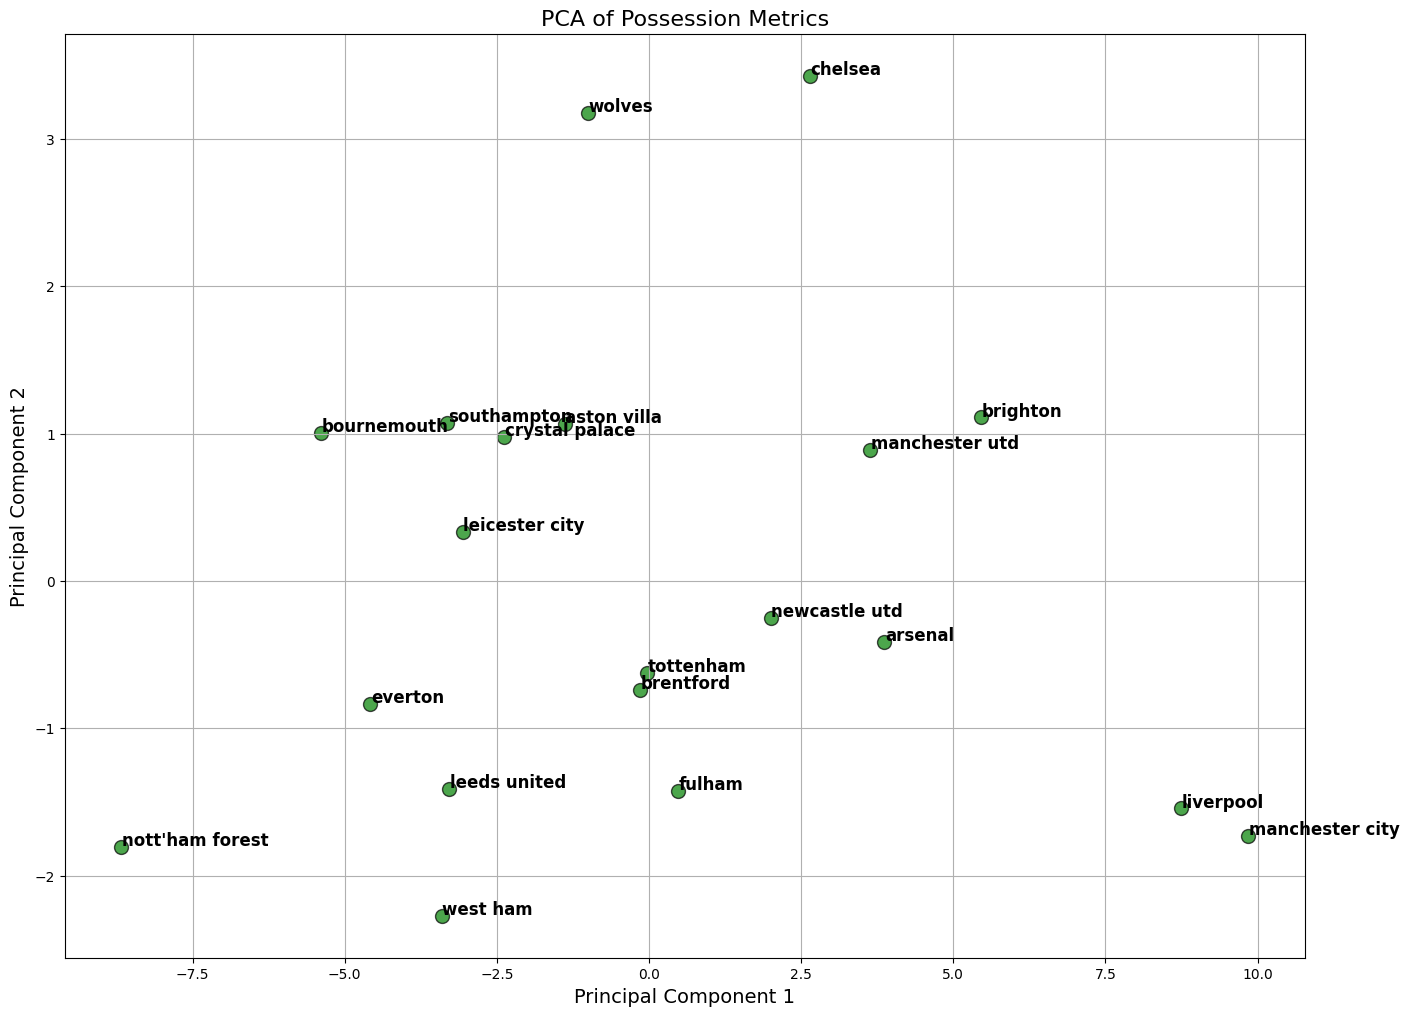

In [44]:
# Grouping and aggregating the possession DataFrame
df_possession_match_agg = df_possession.groupby(['Squad', 'Date']).agg({
    col: 'mean' if 'percent' in col else 'sum' for col in possession_columns
}).reset_index()

# Calculating season averages
df_possession_season_avg = df_possession_match_agg.groupby('Squad').mean().reset_index()
print(df_possession_season_avg.shape)
df_possession_season_avg


# THE PCA

# Selecting only the numeric columns for PCA, excluding non-numeric columns such as 'Squad'
possession_metrics = [
    'Cmp_Total_per_90', 'Att_Total_per_90', 'TotDist_Total_per_90', 'PrgDist_Total_per_90',
    'Cmp_Short_per_90', 'Att_Short_per_90', 'Cmp_Medium_per_90', 'Att_Medium_per_90',
    'Cmp_Long_per_90', 'Att_Long_per_90', 'Ast_per_90', 'xAG_per_90', 'xA_per_90',
    'KP_per_90', 'Final_Third_per_90', 'PPA_per_90', 'CrsPA_per_90', 'PrgP_per_90',
    'Cmp_percent_Total', 'Cmp_percent_Short', 'Cmp_percent_Medium', 'Cmp_percent_Long',
    'Cmp_percent_Passes', 'Touches_Performance_per_90', 'PrgP_Passes_per_90',
    'Carries_Carries_per_90', 'PrgC_Carries_per_90', 'Att_Take_Ons_per_90', 'Succ_Take_Ons_per_90'
]

df_possession_for_pca = df_possession_season_avg[possession_metrics]

# Scaling the data
scaler = StandardScaler()
df_possession_scaled = scaler.fit_transform(df_possession_for_pca)

# Performing PCA
pca = PCA(n_components=2)
principal_components_poss = pca.fit_transform(df_possession_scaled)

# Creating a DataFrame for the principal components
pca_poss_df = pd.DataFrame(data=principal_components_poss, columns=['PC1', 'PC2'])
pca_poss_df['Squad'] = df_possession_season_avg['Squad']


# Plotting the PCA results
plt.figure(figsize=(16, 12))
for i, point in pca_poss_df.iterrows():
    plt.scatter(point['PC1'], point['PC2'], color='green', s=100, edgecolors='k', alpha=0.7)  # Green for possession metrics
    plt.text(point['PC1'] + 0.01, point['PC2'] + 0.01, point['Squad'], fontsize=12, fontweight='bold')

plt.title('PCA of Possession Metrics', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True)
plt.show()


In [45]:
loadings3 = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=possession_metrics)
print(loadings3)


                                 PC1       PC2
Cmp_Total_per_90            0.211637 -0.003908
Att_Total_per_90            0.214302 -0.037265
TotDist_Total_per_90        0.211692 -0.029799
PrgDist_Total_per_90        0.207252 -0.045842
Cmp_Short_per_90            0.207447  0.029167
Att_Short_per_90            0.208922  0.017425
Cmp_Medium_per_90           0.206476 -0.007158
Att_Medium_per_90           0.207863 -0.024651
Cmp_Long_per_90             0.174922 -0.176301
Att_Long_per_90             0.107157 -0.257648
Ast_per_90                  0.153364 -0.265013
xAG_per_90                  0.180784 -0.163861
xA_per_90                   0.181509 -0.207207
KP_per_90                   0.192001 -0.097799
Final_Third_per_90          0.204215 -0.055287
PPA_per_90                  0.197555 -0.122817
CrsPA_per_90                0.046797 -0.234427
PrgP_per_90                 0.205810 -0.120043
Cmp_percent_Total           0.177179  0.357732
Cmp_percent_Short           0.144884  0.429872
Cmp_percent_M

In [46]:
#Sorting loadings by the absolute values of the first principal component
sorted_loadings3 = loadings3.abs().sort_values(by='PC1', ascending=False)

print("Sorted Loadings by Importance in PC1:\n", sorted_loadings3)

Sorted Loadings by Importance in PC1:
                                  PC1       PC2
Carries_Carries_per_90      0.214631  0.012931
Att_Total_per_90            0.214302  0.037265
Touches_Performance_per_90  0.213791  0.033048
TotDist_Total_per_90        0.211692  0.029799
Cmp_Total_per_90            0.211637  0.003908
Att_Short_per_90            0.208922  0.017425
Att_Medium_per_90           0.207863  0.024651
Cmp_Short_per_90            0.207447  0.029167
PrgDist_Total_per_90        0.207252  0.045842
Cmp_Medium_per_90           0.206476  0.007158
PrgP_Passes_per_90          0.205810  0.120043
PrgP_per_90                 0.205810  0.120043
Final_Third_per_90          0.204215  0.055287
Cmp_percent_Long            0.197895  0.092913
PPA_per_90                  0.197555  0.122817
PrgC_Carries_per_90         0.196230  0.002838
KP_per_90                   0.192001  0.097799
xA_per_90                   0.181509  0.207207
xAG_per_90                  0.180784  0.163861
Cmp_percent_Total    

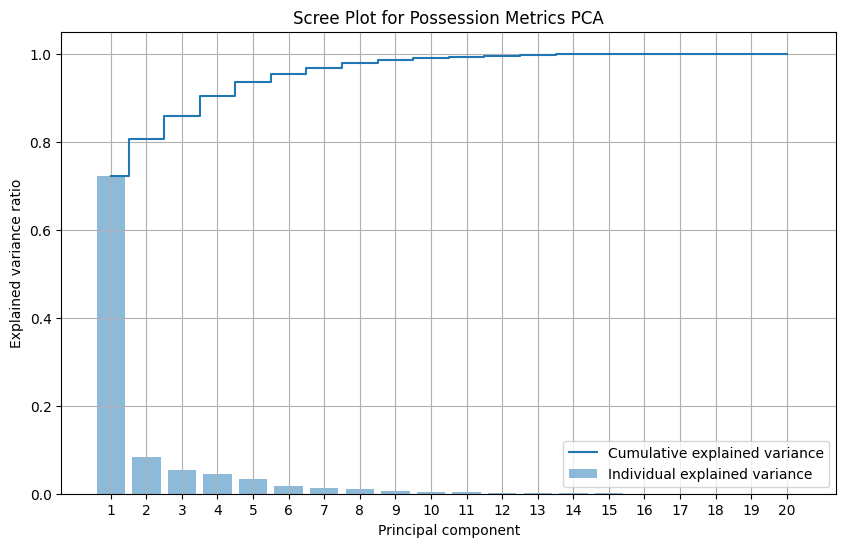

In [47]:
# Scaling the data
df_possession_scaled = scaler.fit_transform(df_possession_season_avg[possession_metrics])

# Performing PCA
pca_possession = PCA()
principal_components_possession = pca_possession.fit_transform(df_possession_scaled)

# Calculate the explained variance ratio
explained_variance_possession = pca_possession.explained_variance_ratio_

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_possession) + 1), explained_variance_possession, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_possession) + 1), np.cumsum(explained_variance_possession), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Scree Plot for Possession Metrics PCA')
plt.xticks(ticks=range(1, len(explained_variance_possession) + 1))
plt.legend(loc='best')
plt.grid(True)
plt.show()

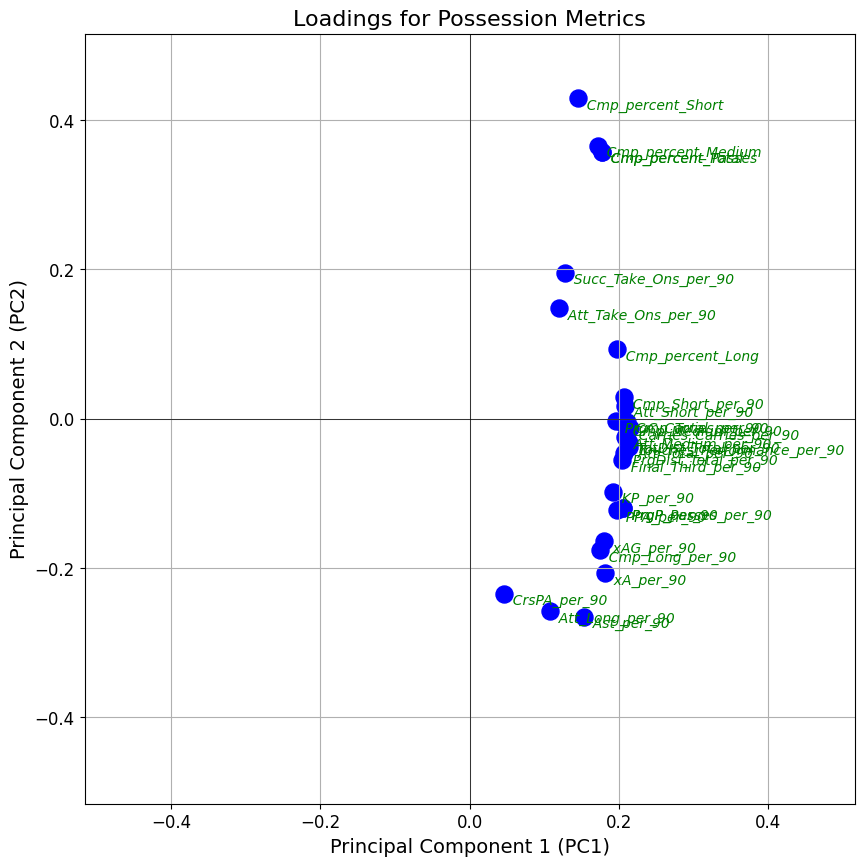

In [48]:
plot_pca_loadings(loadings3, title='Loadings for Possession Metrics')

# **Quantifying or Scoring style of play**

---



In [49]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.3 MB/s eta 0:00:00


In [50]:
from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

from datetime import datetime

In [51]:
# Function to calculate player scores based on PCA loadings
def calculate_player_scores(df, loadings):
    for metric, loading in loadings.items():
        df[metric + '_weighted'] = df[metric] * loading
    df['total_score'] = df[[metric + '_weighted' for metric in loadings]].sum(axis=1)
    return df

# Example loadings for all styles
loadings_attacking = {'PrgP_Passes_per_90': 0.243533, 'Carries_Carries_per_90': 0.228920, 'PrgC_Carries_per_90': 0.220998}
loadings_defensive = {'Recov_Performance_per_90': 0.197402, 'Won_Aerial_Duels_per_90': 0.212514, 'Tkl_Tackles_per_90': 0.330795}
loadings_possession = {'Cmp_Total_per_90': 0.211637, 'PrgDist_Total_per_90': 0.211692, 'Cmp_Short_per_90': 0.207447}


# Assume df_attacking, df_defensive, df_possession are already defined
df_attacking2 = calculate_player_scores(df_attacking.copy(), loadings_attacking)
df_defensive2 = calculate_player_scores(df_defensive.copy(), loadings_defensive)
df_possession2 = calculate_player_scores(df_possession.copy(), loadings_possession)



In [52]:
def get_team_scores_for_date(df, date, teams):
    print("Filtering for teams:", teams)
    print("On date:", date)
    df_match = df[(df['Date'] == date) & (df['Squad'].isin(teams)) & (df['Min'] > 0)]
#     print("Filtered DataFrame:", df_match.head())  # Print the first few rows to see what's being filtered

    if df_match.empty:
        print("No matches found for the specified conditions.")
        return pd.Series([], dtype=float)

    return df_match.groupby('Squad')['total_score'].mean()



In [53]:
def calculate_percentiles_for_date_range(dfs, start_date, end_date, teams):
    percentiles = {}

    for style, df in dfs.items():
        # Filter the DataFrame for the specific date range and minimum playtime
        df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['Min'] > 0)]

        # Extract scores for the specified teams on the given date range
        team_scores = df_filtered[df_filtered['Squad'].isin(teams)].groupby('Squad')['total_score'].mean()

        # Calculate percentile ranking within this filtered set for each team
        if not team_scores.empty:
            # Create a series of all scores within the filtered DataFrame to calculate percentiles against
            all_scores = df_filtered['total_score']

            # Calculate the percentile of each team score within the style's context
            percentiles[style] = team_scores.apply(lambda x: stats.percentileofscore(all_scores, x))
        else:
            percentiles[style] = pd.Series([], dtype=float)

    return percentiles

## **testing for the crystal palace vs arsenal match**

In [54]:
# Re-run the test for a specific date
test_date = datetime.strptime('2022-08-05', '%Y-%m-%d')
teams_test = ['crystal palace', 'arsenal']  # Ensure these are exactly as they appear in the DataFrame


print("Team Scores on Test Date:", get_team_scores_for_date(df_attacking2, test_date, teams_test))

print("Team Scores on Test Date:", get_team_scores_for_date(df_possession2, test_date, teams_test))

print("Team Scores on Test Date:", get_team_scores_for_date(df_defensive2, test_date, teams_test))



Filtering for teams: ['crystal palace', 'arsenal']
On date: 2022-08-05 00:00:00
Team Scores on Test Date: Squad
arsenal            9.415172
crystal palace    13.053722
Name: total_score, dtype: float64
Filtering for teams: ['crystal palace', 'arsenal']
On date: 2022-08-05 00:00:00
Team Scores on Test Date: Squad
arsenal           48.500470
crystal palace    64.608905
Name: total_score, dtype: float64
Filtering for teams: ['crystal palace', 'arsenal']
On date: 2022-08-05 00:00:00
Team Scores on Test Date: Squad
arsenal           3.765022
crystal palace    1.448230
Name: total_score, dtype: float64


In [55]:
# Define the date range for the analysis,  which is the dates between the game week 1

start_date = datetime.strptime('2022-08-04', '%Y-%m-%d')
end_date = datetime.strptime('2022-08-07', '%Y-%m-%d')
teams_test = ['crystal palace', 'arsenal']

# Calculate and print percentiles across styles for the given date range
percentiles_results = calculate_percentiles_for_date_range({
    'Attacking': df_attacking2,
    'Defensive': df_defensive2,
    'Possession': df_possession2
}, start_date, end_date, teams_test)

print("Percentiles for Date Range:", percentiles_results)


Percentiles for Date Range: {'Attacking': Squad
arsenal           62.585034
crystal palace    82.993197
Name: total_score, dtype: float64, 'Defensive': Squad
arsenal           92.176871
crystal palace    41.496599
Name: total_score, dtype: float64, 'Possession': Squad
arsenal           52.380952
crystal palace    67.687075
Name: total_score, dtype: float64}


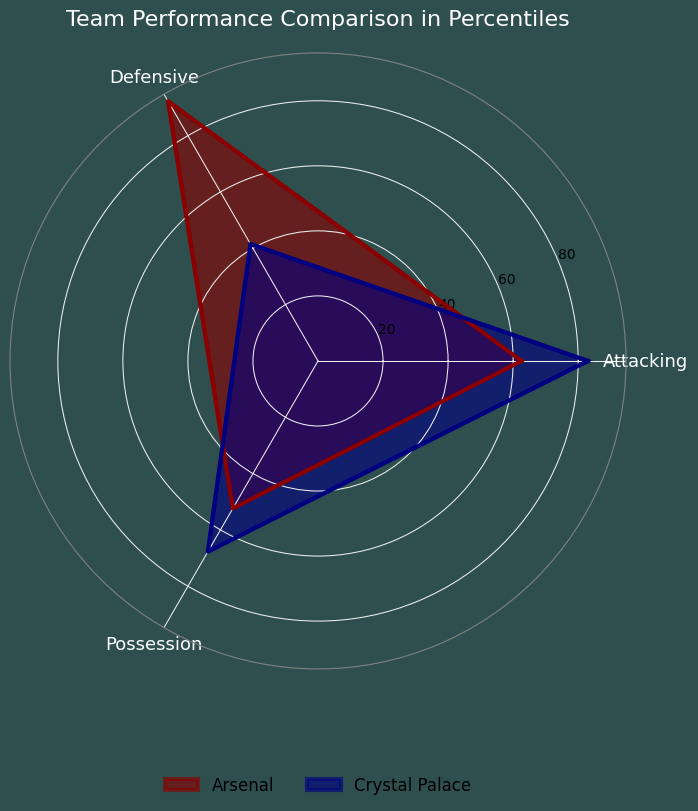

In [56]:
# Visualising the comparison between both teams using radar or pizza plot

# Setting up the stats and labels
labels = np.array(['Attacking', 'Defensive', 'Possession'])
arsenal_stats = np.array([percentiles_results['Attacking']['arsenal'],
                          percentiles_results['Defensive']['arsenal'],
                          percentiles_results['Possession']['arsenal']])
crystal_palace_stats = np.array([percentiles_results['Attacking']['crystal palace'],
                                 percentiles_results['Defensive']['crystal palace'],
                                 percentiles_results['Possession']['crystal palace']])

# Append the start value to the end to close the circle
arsenal_stats = np.concatenate((arsenal_stats, [arsenal_stats[0]]))
crystal_palace_stats = np.concatenate((crystal_palace_stats, [crystal_palace_stats[0]]))
num_vars = len(labels)

# Create a 360 degree angle array
# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + angles[:1]
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Create angles based on the number of variables
angles += angles[:1]  # Complete the loop to close the circle in the radar chart

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('darkslategray')  # Background color for the entire plot
ax.set_facecolor('darkslategray')  # Background color for the polar axis

# Plot Arsenal
ax.fill(angles, arsenal_stats, color='darkred', alpha=0.6, label='Arsenal', linewidth=3)
ax.plot(angles, arsenal_stats, color='darkred', linewidth=3)  # Add line for better visibility

# Plot Crystal Palace
ax.fill(angles, crystal_palace_stats, color='navy', alpha=0.6, label='Crystal Palace', linewidth=3)
ax.plot(angles, crystal_palace_stats, color='navy', linewidth=3)  # Add line for better visibility

# Beautify the plot
ax.set_xticks(angles[:-1])  # Set the angle for each axis
ax.set_xticklabels(labels, fontsize=13, color='white')  # Set the labels for each axis

# Add a grid
ax.yaxis.grid(True, color='#EEEEEE', linestyle='-', linewidth=0.75)
ax.xaxis.grid(True, color='#EEEEEE', linestyle='-', linewidth=0.75)

# Customize the circle
ax.spines['polar'].set_visible(True)  # Make the outer circle visible
ax.spines['polar'].set_color('gray')  # Set the color of the main circle

# Add legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=12, frameon=False, ncol=2)

# Set the title
ax.set_title('Team Performance Comparison in Percentiles', fontsize=16, color='white', pad=20)

plt.show()


In [57]:
# Checking the percentile for all teams from game week1

In [58]:
def calculate_percentiles_for_all_teams(df, start_date, end_date):
    # Filter the DataFrame for the specific date range and minimum playtime
    df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['Min'] > 0)]

    # Calculate the mean scores for all teams in the DataFrame
    team_scores = df_filtered.groupby('Squad')['total_score'].mean()

    # Get all scores for this style on this date
    all_scores = df_filtered['total_score']

    # Calculate percentile ranking within this filtered set for each team
    if not team_scores.empty:
        percentiles = team_scores.apply(lambda x: stats.percentileofscore(all_scores, x))
        return percentiles.sort_values(ascending=False)
    else:
        return pd.Series([], dtype=float)

# Define the date range for the analysis
start_date = datetime.strptime('2022-08-04', '%Y-%m-%d')
end_date = datetime.strptime('2022-08-07', '%Y-%m-%d')

# Calculate percentiles for each style
percentile_attacking = calculate_percentiles_for_all_teams(df_attacking2, start_date, end_date)
percentile_defensive = calculate_percentiles_for_all_teams(df_defensive2, start_date, end_date)
percentile_possession = calculate_percentiles_for_all_teams(df_possession2, start_date, end_date)

# Print the percentiles for each style
print("Attacking Percentiles:\n", percentile_attacking, '\n')
print("Defensive Percentiles:\n", percentile_defensive , '\n')
print("Possession Percentiles:\n", percentile_possession, '\n')


Attacking Percentiles:
 Squad
manchester city    85.374150
crystal palace     82.993197
aston villa        81.292517
wolves             75.170068
manchester utd     74.829932
leicester city     71.088435
chelsea            67.006803
arsenal            62.585034
liverpool          62.244898
tottenham          58.503401
brentford          58.163265
newcastle utd      57.482993
southampton        56.122449
leeds united       50.000000
everton            45.238095
brighton           39.455782
fulham             34.353741
bournemouth        27.891156
nott'ham forest    27.891156
west ham           15.986395
Name: total_score, dtype: float64 

Defensive Percentiles:
 Squad
manchester utd     97.619048
arsenal            92.176871
chelsea            88.775510
fulham             85.034014
newcastle utd      81.632653
tottenham          76.870748
manchester city    66.666667
everton            62.925170
leeds united       53.061224
liverpool          51.020408
nott'ham forest    51.020408
wolve

# **Quantifying or Scoring style of play using player performance rolling window (moving average)**

---



In [59]:
def calculate_player_scores(df, loadings, style_name):
    for metric, loading in loadings.items():
        df[metric + '_weighted'] = df[metric] * loading
    df[style_name + '_score'] = df[[metric + '_weighted' for metric in loadings]].sum(axis=1)

    # Calculate rolling average based on the last 3 entries
    df[style_name + '_rolling_avg'] = df.groupby('Player')[style_name + '_score'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

    return df

# Loadings for each style
loadings_attacking = {'PrgP_Passes_per_90': 0.243533, 'Carries_Carries_per_90': 0.228920, 'PrgC_Carries_per_90': 0.220998}
loadings_defensive = {'Recov_Performance_per_90': 0.197402, 'Won_Aerial_Duels_per_90': 0.212514, 'Tkl_Tackles_per_90': 0.330795}
loadings_possession = {'Cmp_Total_per_90': 0.211637, 'PrgDist_Total_per_90': 0.211692, 'Cmp_Short_per_90': 0.207447}

# Calculating scores for each style
df_attacking2 = calculate_player_scores(df_attacking.copy(), loadings_attacking, "attacking")
df_defensive2 = calculate_player_scores(df_defensive.copy(), loadings_defensive, "defensive")
df_possession2 = calculate_player_scores(df_possession.copy(), loadings_possession, "possession")

# # Example to check output
# print(df_attacking2[['Player', 'attacking_score', 'attacking_rolling_avg']].head())
# print(df_defensive2[['Player', 'defensive_score', 'defensive_rolling_avg']].head())
# print(df_possession2[['Player', 'possession_score', 'possession_rolling_avg']].head())


In [60]:
df_attacking2['Date'] = pd.to_datetime(df_attacking2['Date'])
df_defensive2['Date'] = pd.to_datetime(df_defensive2['Date'])
df_possession2['Date'] = pd.to_datetime(df_possession2['Date'])

def get_team_scores_for_date_range(df, start_date, end_date, teams, score_type):
    print("Filtering for teams:", teams)
    print("Date range:", start_date, "to", end_date)
    df_range = df[(df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['Squad'].isin(teams)) & (df['Min'] > 0)]

    if df_range.empty:
        print("No matches found for the specified conditions.")
        return pd.Series([], dtype=float)

    return df_range.groupby('Squad')[score_type].mean()



In [61]:


def calculate_percentiles_for_date_range(dfs, start_date, end_date, teams):
    percentiles = {}
    for style, df in dfs.items():
        score_type = style.lower() + '_rolling_avg'  # Ensure correct column name

        # Verify the column exists
        if score_type not in df.columns:
            print(f"Error: Column {score_type} does not exist in DataFrame")
            continue

        df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['Min'] > 0)]
        team_scores = df_filtered[df_filtered['Squad'].isin(teams)].groupby('Squad')[score_type].mean()

        if not team_scores.empty:
            all_scores = df_filtered[score_type]
            percentiles[style] = team_scores.apply(lambda x: stats.percentileofscore(all_scores, x))
        else:
            percentiles[style] = pd.Series([], dtype=float)

    return percentiles



In [62]:
# Example usage:
start_date = datetime.strptime('2022-08-04', '%Y-%m-%d')
end_date = datetime.strptime('2022-08-07', '%Y-%m-%d')
teams_test = ['crystal palace', 'arsenal']

print("Attacking Scores for Date Range:", get_team_scores_for_date_range(df_attacking2, start_date, end_date, teams_test, 'attacking_rolling_avg'))
print("Defensive Scores for Date Range:", get_team_scores_for_date_range(df_defensive2, start_date, end_date, teams_test, 'defensive_rolling_avg'))
print("Possession Scores for Date Range:", get_team_scores_for_date_range(df_possession2, start_date, end_date, teams_test, 'possession_rolling_avg'))


Filtering for teams: ['crystal palace', 'arsenal']
Date range: 2022-08-04 00:00:00 to 2022-08-07 00:00:00
Attacking Scores for Date Range: Squad
arsenal            9.415172
crystal palace    13.053722
Name: attacking_rolling_avg, dtype: float64
Filtering for teams: ['crystal palace', 'arsenal']
Date range: 2022-08-04 00:00:00 to 2022-08-07 00:00:00
Defensive Scores for Date Range: Squad
arsenal           3.765022
crystal palace    1.448230
Name: defensive_rolling_avg, dtype: float64
Filtering for teams: ['crystal palace', 'arsenal']
Date range: 2022-08-04 00:00:00 to 2022-08-07 00:00:00
Possession Scores for Date Range: Squad
arsenal           48.500470
crystal palace    64.608905
Name: possession_rolling_avg, dtype: float64


In [63]:
# Calculate and print percentiles across styles for the given date range
percentiles_results = calculate_percentiles_for_date_range({
    'Attacking': df_attacking2,
    'Defensive': df_defensive2,
    'Possession': df_possession2
}, start_date, end_date, teams_test)

print("Percentiles for Date Range:", percentiles_results)


Percentiles for Date Range: {'Attacking': Squad
arsenal           62.585034
crystal palace    82.993197
Name: attacking_rolling_avg, dtype: float64, 'Defensive': Squad
arsenal           92.176871
crystal palace    41.496599
Name: defensive_rolling_avg, dtype: float64, 'Possession': Squad
arsenal           52.380952
crystal palace    67.687075
Name: possession_rolling_avg, dtype: float64}


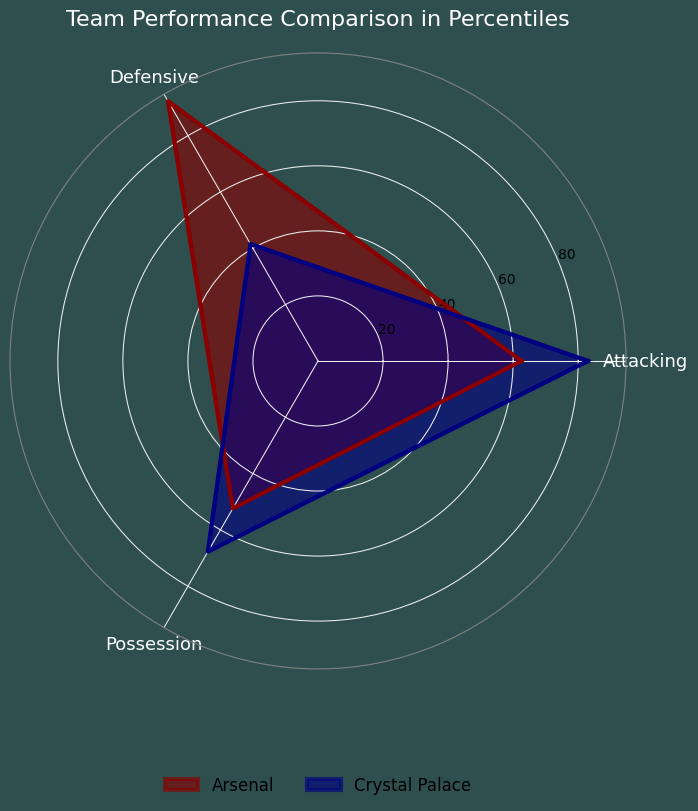

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Setting up the stats and labels
labels = np.array(['Attacking', 'Defensive', 'Possession'])
arsenal_stats = np.array([percentiles_results['Attacking']['arsenal'],
                          percentiles_results['Defensive']['arsenal'],
                          percentiles_results['Possession']['arsenal']])
crystal_palace_stats = np.array([percentiles_results['Attacking']['crystal palace'],
                                 percentiles_results['Defensive']['crystal palace'],
                                 percentiles_results['Possession']['crystal palace']])

# Append the start value to the end to close the circle
arsenal_stats = np.concatenate((arsenal_stats, [arsenal_stats[0]]))
crystal_palace_stats = np.concatenate((crystal_palace_stats, [crystal_palace_stats[0]]))
num_vars = len(labels)
# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('darkslategray')  # Background color for the entire plot
ax.set_facecolor('darkslategray')  # Background color for the polar axis

# Plot Arsenal
ax.fill(angles, arsenal_stats, color='darkred', alpha=0.6, label='Arsenal', linewidth=3)
ax.plot(angles, arsenal_stats, color='darkred', linewidth=3)  # Add line for better visibility

# Plot Crystal Palace
ax.fill(angles, crystal_palace_stats, color='navy', alpha=0.6, label='Crystal Palace', linewidth=3)
ax.plot(angles, crystal_palace_stats, color='navy', linewidth=3)  # Add line for better visibility

# Beautify the plot
ax.set_xticks(angles[:-1])  # Set the angle for each axis
ax.set_xticklabels(labels, fontsize=13, color='white')  # Set the labels for each axis

# Add a grid
ax.yaxis.grid(True, color='#EEEEEE', linestyle='-', linewidth=0.75)
ax.xaxis.grid(True, color='#EEEEEE', linestyle='-', linewidth=0.75)

# Customize the circle
ax.spines['polar'].set_visible(True)  # Make the outer circle visible
ax.spines['polar'].set_color('gray')  # Set the color of the main circle

# Add legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=12, frameon=False, ncol=2)

# Set the title
ax.set_title('Team Performance Comparison in Percentiles', fontsize=16, color='white', pad=20)

plt.show()


# **Preparing Data for Building out models from here on**

---



---



In [65]:
df3 = df[['Player', 'Season', 'Date', 'Day', 'Comp', 'Round','Venue','Result',
         'Squad', 'Opponent','Start', 'Pos', 'Role','Min',
        'PrgP_Passes_per_90', 'PrgC_Carries_per_90', 'PrgDist_Total_per_90',
        'Cmp_Long_per_90', 'Final_Third_per_90','TB_Pass_Types_per_90','TI_Pass_Types_per_90',
        'Att_Take_Ons_per_90','Succ_Take_Ons_per_90', 'KP_per_90','PPA_per_90',
        'CrsPA_per_90','Att 3rd_Tackles_per_90','SoT_Performance_per_90','PKwon_Performance_per_90',

        'Cmp_Passes_per_90', 'Cmp_Short_per_90', 'Cmp_Medium_per_90','Carries_Carries_per_90',
        'Touches_Performance_per_90', 'Cmp_Total_per_90',


        'Tkl+Int_per_90', 'TklW_Tackles_per_90', 'Def 3rd_Tackles_per_90', 'Mid 3rd_Tackles_per_90',
        'PKcon_Performance_per_90', 'Recov_Performance_per_90', 'Won_Aerial_Duels_per_90',
        'Lost_Aerial_Duels_per_90', 'Clr_per_90', 'Err_per_90','Blocks_Blocks_per_90',

        'xG_Expected_per_90', 'npxG_Expected_per_90', 'xAG_Expected_per_90', 'SCA_SCA_per_90', 'GCA_SCA_per_90',
        'Ast_per_90', 'xA_per_90', 'xAG_per_90','Cmp_percent_Long', 'Gls_Performance_per_90','Crs_Performance_per_90',

         ]]

df4 = df3.copy()


# calcuating score function repeated here
#-------------------------------------------------------------------------------------------------------------------------------------------------------------

def calculate_score(df, features, loadings):
    df['total_score'] = sum(df[feature] * loadings.get(feature, 0) for feature in features)
    return df


# attacking calculation here
#-------------------------------------------------------------------------------------------------------------------------------------------------------------

# Define the metrics and their corresponding loadings for each playing style
attacking_features = [
    'PrgP_Passes_per_90', 'SCA_SCA_per_90', 'Touches_Performance_per_90', 'xA_per_90',
    'KP_per_90', 'Carries_Carries_per_90', 'Final_Third_per_90', 'xAG_per_90',
    'xAG_Expected_per_90', 'xG_Expected_per_90', 'PrgC_Carries_per_90', 'npxG_Expected_per_90',
    'GCA_SCA_per_90', 'Cmp_Long_per_90', 'Cmp_percent_Long', 'Ast_per_90',
    'TB_Pass_Types_per_90',  'Crs_Performance_per_90',  'Succ_Take_Ons_per_90',
    'Att_Take_Ons_per_90',
     'PKwon_Performance_per_90'
]

attacking_loadings = {'PrgP_Passes_per_90': 0.243533, 'SCA_SCA_per_90': 0.239156,
                      'Touches_Performance_per_90': 0.233156,'xA_per_90': 0.231027,
                      'KP_per_90': 0.229092,'Carries_Carries_per_90': 0.228920,'Final_Third_per_90': 0.225448,
                      'xAG_per_90': 0.223253, 'xAG_Expected_per_90': 0.223253,'xG_Expected_per_90': 0.221479,
                      'PrgC_Carries_per_90': 0.220998,'npxG_Expected_per_90': 0.214293,
                      'GCA_SCA_per_90': 0.213451, 'Cmp_Long_per_90': 0.209955,'Cmp_percent_Long': 0.205404,
                      'Ast_per_90': 0.190369,'TB_Pass_Types_per_90': 0.182526,
                      'Crs_Performance_per_90': 0.159702,
                      'Succ_Take_Ons_per_90': 0.144791,'Att_Take_Ons_per_90': 0.144021,
                      'PKwon_Performance_per_90': 0.013407
}


# 'Sw_Pass_Types_per_90': 0.170220, 'Sw_Pass_Types_per_90',
# 'Crs_Pass_Types_per_90', 'Crs_Pass_Types_per_90': 0.159702,
# 'Att_Long_per_90': 0.158205,'Att_Long_per_90',
#  'Out_Corner_Kicks_per_90', 'In_Corner_Kicks_per_90','Str_Corner_Kicks_per_90',
# 'Out_Corner_Kicks_per_90': 0.144581,'Str_Corner_Kicks_per_90': 0.082044,'In_Corner_Kicks_per_90': 0.024978,


# Example for calculating attacking score
df4 = calculate_score(df4, attacking_features, attacking_loadings)
df4.rename(columns={'total_score': 'attacking_score'}, inplace=True)




# Possesion calculation here
#-------------------------------------------------------------------------------------------------------------------------------------------------------------
possession_features = [
    'Carries_Carries_per_90','Touches_Performance_per_90',
    'Cmp_Total_per_90',  'Cmp_Short_per_90', 'PrgDist_Total_per_90',
    'Cmp_Medium_per_90', 'PrgP_Passes_per_90',
    'Final_Third_per_90', 'Cmp_percent_Long', 'PPA_per_90',
    'PrgC_Carries_per_90', 'KP_per_90', 'xA_per_90',
    'xAG_per_90',
    'Cmp_Long_per_90',  'Ast_per_90',
    'Succ_Take_Ons_per_90', 'Att_Take_Ons_per_90',
    'CrsPA_per_90'
]

possession_loadings = {
    'Carries_Carries_per_90': 0.214631,  'Touches_Performance_per_90': 0.213791,
    'Cmp_Total_per_90': 0.211637,  'Cmp_Short_per_90': 0.207447, 'PrgDist_Total_per_90': 0.207252,
    'Cmp_Medium_per_90': 0.206476, 'PrgP_Passes_per_90': 0.205810,
    'Final_Third_per_90': 0.204215, 'Cmp_percent_Long': 0.197895, 'PPA_per_90': 0.197555,
    'PrgC_Carries_per_90': 0.196230, 'KP_per_90': 0.192001, 'xA_per_90': 0.181509,
    'xAG_per_90': 0.180784,
    'Cmp_Long_per_90': 0.174922,  'Ast_per_90': 0.153364,
     'Succ_Take_Ons_per_90': 0.127997, 'Att_Take_Ons_per_90': 0.119307,
     'CrsPA_per_90': 0.046797
}
#  'Att_Total_per_90', 'Att_Total_per_90': 0.214302,
# 'TotDist_Total_per_90''TotDist_Total_per_90': 0.211692,
# 'Att_Short_per_90', 'Att_Medium_per_90','Att_Short_per_90': 0.208922,
# 'Att_Medium_per_90': 0.207863,
# 'PrgP_per_90': 0.205810,'PrgP_per_90',
# 'Cmp_percent_Total', 'Cmp_percent_Passes','Cmp_percent_Total': 0.177179, 'Cmp_percent_Passes': 0.177179,
# 'Cmp_percent_Medium': 0.171551,'Cmp_percent_Short': 0.144884,
# 'Cmp_percent_Medium', 'Cmp_percent_Short',
# 'Att_Long_per_90': 0.107157, 'Att_Long_per_90',


df4 = calculate_score(df4, possession_features, possession_loadings)
df4.rename(columns={'total_score': 'possession_score'}, inplace=True)



# DEFENSIVE CALCULATION HERE
#-------------------------------------------------------------------------------------------------------------------------------------------------------------

defensive_features = [
    'Tkl+Int_per_90',  'TklW_Tackles_per_90',  'Def 3rd_Tackles_per_90','Mid 3rd_Tackles_per_90',
    'Blocks_Blocks_per_90', 'Won_Aerial_Duels_per_90','Recov_Performance_per_90',
    'Lost_Aerial_Duels_per_90', 'Clr_per_90','Att 3rd_Tackles_per_90', 'Err_per_90',
    'PKcon_Performance_per_90'
]

defensive_loadings = {
    'Tkl+Int_per_90': 0.356938,  'TklW_Tackles_per_90': 0.321919,'Def_3rd_Tackles_per_90': 0.269041,
    'Mid_3rd_Tackles_per_90': 0.259812, 'Blocks_Blocks_per_90': 0.215039, 'Won_Aerial_Duels_per_90': 0.212514,
    'Recov_Performance_per_90': 0.197402, 'Lost_Aerial_Duels_per_90': 0.172900, 'Clr_per_90': 0.147334,
    'Att_3rd_Tackles_per_90': 0.032704, 'Err_per_90': 0.013289,
    'PKcon_Performance_per_90': 0.000488
}


# 'Tkl_Tackles_per_90','Tkl_Tackles_per_90': 0.330795,
# 'Att_Challenges_per_90': 0.291537, 'Att_Challenges_per_90',
# 'Tkl_Challenges_per_90','Tkl_Challenges_per_90': 0.287556,
# 'Int_per_90': 0.252944, 'Int_per_90',
# 'Sh_Blocks_per_90': 0.012277,  'Sh_Blocks_per_90',
# 'Pass_Blocks_per_90',   'Pass_Blocks_per_90': 0.249566,
# 'Lost_Challenges_per_90': 0.205759, 'Lost_Challenges_per_90'




df4 = calculate_score(df4, defensive_features, defensive_loadings)
df4.rename(columns={'total_score': 'defensive_score'}, inplace=True)


### ROLLING WINDOW FOR THE NEW DATAFRAME

In [66]:
# Filter the DataFrame for the 2022-2023 season
df4_filtered = df4[df4['Season'] == '2022-2023']

# Define columns to exclude from rolling calculations
exclude_cols = {'Player', 'Season', 'Date', 'Day', 'Comp', 'Round', 'Venue', 'Result',
                'Squad', 'Opponent', 'Start', 'Pos', 'Role', 'Min'}

# Get columns to apply rolling average
rolling_cols = [col for col in df4.columns if col not in exclude_cols]

# Sort by 'Player' and 'Date' to ensure rolling is done in the correct order
df4_filtered = df4_filtered.sort_values(by=['Player', 'Date'])

# Apply rolling average grouped by 'Player' only on the specified rolling columns
for col in rolling_cols:
    df4_filtered[col + '_rolling_avg'] = df4_filtered.groupby('Player')[col].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)

df4_filtered.sort_values(by=['Date', 'Venue'], ascending=[True, False], inplace=True)
print(df4_filtered.shape)

# Display the first few rows of the final DataFrame to verify
df4_filtered.head()


(13491, 106)


Player     Season        Date  Day            Comp  \
19       cheick doucouré  2022-2023  2022-08-05  fri  premier league   
26        chris richards  2022-2023  2022-08-05  fri  premier league   
13          eberechi eze  2022-2023  2022-08-05  fri  premier league   
27       jaïro riedewald  2022-2023  2022-08-05  fri  premier league   
23  jean-philippe mateta  2022-2023  2022-08-05  fri  premier league   

          Round Venue Result           Squad Opponent Start  \
19  matchweek 1  home  l 0–2  crystal palace  arsenal     y   
26  matchweek 1  home  l 0–2  crystal palace  arsenal     n   
13  matchweek 1  home  l 0–2  crystal palace  arsenal     y   
27  matchweek 1  home  l 0–2  crystal palace  arsenal     n   
23  matchweek 1  home  l 0–2  crystal palace  arsenal     n   

                                    Pos      Role   Min  PrgP_Passes_per_90  \
19                                   dm  midfield  74.0            7.297297   
26  on matchday squad, but did not play   defense   0.0            0.000000   
13                                   am  midfield  85.0            0.000000   
27  on matchday squad, but did not play  midfield   0.0            0.000000   
23                                   fw   forward  33.0            0.000000   

    PrgC_Carries_per_90  PrgDist_Total_per_90  Cmp_Long_per_90  \
19             2.432432            200.675676         3.648649   
26             0.000000              0.000000         0.000000   
13             1.058824            126.000000         3.176471   
27             0.000000              0.000000         0.000000   
23             2.727273              0.000000         0.000000   

    Final_Third_per_90  TB_Pass_Types_per_90  TI_Pass_Types_per_90  \
19            3.648649                   0.0                   0.0   
26            0.000000                   0.0                   0.0   
13            2.117647                   0.0                   0.0   
27            0.000000                   0.0                   0.0   
23            0.000000                   0.0                   0.0   

    Att_Take_Ons_per_90  Succ_Take_Ons_per_90  KP_per_90  PPA_per_90  \
19             0.000000              0.000000   0.000000         0.0   
26             0.000000              0.000000   0.000000         0.0   
13             4.235294              1.058824   0.000000         0.0   
27             0.000000              0.000000   0.000000         0.0   
23             0.000000              0.000000   2.727273         0.0   

    CrsPA_per_90  Att 3rd_Tackles_per_90  SoT_Performance_per_90  \
19           0.0                     0.0                0.000000   
26           0.0                     0.0                0.000000   
13           0.0                     0.0                1.058824   
27           0.0                     0.0                0.000000   
23           0.0                     0.0                0.000000   

    PKwon_Performance_per_90  Cmp_Passes_per_90  Cmp_Short_per_90  \
19                       0.0          38.918919         23.108108   
26                       0.0           0.000000          0.000000   
13                       0.0          33.882353         15.882353   
27                       0.0           0.000000          0.000000   
23                       0.0          21.818182         16.363636   

    Cmp_Medium_per_90  Carries_Carries_per_90  Touches_Performance_per_90  \
19          12.162162               30.405405                   47.432432   
26           0.000000                0.000000                    0.000000   
13          11.647059               36.000000                   58.235294   
27           0.000000                0.000000                    0.000000   
23           2.727273               21.818182                   35.454545   

    Cmp_Total_per_90  Tkl+Int_per_90  TklW_Tackles_per_90  \
19         38.918919        2.432432             1.216216   
26          0.000000        0.000000             0.000000   
13        

## **Importing match result data**

In [67]:
team_stat = pd.read_csv('/content/drive/MyDrive/team_match_performance.csv')

team_stat.head(2)

League  Match_Date                     Matchweek       Home_Team  \
0  Premier League  2022-08-05  Premier League (Matchweek 1)  crystal palace   
1  Premier League  2022-08-06  Premier League (Matchweek 1)          fulham   

  Home_Formation  Home_Possession  Home_Success_Pass  Home_Pass  \
0        4-2-3-1               56                514        609   
1        4-2-3-1               33                203        340   

   Home_Passing_Accuracy  Home_Fouls  Home_Corners  Home_Crosses  \
0                     84          16             3            19   
1                     60           7             4            19   

   Home_Touches  Home_Tackles  Home_Interceptions  Home_Aerials_Won  \
0           726            18                   8                10   
1           474            24                  10                23   

   Home_Clearances  Home_Offsides  Home_Goal_Kicks  Home_Throw_Ins  \
0               18              1                4              25   
1               31              4                8              22   

   Home_Long_Balls  Home_Yellow_Cards  Home_Red_Cards  Away_Team  \
0               83                  1               0    arsenal   
1               77                  2               0  liverpool   

  Away_Formation  Away_Possession  Away_Success_Pass  Away_Pass  \
0          4-3-3               44                378        469   
1          4-3-3               67                514        675   

   Away_Passing_Accuracy  Away_Fouls  Away_Corners  Away_Crosses  \
0                     81          11             5            11   
1                     76           9             4            18   

   Away_Touches  Away_Tackles  Away_Interceptions  Away_Aerials_Won  \
0           599            29                   9                14   
1           784            11                  10                13   

   Away_Clearances  Away_Offsides  Away_Goal_Kicks  Away_Throw_Ins  \
0               24              2                2              14   
1               16              4                5              35   

   Away_Long_Balls  Away_Yellow_Cards  Away_Red_Cards  \
0               59                  2               0   
1               94                  0               0   

                                            Game_URL  HomeGoals  AwayGoals  
0  https://fbref.com/en/matches/e62f6e78/Crystal-...          0          2  
1  https://fbref.com/en/matches/6713c1dc/Fulham-L...          2          2

In [68]:
team_stat = team_stat[['League','Match_Date','Matchweek','Home_Team', 'Home_Formation','Home_Possession', 'HomeGoals',
                          'AwayGoals', 'Away_Team',	'Away_Formation',	'Away_Possession']]

team_stat.head(2)

League  Match_Date                     Matchweek       Home_Team  \
0  Premier League  2022-08-05  Premier League (Matchweek 1)  crystal palace   
1  Premier League  2022-08-06  Premier League (Matchweek 1)          fulham   

  Home_Formation  Home_Possession  HomeGoals  AwayGoals  Away_Team  \
0        4-2-3-1               56          0          2    arsenal   
1        4-2-3-1               33          2          2  liverpool   

  Away_Formation  Away_Possession  
0          4-3-3               44  
1          4-3-3               67

### Preprocess to match existing player logs

In [69]:
def standardize_team_names(name):
    name = name.lower().strip()  # Convert to lower case and strip whitespace
    name_mapping = {
        'tottenham hotspur': 'tottenham',
        'newcastle united': 'newcastle utd',
        'wolverhampton wanderers': 'wolves',
        'manchester united': 'manchester utd',
        'west ham united': 'west ham',
        'brighton hove albion': 'brighton',
        'brighton  hove albion': 'brighton',  # Correcting this to 'brighton'
        'nottingham forest': "nott'ham forest",
        'leeds united': 'leeds united',  # Already correct but included for completeness
        # Add any other necessary mappings
    }
    return name_mapping.get(name, name)

df4_filtered['Date'] = pd.to_datetime(df4_filtered['Date'])
team_stat['Match_Date'] = pd.to_datetime(team_stat['Match_Date'])

# Apply standardization to the team names in both dataframes
df4_filtered['Squad'] = df4_filtered['Squad'].apply(standardize_team_names)
df4_filtered['Opponent'] = df4_filtered['Opponent'].apply(standardize_team_names)
team_stat['Home_Team'] = team_stat['Home_Team'].apply(standardize_team_names)
team_stat['Away_Team'] = team_stat['Away_Team'].apply(standardize_team_names)

# Function to create a normalized match identifier
def create_match_identifier(date, team1, team2):
    teams = sorted([team1, team2])
    return f"{date.strftime('%Y-%m-%d')}_{teams[0]}_{teams[1]}"

# Generate match identifiers for df4_filtered and team_stat
df4_filtered['match_identifier'] = df4_filtered.apply(
    lambda row: create_match_identifier(row['Date'], row['Squad'], row['Opponent']), axis=1)
team_stat['match_identifier'] = team_stat.apply(
    lambda row: create_match_identifier(row['Match_Date'], row['Home_Team'], row['Away_Team']), axis=1)

# Identify and print unmatched identifiers
player_unique_identifiers = set(df4_filtered['match_identifier'].unique())
team_unique_identifiers = set(team_stat['match_identifier'].unique())
unmatched_in_players = player_unique_identifiers - team_unique_identifiers
unmatched_in_teams = team_unique_identifiers - player_unique_identifiers

print("Unmatched identifiers in player data:", unmatched_in_players)
print("Unmatched identifiers in team stats:", unmatched_in_teams)

# Merge df4_filtered with team_stat based on the 'match_identifier' field
merged_df = pd.merge(df4_filtered, team_stat, how='left', on='match_identifier', suffixes=('_player', '_team'))

# Check the result of the merge and print the first few rows
print(f"Merged DataFrame Rows: {merged_df.shape[0]}")
merged_df.head(5)


Unmatched identifiers in player data: set()
Unmatched identifiers in team stats: set()
Merged DataFrame Rows: 13491


Player     Season       Date  Day            Comp  \
0       cheick doucouré  2022-2023 2022-08-05  fri  premier league   
1        chris richards  2022-2023 2022-08-05  fri  premier league   
2          eberechi eze  2022-2023 2022-08-05  fri  premier league   
3       jaïro riedewald  2022-2023 2022-08-05  fri  premier league   
4  jean-philippe mateta  2022-2023 2022-08-05  fri  premier league   

         Round Venue Result           Squad Opponent Start  \
0  matchweek 1  home  l 0–2  crystal palace  arsenal     y   
1  matchweek 1  home  l 0–2  crystal palace  arsenal     n   
2  matchweek 1  home  l 0–2  crystal palace  arsenal     y   
3  matchweek 1  home  l 0–2  crystal palace  arsenal     n   
4  matchweek 1  home  l 0–2  crystal palace  arsenal     n   

                                   Pos      Role   Min  PrgP_Passes_per_90  \
0                                   dm  midfield  74.0            7.297297   
1  on matchday squad, but did not play   defense   0.0            0.000000   
2                                   am  midfield  85.0            0.000000   
3  on matchday squad, but did not play  midfield   0.0            0.000000   
4                                   fw   forward  33.0            0.000000   

   PrgC_Carries_per_90  PrgDist_Total_per_90  Cmp_Long_per_90  \
0             2.432432            200.675676         3.648649   
1             0.000000              0.000000         0.000000   
2             1.058824            126.000000         3.176471   
3             0.000000              0.000000         0.000000   
4             2.727273              0.000000         0.000000   

   Final_Third_per_90  TB_Pass_Types_per_90  TI_Pass_Types_per_90  \
0            3.648649                   0.0                   0.0   
1            0.000000                   0.0                   0.0   
2            2.117647                   0.0                   0.0   
3            0.000000                   0.0                   0.0   
4            0.000000                   0.0                   0.0   

   Att_Take_Ons_per_90  Succ_Take_Ons_per_90  KP_per_90  PPA_per_90  \
0             0.000000              0.000000   0.000000         0.0   
1             0.000000              0.000000   0.000000         0.0   
2             4.235294              1.058824   0.000000         0.0   
3             0.000000              0.000000   0.000000         0.0   
4             0.000000              0.000000   2.727273         0.0   

   CrsPA_per_90  Att 3rd_Tackles_per_90  SoT_Performance_per_90  \
0           0.0                     0.0                0.000000   
1           0.0                     0.0                0.000000   
2           0.0                     0.0                1.058824   
3           0.0                     0.0                0.000000   
4           0.0                     0.0                0.000000   

   PKwon_Performance_per_90  Cmp_Passes_per_90  Cmp_Short_per_90  \
0                       0.0          38.918919         23.108108   
1                       0.0           0.000000          0.000000   
2                       0.0          33.882353         15.882353   
3                       0.0           0.000000          0.000000   
4                       0.0          21.818182         16.363636   

   Cmp_Medium_per_90  Carries_Carries_per_90  Touches_Performance_per_90  \
0          12.162162               30.405405                   47.432432   
1           0.000000                0.000000                    0.000000   
2          11.647059               36.000000                   58.235294   
3           0.000000                0.000000                    0.000000   
4           2.727273               21.818182                   35.454545   

   Cmp_Total_per_90  Tkl+Int_per_90  TklW_Tackles_per_90  \
0         38.918919        2.432432             1.216216   
1          0.000000        0.000000             0.000000   
2         33.882353        1.058824             1.058824   
3          0

In [70]:

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

print("Columns with Nulls in Merged DataFrame:")
print(list(merged_df.isnull().sum()))



Columns with Nulls in Merged DataFrame:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [71]:
merged_df.describe()

Date           Min  PrgP_Passes_per_90  \
count                          13491  13491.000000        13491.000000   
mean   2023-01-03 08:39:16.771180800     51.999185            2.875560   
min              2022-08-05 00:00:00      0.000000            0.000000   
25%              2022-10-15 00:00:00      4.000000            0.000000   
50%              2023-01-14 00:00:00     69.000000            1.125000   
75%              2023-04-02 00:00:00     90.000000            4.044944   
max              2023-05-28 00:00:00     90.000000          180.000000   
std                              NaN     38.833610            5.228501   

       PrgC_Carries_per_90  PrgDist_Total_per_90  Cmp_Long_per_90  \
count         13491.000000          13491.000000     13491.000000   
mean              1.414421            165.082449         2.548424   
min               0.000000              0.000000         0.000000   
25%               0.000000              0.000000         0.000000   
50%               0.000000            109.213483         1.000000   
75%               2.000000            252.000000         4.000000   
max             180.000000           6030.000000        90.000000   
std               3.787167            209.928271         4.471768   

       Final_Third_per_90  TB_Pass_Types_per_90  TI_Pass_Types_per_90  \
count        13491.000000          13491.000000          13491.000000   
mean             2.229725              0.121932              1.442936   
min              0.000000              0.000000              0.000000   
25%              0.000000              0.000000              0.000000   
50%              1.000000              0.000000              0.000000   
75%              3.000000              0.000000              0.000000   
max            270.000000             90.000000            135.000000   
std              4.956464              0.981847              4.491500   

       Att_Take_Ons_per_90  Succ_Take_Ons_per_90     KP_per_90    PPA_per_90  \
count         13491.000000          13491.000000  13491.000000  13491.000000   
mean              1.587485              0.698057      0.742656      0.621697   
min               0.000000              0.000000      0.000000      0.000000   
25%               0.000000              0.000000      0.000000      0.000000   
50%               0.000000              0.000000      0.000000      0.000000   
75%               2.000000              1.000000      1.000000      1.000000   
max              90.000000             90.000000     90.000000     90.000000   
std               4.406700              2.556546      2.256582      1.910817   

       CrsPA_per_90  Att 3rd_Tackles_per_90  SoT_Performance_per_90  \
count  13491.000000            13491.000000            13491.000000   
mean       0.156069                0.212986                0.330451   
min        0.000000                0.000000                0.000000   
25%        0.000000                0.000000                0.000000   
50%        0.000000                0.000000                0.000000   
75%        0.000000                0.000000                0.000000   
max       90.000000               90.000000               90.000000   
std        1.343823                1.690867                1.403259   

       PKwon_Performance_per_90  Cmp_Passes_per_90  Cmp_Short_per_90  \
count              13491.000000       13491.000000      13491.000000   
mean                   0.009726          28.777287         13.919466   
min                    0.000000           0.000000          0.000000   
25%                    0.000000           5.000000          0.000000   
50%                    0.000000          24.000000         11.000000   
75%                    0.000000          42.000000         20.506329   
max                   45.000000         450.000000        360.000000   
std                    0.402004          29.521029         16.264025   

       Cmp_Medium_per_90  Carries_Carries_per_90  Touches_Performance_per_9

In [72]:
# Example of spot-checking by comparing some key metrics before and after merge
print(df4_filtered[['Squad', 'match_identifier']].head())
print(team_stat[['Home_Team', 'match_identifier']].head())
print(merged_df[['Squad', 'Home_Team', 'match_identifier']].head())


             Squad                   match_identifier
19  crystal palace  2022-08-05_arsenal_crystal palace
26  crystal palace  2022-08-05_arsenal_crystal palace
13  crystal palace  2022-08-05_arsenal_crystal palace
27  crystal palace  2022-08-05_arsenal_crystal palace
23  crystal palace  2022-08-05_arsenal_crystal palace
        Home_Team                          match_identifier
0  crystal palace         2022-08-05_arsenal_crystal palace
1          fulham               2022-08-06_fulham_liverpool
2       tottenham          2022-08-06_southampton_tottenham
3   newcastle utd  2022-08-06_newcastle utd_nott'ham forest
4    leeds united            2022-08-06_leeds united_wolves
            Squad       Home_Team                   match_identifier
0  crystal palace  crystal palace  2022-08-05_arsenal_crystal palace
1  crystal palace  crystal palace  2022-08-05_arsenal_crystal palace
2  crystal palace  crystal palace  2022-08-05_arsenal_crystal palace
3  crystal palace  crystal palace  2022-

In [73]:
# Convert HomeGoals and AwayGoals to integers
merged_df['HomeGoals'] = merged_df['HomeGoals'].astype(int)
merged_df['AwayGoals'] = merged_df['AwayGoals'].astype(int)

# Create the 'Outcome' column based on the conditions described
merged_df['Outcome'] = (
    (merged_df['HomeGoals'] > merged_df['AwayGoals']).astype(int) * 1 +
    (merged_df['HomeGoals'] < merged_df['AwayGoals']).astype(int) * 2 +
    (merged_df['HomeGoals'] == merged_df['AwayGoals']).astype(int) * 0
)

In [74]:
# check the created classification target class outcome to make sure three class onlyu present.
merged_df['Outcome'].unique()

array([2, 1, 0])

In [75]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Iterate over the specified columns
for column in ['Player', 'Squad', 'Role', 'Venue', 'Opponent', 'Home_Team', 'Away_Team']:
    # Create a LabelEncoder instance
    le = LabelEncoder()

    # Fit and transform the column values and store them in a new column with '_ID' suffix
    merged_df[column + '_ID'] = le.fit_transform(merged_df[column].fillna('Unknown'))

    # Store the LabelEncoder instance for later use with the column name followed by '_encoder'
    label_encoders[column + '_encoder'] = le



In [76]:
label_encoders

{'Player_encoder': LabelEncoder(),
 'Squad_encoder': LabelEncoder(),
 'Role_encoder': LabelEncoder(),
 'Venue_encoder': LabelEncoder(),
 'Opponent_encoder': LabelEncoder(),
 'Home_Team_encoder': LabelEncoder(),
 'Away_Team_encoder': LabelEncoder()}

In [77]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Extract and save only the Player and Squad encoders
for key, encoder in label_encoders.items():
    if key == 'Player_encoder' or key == 'Squad_encoder':
        filename = key.split('_')[0] + '_encoder.pkl'  # Extract 'Player' or 'Squad' and create filename
        joblib.dump(encoder, filename)


In [78]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Load Player and Squad encoders
player_encoder = joblib.load('Player_encoder.pkl')
squad_encoder = joblib.load('Squad_encoder.pkl')

# Use the loaded encoders as needed in your application


In [79]:
list(merged_df.columns)

['Player',
 'Season',
 'Date',
 'Day',
 'Comp',
 'Round',
 'Venue',
 'Result',
 'Squad',
 'Opponent',
 'Start',
 'Pos',
 'Role',
 'Min',
 'PrgP_Passes_per_90',
 'PrgC_Carries_per_90',
 'PrgDist_Total_per_90',
 'Cmp_Long_per_90',
 'Final_Third_per_90',
 'TB_Pass_Types_per_90',
 'TI_Pass_Types_per_90',
 'Att_Take_Ons_per_90',
 'Succ_Take_Ons_per_90',
 'KP_per_90',
 'PPA_per_90',
 'CrsPA_per_90',
 'Att 3rd_Tackles_per_90',
 'SoT_Performance_per_90',
 'PKwon_Performance_per_90',
 'Cmp_Passes_per_90',
 'Cmp_Short_per_90',
 'Cmp_Medium_per_90',
 'Carries_Carries_per_90',
 'Touches_Performance_per_90',
 'Cmp_Total_per_90',
 'Tkl+Int_per_90',
 'TklW_Tackles_per_90',
 'Def 3rd_Tackles_per_90',
 'Mid 3rd_Tackles_per_90',
 'PKcon_Performance_per_90',
 'Recov_Performance_per_90',
 'Won_Aerial_Duels_per_90',
 'Lost_Aerial_Duels_per_90',
 'Clr_per_90',
 'Err_per_90',
 'Blocks_Blocks_per_90',
 'xG_Expected_per_90',
 'npxG_Expected_per_90',
 'xAG_Expected_per_90',
 'SCA_SCA_per_90',
 'GCA_SCA_per_90',

In [80]:
# Drop duplicates to get unique matches
unique_matches_df = merged_df.drop_duplicates(subset='match_identifier')


In [81]:
# Descriptive statistics for possession
home_possession_stats = unique_matches_df['Home_Possession'].describe()
away_possession_stats = unique_matches_df['Away_Possession'].describe()

print("Home Team Possession Statistics:\n", home_possession_stats)
print("\nAway Team Possession Statistics:\n", away_possession_stats)


Home Team Possession Statistics:
 count    380.000000
mean      50.455263
std       12.551555
min       19.000000
25%       40.000000
50%       51.000000
75%       59.000000
max       80.000000
Name: Home_Possession, dtype: float64

Away Team Possession Statistics:
 count    380.000000
mean      49.547368
std       12.554908
min       20.000000
25%       41.000000
50%       49.000000
75%       60.000000
max       81.000000
Name: Away_Possession, dtype: float64


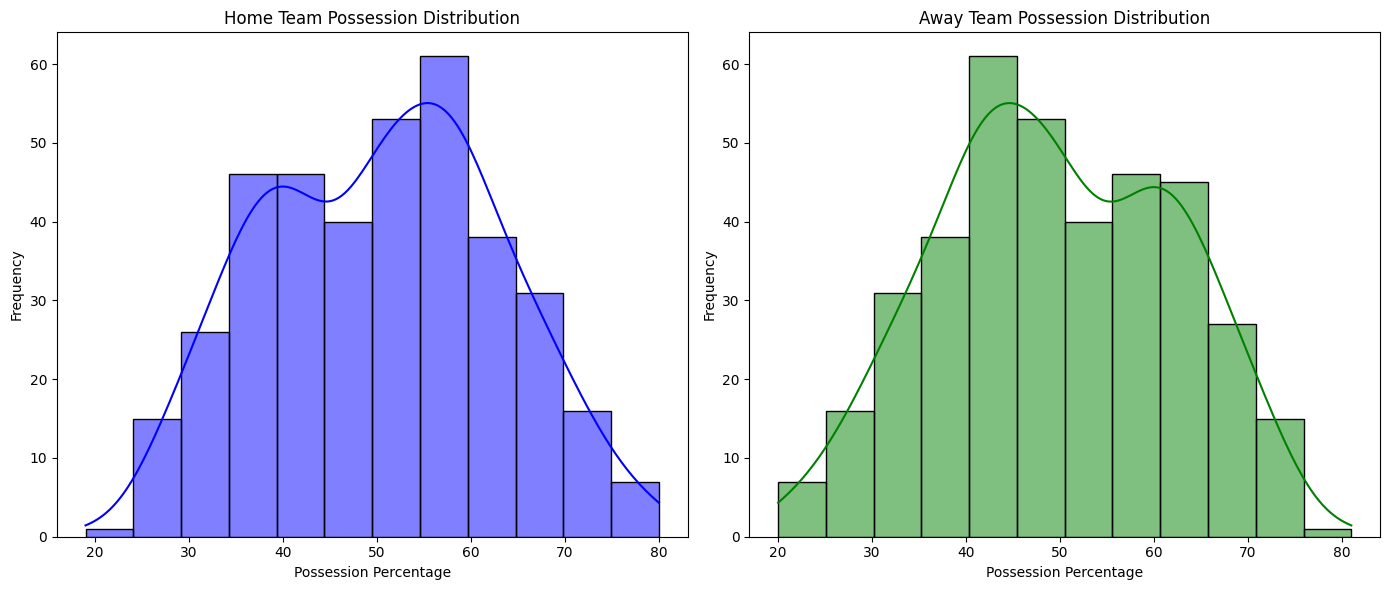

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(unique_matches_df['Home_Possession'], kde=True, color='blue')
plt.title('Home Team Possession Distribution')
plt.xlabel('Possession Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(unique_matches_df['Away_Possession'], kde=True, color='green')
plt.title('Away Team Possession Distribution')
plt.xlabel('Possession Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


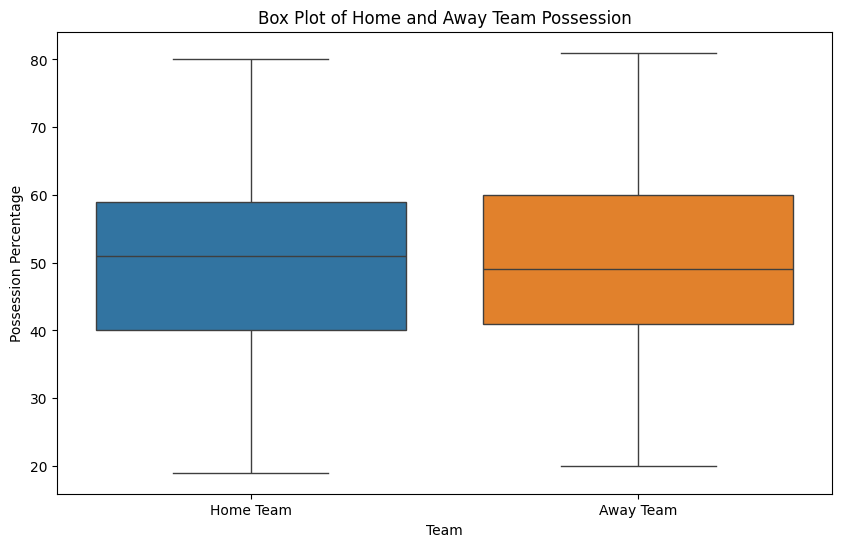

In [83]:
# Box plots for possession values
plt.figure(figsize=(10, 6))
sns.boxplot(data=unique_matches_df[['Home_Possession', 'Away_Possession']])
plt.title('Box Plot of Home and Away Team Possession')
plt.xlabel('Team')
plt.ylabel('Possession Percentage')
plt.xticks([0, 1], ['Home Team', 'Away Team'])
plt.show()


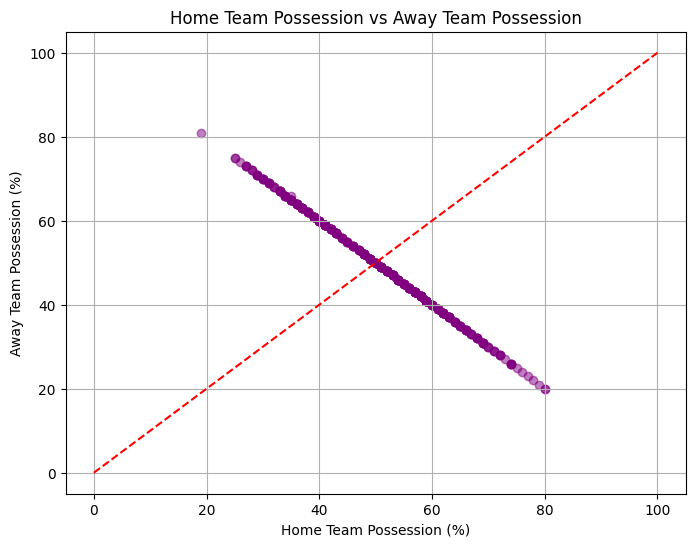

In [84]:
# Scatter plot of home vs away team possession
plt.figure(figsize=(8, 6))
plt.scatter(unique_matches_df['Home_Possession'], unique_matches_df['Away_Possession'], alpha=0.5, color='purple')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # Line of equality
plt.title('Home Team Possession vs Away Team Possession')
plt.xlabel('Home Team Possession (%)')
plt.ylabel('Away Team Possession (%)')
plt.grid(True)
plt.show()


<ipython-input-85-72e419dccf15>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



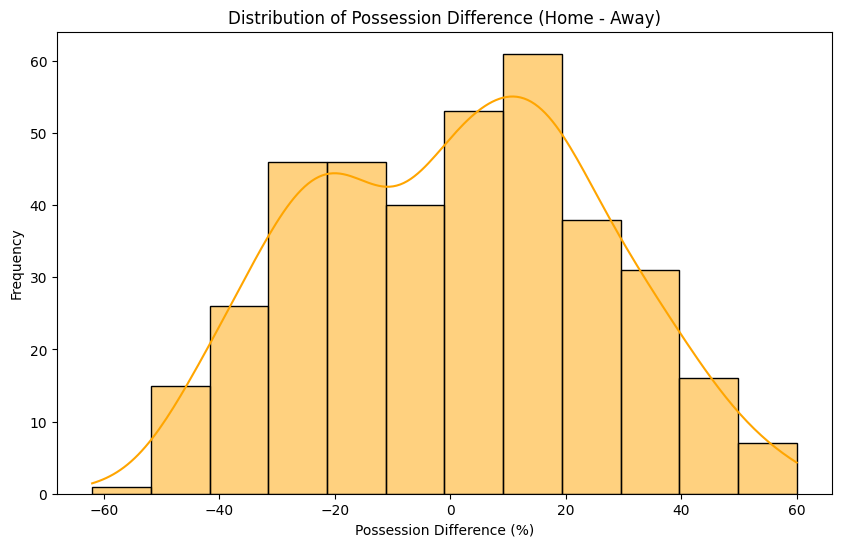

In [85]:
# Calculate possession difference
unique_matches_df['Possession_Difference'] = unique_matches_df['Home_Possession'] - unique_matches_df['Away_Possession']

# Distribution of possession difference
plt.figure(figsize=(10, 6))
sns.histplot(unique_matches_df['Possession_Difference'], kde=True, color='orange')
plt.title('Distribution of Possession Difference (Home - Away)')
plt.xlabel('Possession Difference (%)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-86-101c2bbd26f9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



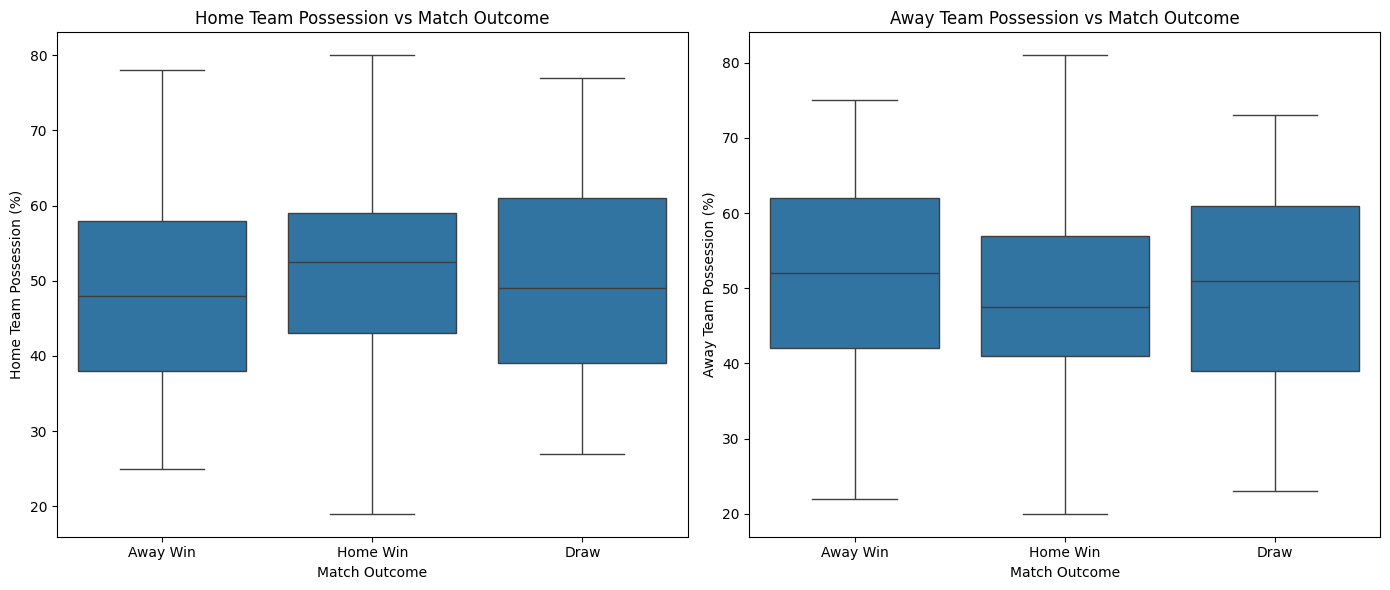

In [86]:
# Mapping Outcome to labels

labels = {0: 'Draw', 1: 'Home Win', 2: 'Away Win'}
unique_matches_df['Outcome_Label'] = unique_matches_df['Outcome'].map(labels)

# Box plot of possession vs outcome
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Outcome_Label', y='Home_Possession', data=unique_matches_df)
plt.title('Home Team Possession vs Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Home Team Possession (%)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Outcome_Label', y='Away_Possession', data=unique_matches_df)
plt.title('Away Team Possession vs Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Away Team Possession (%)')

plt.tight_layout()
plt.show()


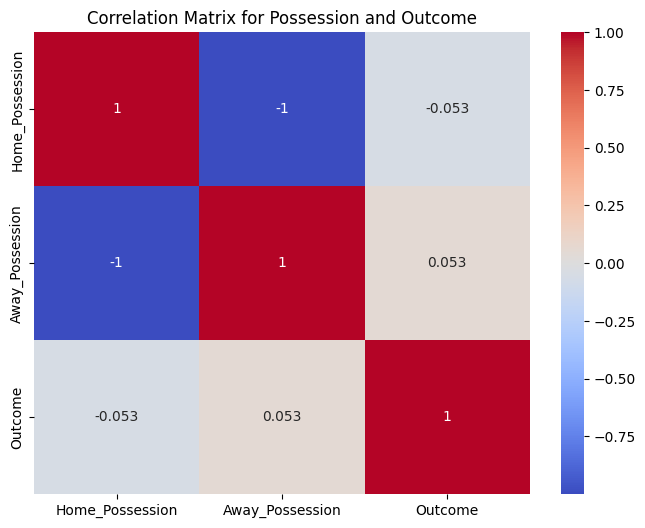

In [87]:
# Correlation matrix
possession_columns = ['Home_Possession', 'Away_Possession', 'Outcome']
correlation_matrix = unique_matches_df[possession_columns].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Possession and Outcome')
plt.show()


In [88]:
unique_matches_df['Match_Date'] = pd.to_datetime(unique_matches_df['Match_Date'])

<ipython-input-88-c078edc504d5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
# # Line plot over time
# plt.figure(figsize=(14, 6))
# unique_matches_df.set_index('Match_Date')[['Home_Possession', 'Away_Possession']].plot()
# plt.title('Home and Away Team Possession Over Time')
# plt.xlabel('Date')
# plt.ylabel('Possession Percentage')
# plt.legend(['Home Team Possession', 'Away Team Possession'])
# plt.show()


In [90]:
# merged2 = merged_df
# # Assuming merged_df is your DataFrame

# # Save DataFrame to CSV
# merged2.to_csv('merged2.csv', index=False)

# # Download CSV file to local machine
# from google.colab import files
# files.download('merged2.csv')


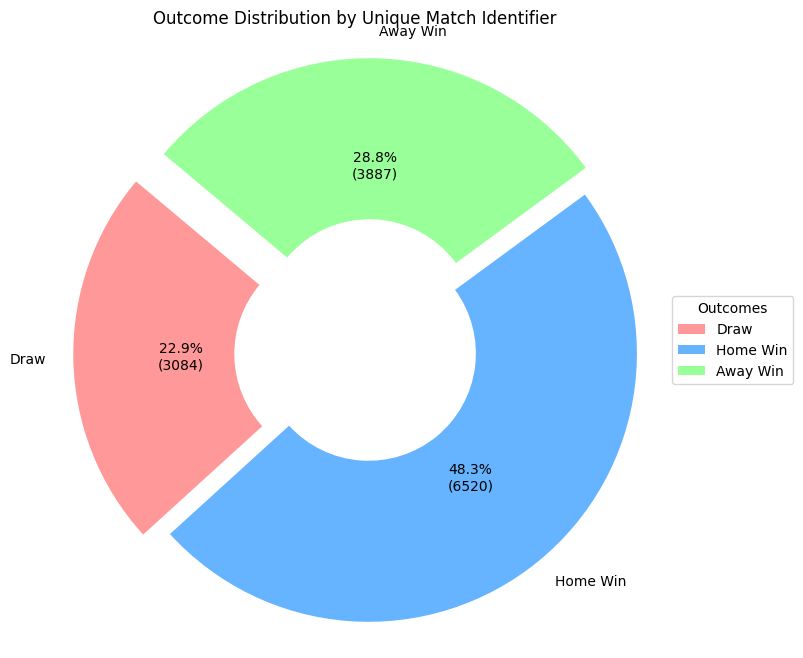

In [91]:
# Aggregate data by unique match_identifier and Outcome

outcome_counts = merged_df.groupby('match_identifier')['Outcome'].value_counts().unstack(fill_value=0)

# Define the order of labels and colors
labels = ['Draw', 'Home Win', 'Away Win']
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Calculate total counts per match_identifier
total_counts = outcome_counts.sum(axis=1)

# Function to format autopct for the pie chart
def autopct_format(pct):
    absolute = int(round(pct/100. * total_counts.sum()))
    return '{:.1f}%\n({:d})'.format(pct, absolute)

# Create the pie chart with a small inner circle
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0.1)  # Explode the first slice (Draw) by 0.1
wedges, texts, autotexts = plt.pie(outcome_counts.sum(), labels=labels, autopct=autopct_format,
                                   startangle=140, colors=colors, wedgeprops={'width': 0.6}, explode=explode)

# Add a small circle in the middle to reduce the inner space
centre_circle = plt.Circle((0,0),0.2,fc='white')  # Adjust radius here to change inner circle width
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add equal aspect ratio
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Add title
plt.title('Outcome Distribution by Unique Match Identifier')

# Add legend with corresponding labels and colors
plt.legend(wedges, labels, title='Outcomes', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))


# Make the pie chart slicable (explode a slice when clicked)
def on_click(event):
    if event.inaxes == plt.gca():
        for wedge, text in zip(wedges, texts):
            if wedge.contains(event)[0]:
                wedge.set_explode((0.1, 0, 0))  # Explode the clicked slice
                plt.draw()

plt.gcf().canvas.mpl_connect('button_press_event', on_click)

# Show plot
plt.show()


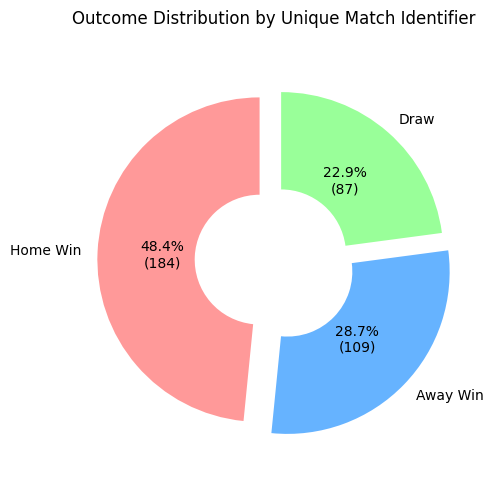

In [92]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by match_identifier and select the first row for each match
unique_matches1 = merged_df.groupby('match_identifier').first().reset_index()

# Map the Outcome values to descriptive labels
labels = {0: 'Draw', 1: 'Home Win', 2: 'Away Win'}
unique_matches1['Outcome_Label'] = unique_matches1['Outcome'].map(labels)

# Calculate outcome counts for each match
outcome_counts = unique_matches1['Outcome_Label'].value_counts()

# Define colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Function to format autopct for the pie chart
def autopct_format(pct):
    absolute = int(round(pct/100. * outcome_counts.sum()))
    return '{:.1f}%\n({:d})'.format(pct, absolute)

# Create the pie chart
plt.figure(figsize=(5, 6))
explode = (0.1, 0.1, 0.05)  # Explode the first slice (Draw) by 0.1
wedges, texts, autotexts = plt.pie(outcome_counts, labels=outcome_counts.index, autopct=autopct_format,
                                   startangle=90, colors=colors, wedgeprops=dict(width=0.6), explode=explode)

# Add a very small circle in the middle to reduce the inner space
centre_circle = plt.Circle((0,0),0.002,fc='white')  # Adjust radius here to change inner circle width
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add equal aspect ratio
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Add title
plt.title('Outcome Distribution by Unique Match Identifier')


# Make the pie chart slicable (explode a slice when clicked)
def on_click(event):
    if event.inaxes == plt.gca():
        for wedge, text in zip(wedges, texts):
            if wedge.contains(event)[0]:
                wedge.set_explode((0.1, 0, 0))  # Explode the clicked slice
                plt.draw()

plt.gcf().canvas.mpl_connect('button_press_event', on_click)

# Show plot
plt.show()


In [93]:
unique_matches1['Outcome_Label'].value_counts()

Outcome_Label
Home Win    184
Away Win    109
Draw         87
Name: count, dtype: int64

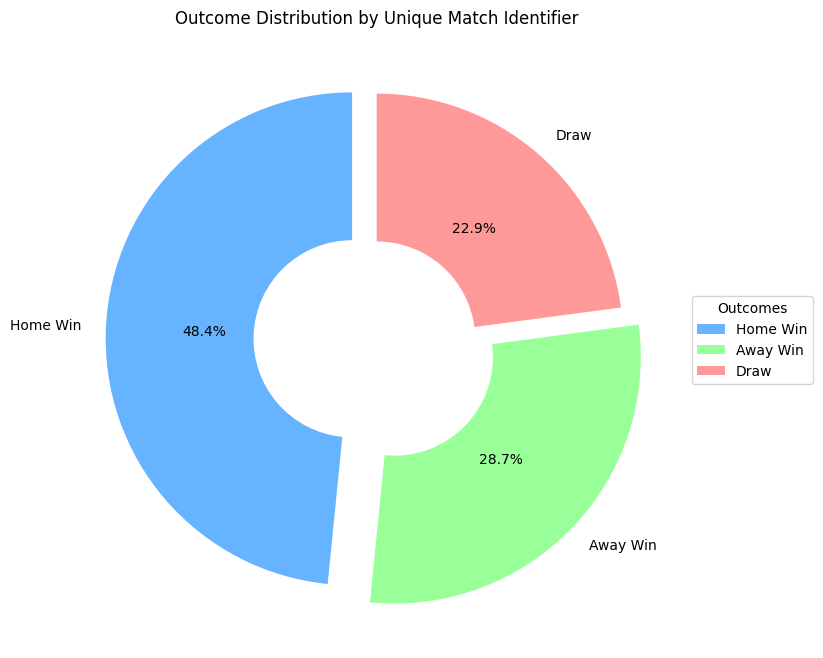

In [94]:
import pandas as pd
import matplotlib.pyplot as plt


# merged_df = pd.read_csv('path_to_your_data.csv') # Uncomment and set the path to your data file if necessary

# Group by match_identifier and select the first row for each match
unique_matches1 = merged_df.groupby('match_identifier').first().reset_index()

# Map the Outcome values to descriptive labels
labels = {0: 'Draw', 1: 'Home Win', 2: 'Away Win'}
unique_matches1['Outcome_Label'] = unique_matches1['Outcome'].map(labels)

# Calculate outcome counts for each match
outcome_counts = unique_matches1['Outcome_Label'].value_counts()

# Define colors for the pie chart
colors = {'Draw': '#ff9999', 'Home Win': '#66b3ff', 'Away Win': '#99ff99'}

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%',
                                   startangle=90, colors=[colors[label] for label in outcome_counts.index], wedgeprops={'width': 0.6}, explode=(0.1, 0.1, 0))

# Add a small circle in the middle to reduce the inner space
centre_circle = plt.Circle((0,0),0.2,fc='white')  # Adjust radius here to change inner circle width
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Outcome Distribution by Unique Match Identifier')

# Add legend with corresponding labels and colors
plt.legend(wedges, outcome_counts.index, title='Outcomes', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Make the pie chart slicable (explode a slice when clicked)
def on_click(event):
    if event.inaxes == plt.gca():
        for wedge, text in zip(wedges, texts):
            if wedge.contains(event)[0]:
                wedge.set_explode((0.1, 0, 0))  # Explode the clicked slice
                plt.draw()

plt.gcf().canvas.mpl_connect('button_press_event', on_click)

# Show plot
plt.show()


In [95]:
""
cat =['match_identifier', 'Date','Player_ID','Role_ID','Min', 'Venue_ID','Squad_ID', 'Opponent_ID', 'Home_Team_ID', 'Away_Team_ID']


per90 = ['PrgP_Passes_per_90', 'PrgC_Carries_per_90', 'PrgDist_Total_per_90', 'Cmp_Long_per_90','Final_Third_per_90',
         'TB_Pass_Types_per_90', 'TI_Pass_Types_per_90', 'Att_Take_Ons_per_90', 'Succ_Take_Ons_per_90','KP_per_90',
         'PPA_per_90', 'CrsPA_per_90', 'Att 3rd_Tackles_per_90', 'SoT_Performance_per_90', 'PKwon_Performance_per_90',
         'Cmp_Passes_per_90', 'Cmp_Short_per_90', 'Cmp_Medium_per_90', 'Carries_Carries_per_90','Touches_Performance_per_90',
         'Cmp_Total_per_90', 'Tkl+Int_per_90', 'TklW_Tackles_per_90', 'Def 3rd_Tackles_per_90', 'Mid 3rd_Tackles_per_90',
         'PKcon_Performance_per_90','Recov_Performance_per_90', 'Won_Aerial_Duels_per_90', 'Lost_Aerial_Duels_per_90',
         'Clr_per_90', 'Err_per_90', 'Blocks_Blocks_per_90', 'xG_Expected_per_90', 'npxG_Expected_per_90','xAG_Expected_per_90',
         'SCA_SCA_per_90','GCA_SCA_per_90', 'Ast_per_90', 'xA_per_90','xAG_per_90','Cmp_percent_Long', 'Gls_Performance_per_90',
         'Crs_Performance_per_90', 'attacking_score','possession_score','defensive_score','Home_Possession', 'Away_Possession','Outcome',]


rolling = ['PrgP_Passes_per_90_rolling_avg', 'PrgC_Carries_per_90_rolling_avg', 'PrgDist_Total_per_90_rolling_avg','Cmp_Long_per_90_rolling_avg',
           'Final_Third_per_90_rolling_avg', 'TB_Pass_Types_per_90_rolling_avg','TI_Pass_Types_per_90_rolling_avg','Att_Take_Ons_per_90_rolling_avg',
           'Succ_Take_Ons_per_90_rolling_avg','KP_per_90_rolling_avg','PPA_per_90_rolling_avg','CrsPA_per_90_rolling_avg',
           'Att 3rd_Tackles_per_90_rolling_avg','SoT_Performance_per_90_rolling_avg','PKwon_Performance_per_90_rolling_avg',
           'Cmp_Passes_per_90_rolling_avg', 'Cmp_Short_per_90_rolling_avg','Cmp_Medium_per_90_rolling_avg', 'Carries_Carries_per_90_rolling_avg',
           'Touches_Performance_per_90_rolling_avg','Cmp_Total_per_90_rolling_avg', 'Tkl+Int_per_90_rolling_avg', 'TklW_Tackles_per_90_rolling_avg',
           'Def 3rd_Tackles_per_90_rolling_avg','Mid 3rd_Tackles_per_90_rolling_avg','PKcon_Performance_per_90_rolling_avg',
           'Recov_Performance_per_90_rolling_avg','Won_Aerial_Duels_per_90_rolling_avg','Lost_Aerial_Duels_per_90_rolling_avg',
           'Clr_per_90_rolling_avg','Err_per_90_rolling_avg','Blocks_Blocks_per_90_rolling_avg','xG_Expected_per_90_rolling_avg',
           'npxG_Expected_per_90_rolling_avg', 'xAG_Expected_per_90_rolling_avg', 'SCA_SCA_per_90_rolling_avg','GCA_SCA_per_90_rolling_avg',
           'Ast_per_90_rolling_avg', 'xA_per_90_rolling_avg', 'xAG_per_90_rolling_avg', 'Cmp_percent_Long_rolling_avg',
           'Gls_Performance_per_90_rolling_avg', 'Crs_Performance_per_90_rolling_avg','attacking_score_rolling_avg',
           'possession_score_rolling_avg','defensive_score_rolling_avg', 'Home_Possession', 'Away_Possession','Outcome',]

# rolling1 = merged_df[cat + rolling]

In [96]:
per901 = merged_df[cat + per90]
rolling1 = merged_df[cat + rolling]

In [97]:
per901

match_identifier       Date  Player_ID  \
0              2022-08-05_arsenal_crystal palace 2022-08-05         70   
1              2022-08-05_arsenal_crystal palace 2022-08-05         74   
2              2022-08-05_arsenal_crystal palace 2022-08-05        127   
3              2022-08-05_arsenal_crystal palace 2022-08-05        209   
4              2022-08-05_arsenal_crystal palace 2022-08-05        211   
...                                          ...        ...        ...   
13486  2023-05-28_crystal palace_nott'ham forest 2023-05-28        466   
13487           2023-05-28_fulham_manchester utd 2023-05-28        472   
13488  2023-05-28_crystal palace_nott'ham forest 2023-05-28        473   
13489          2023-05-28_leeds united_tottenham 2023-05-28        479   
13490         2023-05-28_leicester city_west ham 2023-05-28        481   

       Role_ID   Min  Venue_ID  Squad_ID  Opponent_ID  Home_Team_ID  \
0            3  74.0         1         6            0             6   
1            0   0.0         1         6            0             6   
2            3  85.0         1         6            0             6   
3            3   0.0         1         6            0             6   
4            1  33.0         1         6            0             6   
...        ...   ...       ...       ...          ...           ...   
13486        2  90.0         0        15            6             6   
13487        1  90.0         0         8           13            13   
13488        0  71.0         0        15            6             6   
13489        3  76.0         0        17            9             9   
13490        2  90.0         0        18           10            10   

       Away_Team_ID  PrgP_Passes_per_90  PrgC_Carries_per_90  \
0                 0            7.297297             2.432432   
1                 0            0.000000             0.000000   
2                 0            0.000000             1.058824   
3                 0            0.000000             0.000000   
4                 0            0.000000             2.727273   
...             ...                 ...                  ...   
13486            15            0.000000             0.000000   
13487             8            3.000000             1.000000   
13488            15            1.267606             0.000000   
13489            17            1.184211             0.000000   
13490            18            0.000000             0.000000   

       PrgDist_Total_per_90  Cmp_Long_per_90  Final_Third_per_90  \
0                200.675676         3.648649            3.648649   
1                  0.000000         0.000000            0.000000   
2                126.000000         3.176471            2.117647   
3                  0.000000         0.000000            0.000000   
4                  0.000000         0.000000            0.000000   
...                     ...              ...                 ...   
13486            528.000000         7.000000            1.000000   
13487            127.000000         3.000000            0.000000   
13488             82.394366         2.535211            0.000000   
13489            168.157895         4.736842            2.368421   
13490            327.000000         4.000000            0.000000   

       TB_Pass_Types_per_90  TI_Pass_Types_per_90  Att_Take_Ons_per_90  \
0                       0.0                   0.0             0.000000   
1                       0.0                   0.0             0.000000   
2                       0.0                   0.0             4.235294   
3                       0.0                   0.0             0.000000   
4                       0.0                   0.0             0.000000   
...                     ...                   ...                  ...   
13486                   0.0                   0.0             0.000000   
13487                   1.0                   0.0             2.000000   
13488                   0.0           

In [98]:
rolling1

match_identifier       Date  Player_ID  \
0              2022-08-05_arsenal_crystal palace 2022-08-05         70   
1              2022-08-05_arsenal_crystal palace 2022-08-05         74   
2              2022-08-05_arsenal_crystal palace 2022-08-05        127   
3              2022-08-05_arsenal_crystal palace 2022-08-05        209   
4              2022-08-05_arsenal_crystal palace 2022-08-05        211   
...                                          ...        ...        ...   
13486  2023-05-28_crystal palace_nott'ham forest 2023-05-28        466   
13487           2023-05-28_fulham_manchester utd 2023-05-28        472   
13488  2023-05-28_crystal palace_nott'ham forest 2023-05-28        473   
13489          2023-05-28_leeds united_tottenham 2023-05-28        479   
13490         2023-05-28_leicester city_west ham 2023-05-28        481   

       Role_ID   Min  Venue_ID  Squad_ID  Opponent_ID  Home_Team_ID  \
0            3  74.0         1         6            0             6   
1            0   0.0         1         6            0             6   
2            3  85.0         1         6            0             6   
3            3   0.0         1         6            0             6   
4            1  33.0         1         6            0             6   
...        ...   ...       ...       ...          ...           ...   
13486        2  90.0         0        15            6             6   
13487        1  90.0         0         8           13            13   
13488        0  71.0         0        15            6             6   
13489        3  76.0         0        17            9             9   
13490        2  90.0         0        18           10            10   

       Away_Team_ID  PrgP_Passes_per_90_rolling_avg  \
0                 0                        7.297297   
1                 0                        0.000000   
2                 0                        0.000000   
3                 0                        0.000000   
4                 0                        0.000000   
...             ...                             ...   
13486            15                        0.000000   
13487             8                        5.116883   
13488            15                        0.422535   
13489            17                        9.728070   
13490            18                        0.000000   

       PrgC_Carries_per_90_rolling_avg  PrgDist_Total_per_90_rolling_avg  \
0                             2.432432                        200.675676   
1                             0.000000                          0.000000   
2                             1.058824                        126.000000   
3                             0.000000                          0.000000   
4                             2.727273                          0.000000   
...                                ...                               ...   
13486                         0.000000                        176.000000   
13487                         2.779221                        161.593074   
13488                         0.000000                         27.464789   
13489                         2.000000                        283.052632   
13490                         0.000000                        441.333333   

       Cmp_Long_per_90_rolling_avg  Final_Third_per_90_rolling_avg  \
0                         3.648649                        3.648649   
1                         0.000000                        0.000000   
2                         3.176471                        2.117647   
3                         0.000000                        0.000000   
4                         0.000000                        0.000000   
...                            ...                             ...   
13486                     2.333333                        0.333333   
13487                     4.558442                        0.779221   
13488                     0.845070                        0.000000   
13489           

# **BASELINE MODELS**

---



In [99]:

def aggregate_team_level(df, features):
    df = df[df['Min'] > 0]

    # Define columns to exclude from aggregation
    exclude_columns = ['Home_Possession', 'Away_Possession', 'Outcome']

    # Filter features to exclude the specified columns
    features_to_aggregate = [feat for feat in features if feat not in exclude_columns]

    # Define the aggregation method for per 90 metrics - using sum
    aggregation_methods = {feat: 'sum' for feat in features_to_aggregate}
    aggregation_methods['Min'] = 'mean'  # average minutes for the whole player for that squad in a match

    # Group by Match Identifier, Squad_ID, Date, and Venue_ID
    team_aggregates = df.groupby(['match_identifier', 'Squad_ID', 'Date', 'Venue_ID']).agg(aggregation_methods).reset_index()

    # Separate data for home and away teams
    home_team_data = team_aggregates[team_aggregates['Venue_ID'] == 1].drop('Venue_ID', axis=1).add_suffix('_home')
    away_team_data = team_aggregates[team_aggregates['Venue_ID'] == 0].drop('Venue_ID', axis=1).add_suffix('_away')

    # Remove suffix from match_identifier and Date to merge correctly
    home_team_data = home_team_data.rename(columns={'match_identifier_home': 'match_identifier', 'Date_home': 'Date'})
    away_team_data = away_team_data.rename(columns={'match_identifier_away': 'match_identifier', 'Date_away': 'Date'})

    # Calculate home possession, away possession, and outcome for each match
    match_info = df.groupby(['match_identifier', 'Date'])[['Home_Possession', 'Away_Possession', 'Outcome']].first().reset_index()

    # Merging on match_identifier and Date
    merged_data = pd.merge(home_team_data, away_team_data, on=['match_identifier', 'Date'])

    # Merge match info with merged data
    merged_data = pd.merge(merged_data, match_info, on=['match_identifier', 'Date'])

    return merged_data




In [100]:
# Apply function to your DataFrame
team_level_data = aggregate_team_level(per901, per90)
print(team_level_data.shape)
team_level_data.head()

(380, 101)


match_identifier  Squad_ID_home       Date  \
0   2022-08-05_arsenal_crystal palace              6 2022-08-05   
1  2022-08-06_aston villa_bournemouth              2 2022-08-06   
2          2022-08-06_chelsea_everton              7 2022-08-06   
3         2022-08-06_fulham_liverpool              8 2022-08-06   
4      2022-08-06_leeds united_wolves              9 2022-08-06   

   PrgP_Passes_per_90_home  PrgC_Carries_per_90_home  \
0                66.289944                 40.435247   
1                15.444076                 10.865725   
2                22.537225                 10.018591   
3                34.041306                 10.056435   
4                44.897851                 34.477943   

   PrgDist_Total_per_90_home  Cmp_Long_per_90_home  Final_Third_per_90_home  \
0                3555.284035             65.883943                34.391296   
1                2425.900679             45.786189                19.594035   
2                2203.374740             51.237133                43.707119   
3                2008.008867             30.668182                26.668182   
4                2518.569178             32.680288                44.994568   

   TB_Pass_Types_per_90_home  TI_Pass_Types_per_90_home  \
0                   2.058824                  25.000000   
1                   1.058824                  14.000000   
2                   2.000000                  35.375734   
3                   1.000000                  22.000000   
4                   0.000000                  16.084337   

   Att_Take_Ons_per_90_home  Succ_Take_Ons_per_90_home  KP_per_90_home  \
0                 81.628483                  33.814241        9.727273   
1                 37.830725                  10.364177        5.176471   
2                 29.018591                  11.732877        6.500000   
3                 17.003194                   5.395851        6.418579   
4                 14.418675                   7.334337        9.250000   

   PPA_per_90_home  CrsPA_per_90_home  Att 3rd_Tackles_per_90_home  \
0        10.683824           2.000000                     4.000000   
1         4.058824           1.000000                     1.267606   
2         7.500000           2.500000                     2.500000   
3         5.022472           2.011236                    51.022472   
4        12.007414           1.000000                     5.084337   

   SoT_Performance_per_90_home  PKwon_Performance_per_90_home  \
0                     2.637771                            0.0   
1                     3.011236                            0.0   
2                     3.000000                            0.0   
3                     2.011236                            1.0   
4                     4.824925                            0.0   

   Cmp_Passes_per_90_home  Cmp_Short_per_90_home  Cmp_Medium_per_90_home  \
0              694.496002             335.157116              270.183553   
1              275.895320             126.858008               99.192299   
2              370.930491             147.002978              152.100317   
3              213.007889             110.546020               57.628605   
4              375.029653             186.781825              138.871814   

   Carries_Carries_per_90_home  Touches_Performance_per_90_home  \
0                   745.788603                      1023.443866   
1                   293.808184                       681.327381   
2                   367.539059                       668.762834   
3                   300.790226                       686.102793   
4                   386.686697                       670.416900   

   Cmp_Total_per_90_home  Tkl+Int_per_90_home  TklW_Tackles_per_90_home  \
0             694.496002            26.785374                  9.392687   
1             275.895320            41.614166                 12.337665   
2             370.930491            43.120034                 27.045585   
3             213.007889          

In [101]:
# Apply function to your DataFrame (for rolling1)
team_level_data_rolling = aggregate_team_level(rolling1, rolling)
print(team_level_data_rolling.shape)
team_level_data_rolling.head()

(380, 101)


match_identifier  Squad_ID_home       Date  \
0   2022-08-05_arsenal_crystal palace              6 2022-08-05   
1  2022-08-06_aston villa_bournemouth              2 2022-08-06   
2          2022-08-06_chelsea_everton              7 2022-08-06   
3         2022-08-06_fulham_liverpool              8 2022-08-06   
4      2022-08-06_leeds united_wolves              9 2022-08-06   

   PrgP_Passes_per_90_rolling_avg_home  PrgC_Carries_per_90_rolling_avg_home  \
0                            66.289944                             40.435247   
1                            15.444076                             10.865725   
2                            22.537225                             10.018591   
3                            34.041306                             10.056435   
4                            44.897851                             34.477943   

   PrgDist_Total_per_90_rolling_avg_home  Cmp_Long_per_90_rolling_avg_home  \
0                            3555.284035                         65.883943   
1                            2425.900679                         45.786189   
2                            2203.374740                         51.237133   
3                            2008.008867                         30.668182   
4                            2518.569178                         32.680288   

   Final_Third_per_90_rolling_avg_home  TB_Pass_Types_per_90_rolling_avg_home  \
0                            34.391296                               2.058824   
1                            19.594035                               1.058824   
2                            43.707119                               2.000000   
3                            26.668182                               1.000000   
4                            44.994568                               0.000000   

   TI_Pass_Types_per_90_rolling_avg_home  \
0                              25.000000   
1                              14.000000   
2                              35.375734   
3                              22.000000   
4                              16.084337   

   Att_Take_Ons_per_90_rolling_avg_home  \
0                             81.628483   
1                             37.830725   
2                             29.018591   
3                             17.003194   
4                             14.418675   

   Succ_Take_Ons_per_90_rolling_avg_home  KP_per_90_rolling_avg_home  \
0                              33.814241                    9.727273   
1                              10.364177                    5.176471   
2                              11.732877                    6.500000   
3                               5.395851                    6.418579   
4                               7.334337                    9.250000   

   PPA_per_90_rolling_avg_home  CrsPA_per_90_rolling_avg_home  \
0                    10.683824                       2.000000   
1                     4.058824                       1.000000   
2                     7.500000                       2.500000   
3                     5.022472                       2.011236   
4                    12.007414                       1.000000   

   Att 3rd_Tackles_per_90_rolling_avg_home  \
0                                 4.000000   
1                                 1.267606   
2                                 2.500000   
3                                51.022472   
4                                 5.084337   

   SoT_Performance_per_90_rolling_avg_home  \
0                                 2.637771   
1                                 3.011236   
2                                 3.000000   
3                                 2.011236   
4                                 4.824925   

   PKwon_Performance_per_90_rolling_avg_home  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        1.0   
4                                      

In [102]:
print(list(team_level_data.columns))

['match_identifier', 'Squad_ID_home', 'Date', 'PrgP_Passes_per_90_home', 'PrgC_Carries_per_90_home', 'PrgDist_Total_per_90_home', 'Cmp_Long_per_90_home', 'Final_Third_per_90_home', 'TB_Pass_Types_per_90_home', 'TI_Pass_Types_per_90_home', 'Att_Take_Ons_per_90_home', 'Succ_Take_Ons_per_90_home', 'KP_per_90_home', 'PPA_per_90_home', 'CrsPA_per_90_home', 'Att 3rd_Tackles_per_90_home', 'SoT_Performance_per_90_home', 'PKwon_Performance_per_90_home', 'Cmp_Passes_per_90_home', 'Cmp_Short_per_90_home', 'Cmp_Medium_per_90_home', 'Carries_Carries_per_90_home', 'Touches_Performance_per_90_home', 'Cmp_Total_per_90_home', 'Tkl+Int_per_90_home', 'TklW_Tackles_per_90_home', 'Def 3rd_Tackles_per_90_home', 'Mid 3rd_Tackles_per_90_home', 'PKcon_Performance_per_90_home', 'Recov_Performance_per_90_home', 'Won_Aerial_Duels_per_90_home', 'Lost_Aerial_Duels_per_90_home', 'Clr_per_90_home', 'Err_per_90_home', 'Blocks_Blocks_per_90_home', 'xG_Expected_per_90_home', 'npxG_Expected_per_90_home', 'xAG_Expected_pe

In [103]:
import pandas as pd

# Check the columns in team_level_data
print(team_level_data.columns)

# Prepare home and away data with respective points
home_data = team_level_data[['match_identifier', 'Date', 'Squad_ID_home', 'Outcome']].copy()
home_data.rename(columns={'Squad_ID_home': 'Squad'}, inplace=True)
home_data['Points'] = home_data['Outcome'].apply(lambda x: 3 if x == 1 else (1 if x == 0 else 0))

away_data = team_level_data[['match_identifier', 'Date', 'Squad_ID_away', 'Outcome']].copy()
away_data.rename(columns={'Squad_ID_away': 'Squad'}, inplace=True)
away_data['Points'] = away_data['Outcome'].apply(lambda x: 3 if x == 2 else (1 if x == 0 else 0))

# Combine home and away data into a single DataFrame and sort
combined_data = pd.concat([home_data, away_data], ignore_index=True)
combined_data.sort_values(['Squad', 'Date'], inplace=True)  # Sort by Squad and Date for sequential processing

# Calculate cumulative points and the count of games
combined_data['Cumulative_Points'] = combined_data.groupby('Squad')['Points'].cumsum() - combined_data['Points']
combined_data['Games_Played'] = combined_data.groupby('Squad').cumcount()
combined_data['PPG'] = combined_data.apply(lambda x: x['Cumulative_Points'] / x['Games_Played'] if x['Games_Played'] > 0 else 0, axis=1)

# Prepare PPG data for merge
home_ppg = combined_data[['match_identifier', 'Date', 'Squad', 'PPG']].rename(columns={'PPG': 'PPG_Home', 'Squad': 'Squad_ID_home'})
away_ppg = combined_data[['match_identifier', 'Date', 'Squad', 'PPG']].rename(columns={'PPG': 'PPG_Away', 'Squad': 'Squad_ID_away'})

# Ensure 'Squad' is not set as index
home_ppg.reset_index(drop=True, inplace=True)
away_ppg.reset_index(drop=True, inplace=True)

# Merge PPG calculations back to the team_level_data for both home and away teams
team_level_data = pd.merge(team_level_data, home_ppg,
                           left_on=['match_identifier', 'Squad_ID_home', 'Date'],
                           right_on=['match_identifier', 'Squad_ID_home', 'Date'],
                           how='left')

team_level_data = pd.merge(team_level_data, away_ppg,
                           left_on=['match_identifier', 'Squad_ID_away', 'Date'],
                           right_on=['match_identifier', 'Squad_ID_away', 'Date'],
                           how='left')

# Now, your team_level_data DataFrame includes the correctly calculated PPG values for both home and away teams per match
print(team_level_data[['Squad_ID_home', 'PPG_Home', 'Squad_ID_away', 'PPG_Away']].tail(10))


Index(['match_identifier', 'Squad_ID_home', 'Date', 'PrgP_Passes_per_90_home',
       'PrgC_Carries_per_90_home', 'PrgDist_Total_per_90_home',
       'Cmp_Long_per_90_home', 'Final_Third_per_90_home',
       'TB_Pass_Types_per_90_home', 'TI_Pass_Types_per_90_home',
       ...
       'Cmp_percent_Long_away', 'Gls_Performance_per_90_away',
       'Crs_Performance_per_90_away', 'attacking_score_away',
       'possession_score_away', 'defensive_score_away', 'Min_away',
       'Home_Possession', 'Away_Possession', 'Outcome'],
      dtype='object', length=101)
     Squad_ID_home  PPG_Home  Squad_ID_away  PPG_Away
370              0  2.189189             19  1.108108
371              1  1.567568              4  1.675676
372              7  0.891892              2  1.054054
373              3  1.513514             12  2.405405
374              5  1.162162             14  1.891892
375              6  1.189189             15  1.000000
376             13  1.945946              8  1.405405
377    

In [104]:
team_level_data

match_identifier  Squad_ID_home       Date  \
0            2022-08-05_arsenal_crystal palace              6 2022-08-05   
1           2022-08-06_aston villa_bournemouth              2 2022-08-06   
2                   2022-08-06_chelsea_everton              7 2022-08-06   
3                  2022-08-06_fulham_liverpool              8 2022-08-06   
4               2022-08-06_leeds united_wolves              9 2022-08-06   
..                                         ...            ...        ...   
375  2023-05-28_crystal palace_nott'ham forest              6 2023-05-28   
376           2023-05-28_fulham_manchester utd             13 2023-05-28   
377          2023-05-28_leeds united_tottenham              9 2023-05-28   
378         2023-05-28_leicester city_west ham             10 2023-05-28   
379           2023-05-28_liverpool_southampton             16 2023-05-28   

     PrgP_Passes_per_90_home  PrgC_Carries_per_90_home  \
0                  66.289944                 40.435247   
1                  15.444076                 10.865725   
2                  22.537225                 10.018591   
3                  34.041306                 10.056435   
4                  44.897851                 34.477943   
..                       ...                       ...   
375                51.406842                 32.869738   
376                82.430302                 32.095376   
377                49.571746                 48.765295   
378                35.421010                 23.939850   
379                 9.991091                 19.058897   

     PrgDist_Total_per_90_home  Cmp_Long_per_90_home  Final_Third_per_90_home  \
0                  3555.284035             65.883943                34.391296   
1                  2425.900679             45.786189                19.594035   
2                  2203.374740             51.237133                43.707119   
3                  2008.008867             30.668182                26.668182   
4                  2518.569178             32.680288                44.994568   
..                         ...                   ...                      ...   
375                2940.596695             41.171935                58.074795   
376                3306.889403             25.430230                49.385847   
377                2785.835651             31.978865                34.882091   
378                2497.833911             31.541353                40.872054   
379                1394.730112             19.632072                10.806880   

     TB_Pass_Types_per_90_home  TI_Pass_Types_per_90_home  \
0                     2.058824                  25.000000   
1                     1.058824                  14.000000   
2                     2.000000                  35.375734   
3                     1.000000                  22.000000   
4                     0.000000                  16.084337   
..                         ...                        ...   
375                   5.354520                  21.011236   
376                   2.748252                   8.000000   
377                   0.000000                  20.199110   
378                   0.000000                  15.078652   
379                   1.184211                   8.000000   

     Att_Take_Ons_per_90_home  Succ_Take_Ons_per_90_home  KP_per_90_home  \
0                   81.628483                  33.814241        9.727273   
1                   37.830725                  10.364177        5.176471   
2                   29.018591                  11.732877        6.500000   
3                   17.003194                   5.395851        6.418579   
4                   14.418675                   7.334337        9.250000   
..                        ...                        ...             ...   
375                 20.169816                   7.033708       13.442288   
376                 44.996820                  32.646748       23.756374   
377                 11.006674 

In [105]:
# Prepare data to find the last match for each team at home and away
last_home_ppg = team_level_data.groupby('Squad_ID_home').last()['PPG_Home'].reset_index()
last_away_ppg = team_level_data.groupby('Squad_ID_away').last()['PPG_Away'].reset_index()

# Rename columns for merging
last_home_ppg.rename(columns={'Squad_ID_home': 'Squad', 'PPG_Home': 'Last_PPG'}, inplace=True)
last_away_ppg.rename(columns={'Squad_ID_away': 'Squad', 'PPG_Away': 'Last_PPG'}, inplace=True)

# Combine the home and away PPG data
combined_last_ppg = pd.concat([last_home_ppg, last_away_ppg])

# In case a team's last home and away matches are different, we take the maximum of the last PPG recorded
final_ppg = combined_last_ppg.groupby('Squad').agg({'Last_PPG': 'max'}).reset_index()

# Rank the teams based on the PPG
ranked_teams = final_ppg.sort_values(by='Last_PPG', ascending=False).reset_index(drop=True)

# Display the ranked teams
print(ranked_teams)

    Squad  Last_PPG
0      12  2.428571
1       0  2.250000
2      13  1.945946
3      14  1.916667
4      11  1.805556
5       4  1.694444
6      17  1.583333
7       1  1.583333
8       3  1.513514
9       8  1.416667
10      5  1.194444
11      6  1.194444
12     19  1.111111
13      2  1.083333
14     18  1.081081
15     15  1.000000
16      7  0.891892
17      9  0.861111
18     10  0.837838
19     16  0.666667


In [106]:
# Prepare data to find the last match for each team at home and away
last_home_ppg = team_level_data.groupby('Squad_ID_home').last()['PPG_Home'].reset_index()
last_away_ppg = team_level_data.groupby('Squad_ID_away').last()['PPG_Away'].reset_index()

# Rename columns for merging
last_home_ppg.rename(columns={'Squad_ID_home': 'Squad', 'PPG_Home': 'Last_PPG'}, inplace=True)
last_away_ppg.rename(columns={'Squad_ID_away': 'Squad', 'PPG_Away': 'Last_PPG'}, inplace=True)

# Replace squad IDs with their mapping names using the 'Squad_encoder'
last_home_ppg['Squad'] = label_encoders['Squad_encoder'].inverse_transform(last_home_ppg['Squad'])
last_away_ppg['Squad'] = label_encoders['Squad_encoder'].inverse_transform(last_away_ppg['Squad'])

# Combine the home and away PPG data
combined_last_ppg = pd.concat([last_home_ppg, last_away_ppg])

# In case a team's last home and away matches are different, we take the maximum of the last PPG recorded
final_ppg = combined_last_ppg.groupby('Squad').agg({'Last_PPG': 'max'}).reset_index()

# Rank the teams based on the PPG
ranked_teams = final_ppg.sort_values(by='Last_PPG', ascending=False).reset_index(drop=True)

# Display the ranked teams
print(ranked_teams)


              Squad  Last_PPG
0   manchester city  2.428571
1           arsenal  2.250000
2    manchester utd  1.945946
3     newcastle utd  1.916667
4         liverpool  1.805556
5          brighton  1.694444
6         tottenham  1.583333
7       aston villa  1.583333
8         brentford  1.513514
9            fulham  1.416667
10          chelsea  1.194444
11   crystal palace  1.194444
12           wolves  1.111111
13      bournemouth  1.083333
14         west ham  1.081081
15  nott'ham forest  1.000000
16          everton  0.891892
17     leeds united  0.861111
18   leicester city  0.837838
19      southampton  0.666667


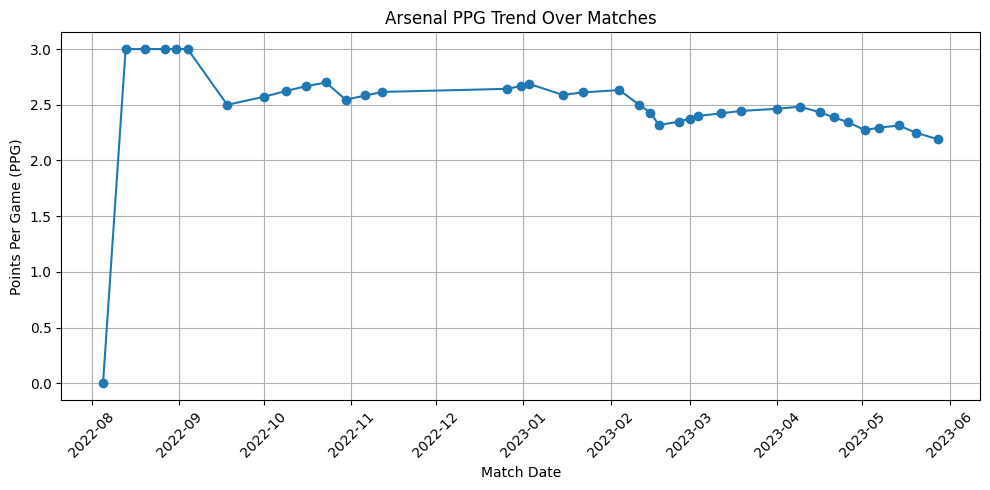

In [107]:

# Filter Arsenal's home and away games
arsenal_home = team_level_data[team_level_data['Squad_ID_home'] == 0]
arsenal_away = team_level_data[team_level_data['Squad_ID_away'] == 0]

# Select relevant columns and rename for uniformity
arsenal_home = arsenal_home[['Date', 'PPG_Home']].rename(columns={'Date': 'Date', 'PPG_Home': 'PPG'})
arsenal_away = arsenal_away[['Date', 'PPG_Away']].rename(columns={'Date': 'Date', 'PPG_Away': 'PPG'})

# Combine home and away data
arsenal_ppg = pd.concat([arsenal_home, arsenal_away])

# Sort by date to maintain chronological order
arsenal_ppg.sort_values('Date', inplace=True)

# Reset index after sorting
arsenal_ppg.reset_index(drop=True, inplace=True)

# Plot the PPG trend
plt.figure(figsize=(10, 5))
plt.plot(arsenal_ppg['Date'], arsenal_ppg['PPG'], marker='o', linestyle='-')
plt.title('Arsenal PPG Trend Over Matches')
plt.xlabel('Match Date')
plt.ylabel('Points Per Game (PPG)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


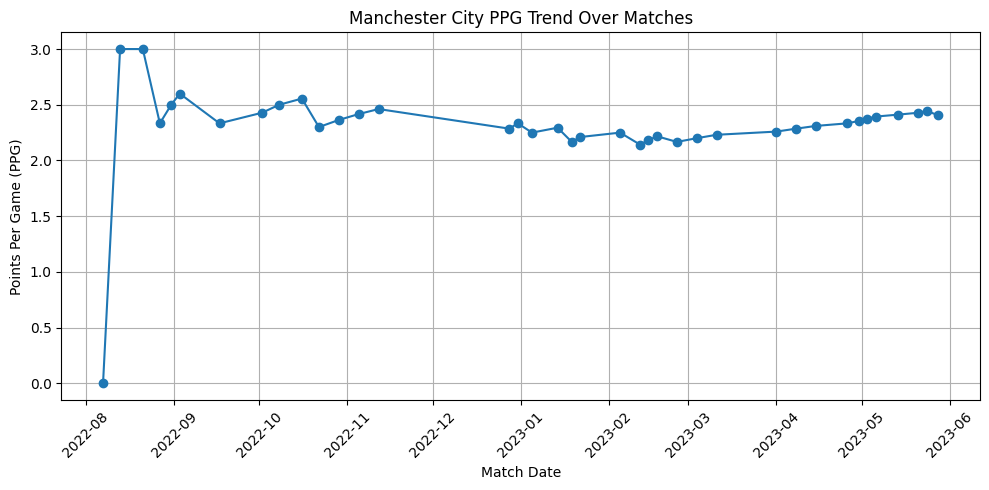

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Reverse label encoder function
def reverse_label_encoder(encoded_value, encoder):
    for key, value in encoder.items():
        if value == encoded_value:
            return key[:-8]  # Remove the '_encoder' suffix

# Filter Manchester City's home and away games
mancity_home = team_level_data[team_level_data['Squad_ID_home'] == 12]
mancity_away = team_level_data[team_level_data['Squad_ID_away'] == 12]

# Select relevant columns and rename for uniformity
mancity_home = mancity_home[['Date', 'PPG_Home']].rename(columns={'Date': 'Date', 'PPG_Home': 'PPG'})
mancity_away = mancity_away[['Date', 'PPG_Away']].rename(columns={'Date': 'Date', 'PPG_Away': 'PPG'})

# Combine home and away data
mancity_ppg = pd.concat([mancity_home, mancity_away])

# Sort by date to maintain chronological order
mancity_ppg.sort_values('Date', inplace=True)

# Reset index after sorting
mancity_ppg.reset_index(drop=True, inplace=True)

# Map encoded IDs to real names using reverse label encoder
mancity_ppg['Squad'] = reverse_label_encoder(12, label_encoders)

# Plot the PPG trend
plt.figure(figsize=(10, 5))
plt.plot(mancity_ppg['Date'], mancity_ppg['PPG'], marker='o', linestyle='-')
plt.title('Manchester City PPG Trend Over Matches')
plt.xlabel('Match Date')
plt.ylabel('Points Per Game (PPG)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


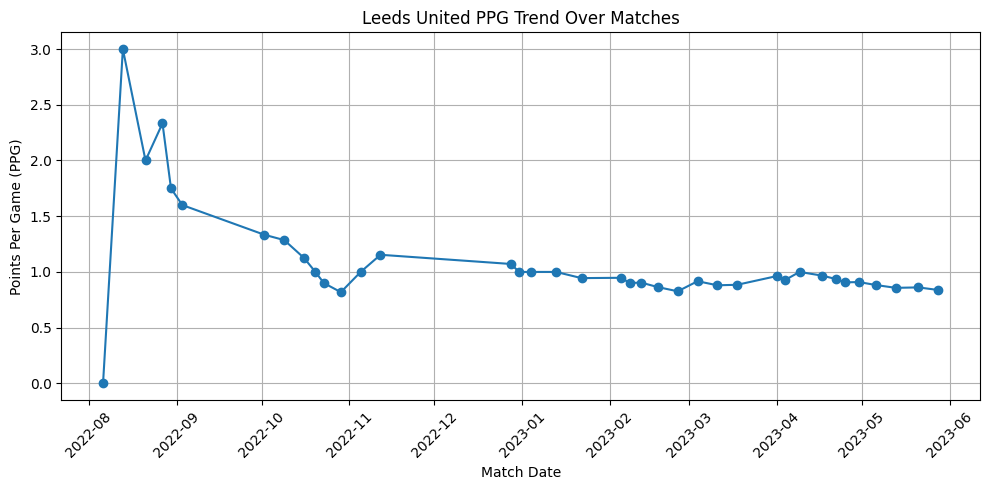

In [109]:
import matplotlib.pyplot as plt
import pandas as pd


# Filter Leeds's home and away games
leeds_home = team_level_data[team_level_data['Squad_ID_home'] == 9]
leeds_away = team_level_data[team_level_data['Squad_ID_away'] == 9]

# Select relevant columns and rename for uniformity
leeds_home = leeds_home[['Date', 'PPG_Home']].rename(columns={'Date': 'Date', 'PPG_Home': 'PPG'})
leeds_away = leeds_away[['Date', 'PPG_Away']].rename(columns={'Date': 'Date', 'PPG_Away': 'PPG'})

# Combine home and away data
leeds_ppg = pd.concat([leeds_home, leeds_away])

# Sort by date to maintain chronological order
leeds_ppg.sort_values('Date', inplace=True)

# Reset index after sorting
leeds_ppg.reset_index(drop=True, inplace=True)

# Map encoded IDs to real names using reverse label encoder
leeds_ppg['Squad'] = reverse_label_encoder(9, label_encoders)

# Plot the PPG trend
plt.figure(figsize=(10, 5))
plt.plot(leeds_ppg['Date'], leeds_ppg['PPG'], marker='o', linestyle='-')
plt.title('Leeds United PPG Trend Over Matches')
plt.xlabel('Match Date')
plt.ylabel('Points Per Game (PPG)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


In [110]:
# splitting dataset

train_df = team_level_data[team_level_data['Date'] < '2023-04-19']
test_df = team_level_data[team_level_data['Date'] >= '2023-04-19']

print(train_df.shape, test_df.shape)

(306, 103) (74, 103)


In [111]:
# match_identifier	Squad_ID_home	Date	PrgP_Passes_per_90_home	PrgC_Carries_per_90_home
# 	PrgDist_Total_per_90_home	Cmp_Long_per_90_home	Final_Third_per_90_home	TB_Pass_Types_per_90_home
#   TI_Pass_Types_per_90_home	Att_Take_Ons_per_90_home	Succ_Take_Ons_per_90_home	KP_per_90_home
#   PPA_per_90_home	CrsPA_per_90_home	Att 3rd_Tackles_per_90_home	SoT_Performance_per_90_home
#   PKwon_Performance_per_90_home	Cmp_Passes_per_90_home	Cmp_Short_per_90_home	Cmp_Medium_per_90_home
#   Carries_Carries_per_90_home	Touches_Performance_per_90_home	Cmp_Total_per_90_home
#   Tkl+Int_per_90_home	TklW_Tackles_per_90_home	Def 3rd_Tackles_per_90_home	Mid 3rd_Tackles_per_90_home
#   PKcon_Performance_per_90_home	Recov_Performance_per_90_home	Won_Aerial_Duels_per_90_home
#   Lost_Aerial_Duels_per_90_home	Clr_per_90_home	Err_per_90_home	Blocks_Blocks_per_90_home
#   xG_Expected_per_90_home	npxG_Expected_per_90_home	xAG_Expected_per_90_home
#   SCA_SCA_per_90_home	GCA_SCA_per_90_home	Ast_per_90_home	xA_per_90_home
#   xAG_per_90_home	Cmp_percent_Long_home	Gls_Performance_per_90_home	Crs_Performance_per_90_home
#   attacking_score_home	possession_score_home	defensive_score_home	Min_home	Squad_ID_away
# 	PrgP_Passes_per_90_away	PrgC_Carries_per_90_away	PrgDist_Total_per_90_away
#   Cmp_Long_per_90_away	Final_Third_per_90_away	TB_Pass_Types_per_90_away
#   TI_Pass_Types_per_90_away	Att_Take_Ons_per_90_away	Succ_Take_Ons_per_90_away
#   KP_per_90_away	PPA_per_90_away	CrsPA_per_90_away	Att 3rd_Tackles_per_90_away
#   	SoT_Performance_per_90_away	PKwon_Performance_per_90_away	Cmp_Passes_per_90_away
#     Cmp_Short_per_90_away	Cmp_Medium_per_90_away	Carries_Carries_per_90_away
#     Touches_Performance_per_90_away	Cmp_Total_per_90_away	Tkl+Int_per_90_away
#     TklW_Tackles_per_90_away	Def 3rd_Tackles_per_90_away	Mid
#     3rd_Tackles_per_90_away	PKcon_Performance_per_90_away
#     	Recov_Performance_per_90_away	Won_Aerial_Duels_per_90_away	Lost_Aerial_Duels_per_90_away	Clr_per_90_away
#       Err_per_90_away	Blocks_Blocks_per_90_away	xG_Expected_per_90_away	npxG_Expected_per_90_away	xAG_Expected_per_90_away
#       SCA_SCA_per_90_away	GCA_SCA_per_90_away	Ast_per_90_away	xA_per_90_away	xAG_per_90_away	Cmp_percent_Long_away
#       Gls_Performance_per_90_away	Crs_Performance_per_90_away	attacking_score_away	possession_score_away	defensive_score_away
#       	Min_away	Home_Possession	Away_Possession	Outcome

In [112]:
drops = ['match_identifier', 'Date', 'Min_home', 'Away_Possession',
         'Min_away',	'Home_Possession',]

# Min_away, Min_home

train_df.drop(drops, axis=1, inplace=True)
test_df.drop(drops, axis=1, inplace=True)

<ipython-input-112-42cd33557e89>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-42cd33557e89>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
# Define features and target for training set
X_train = train_df.drop('Outcome', axis=1)
y_train = train_df['Outcome']


In [114]:
# Define features and target for testing set
X_test = test_df.drop('Outcome', axis=1)
y_test = test_df['Outcome']


### **Extreme gradient boosting**

In [115]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softprob',  # multi-class classification
    'num_class': 3  # number of classes in the target variable
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predictions
preds = bst.predict(dtest)
predictions = np.asarray([np.argmax(line) for line in preds])

# Evaluate predictions
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions) * 100))



Accuracy: 81.08%


In [116]:
# # Predictions
# preds_proba = bst.predict(dtest)
# predictions = np.argmax(preds_proba, axis=1)

# # Print Accuracy
# accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy: {accuracy:.2%}")

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Print Classification Report
target_names = ['Draw', 'Home Win', 'Away Win']
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=target_names))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))



Classification Report:
              precision    recall  f1-score   support

        Draw       0.64      0.44      0.52        16
    Home Win       0.86      0.90      0.88        42
    Away Win       0.79      0.94      0.86        16

    accuracy                           0.81        74
   macro avg       0.76      0.76      0.75        74
weighted avg       0.80      0.81      0.80        74


Confusion Matrix:
[[ 7  6  3]
 [ 3 38  1]
 [ 1  0 15]]


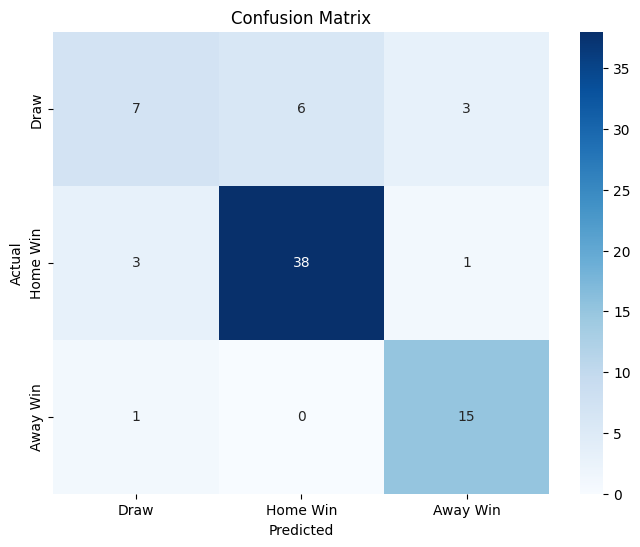

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Define class labels
class_names = ['Draw', 'Home Win', 'Away Win']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


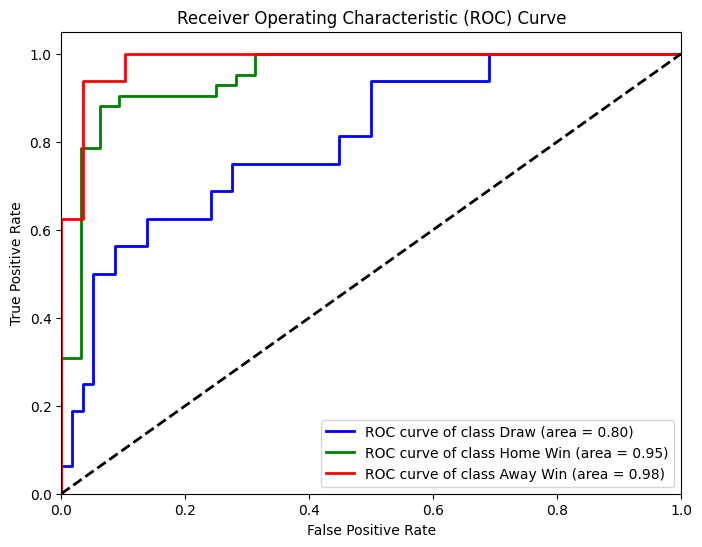

ROC AUC Score (Class Draw): 0.80
ROC AUC Score (Class Home Win): 0.95
ROC AUC Score (Class Away Win): 0.98


In [119]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Convert labels to binary matrix for ROC curve computation
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC scores
for i in range(3):
    print(f"ROC AUC Score (Class {class_names[i]}): {roc_auc[i]:.2f}")


In [120]:
# pip uninstall keras scikeras


In [121]:
# pip install keras==2.15.0 scikeras


#### **USING SMOTE TO FIX CLASS IMBALANCE OF XGBOOST CLASSIFIER**

In [122]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train your XGBoost model on the resampled data
dtrain_resampled = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
bst_resampled = xgb.train(params, dtrain_resampled, num_boost_round=100)

# Evaluate the model on the original test set
dtest = xgb.DMatrix(X_test, label=y_test)
preds = bst_resampled.predict(dtest)
predictions = np.asarray([np.argmax(line) for line in preds])

# Print classification report and other metrics
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.94      0.81      0.87        42
           2       0.71      0.94      0.81        16

    accuracy                           0.80        74
   macro avg       0.75      0.79      0.76        74
weighted avg       0.82      0.80      0.80        74



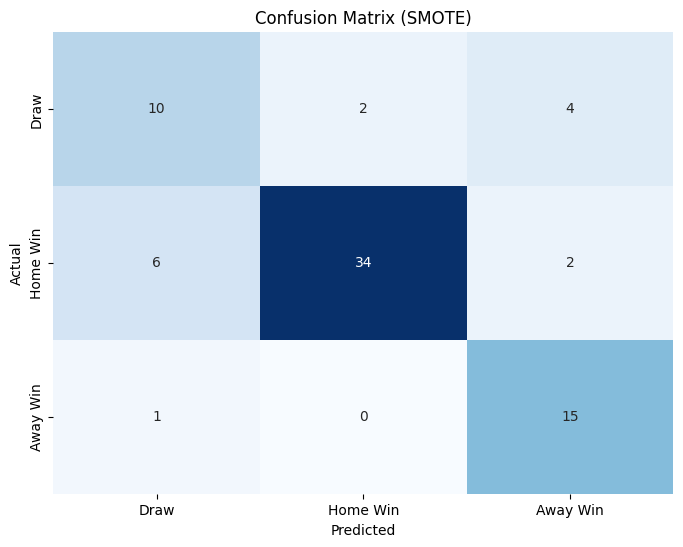

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SMOTE)')
plt.show()


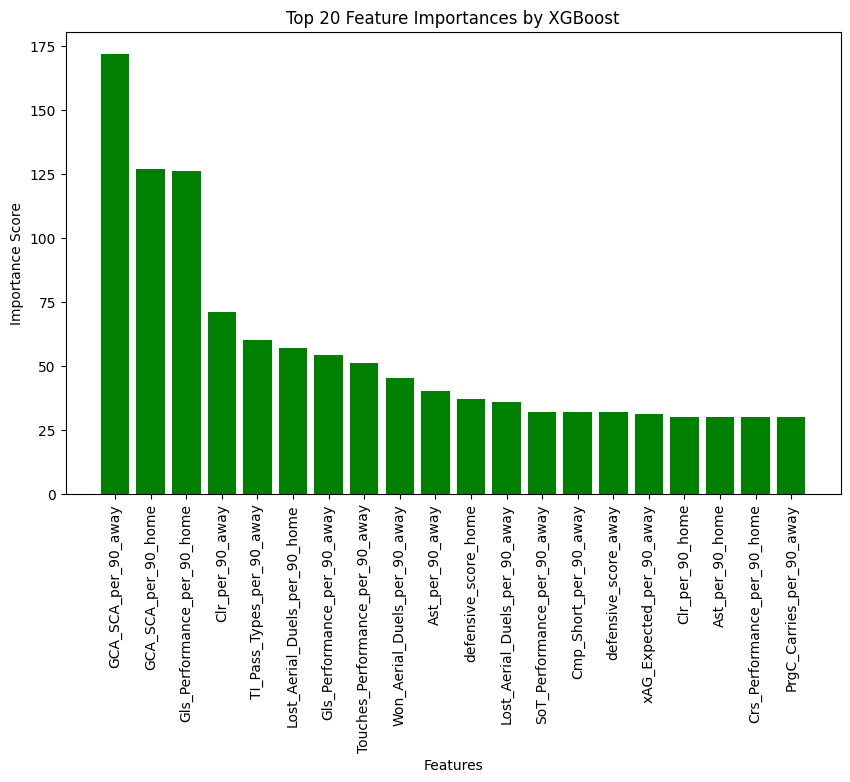

In [124]:
xgb_importances = bst.get_score(importance_type='weight')
sorted_xgb_importances = sorted(xgb_importances.items(), key=lambda x: x[1], reverse=True)[:20]

# Extract feature names and their importance scores
features, importances = zip(*sorted_xgb_importances)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances by XGBoost")
plt.bar(features, importances, color="g")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------

## **RANDOM FOREST**

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2%}")


Random Forest Accuracy: 78.38%


In [126]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calculate precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Compute confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score using 'ovr' strategy
roc_auc_ovr = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')
print(f"ROC-AUC Score (OvR): {roc_auc_ovr:.2f}")

# Calculate ROC-AUC score using 'ovo' strategy
roc_auc_ovo = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovo')
print(f"ROC-AUC Score (OvO): {roc_auc_ovo:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.12      0.21        16
           1       0.80      0.98      0.88        42
           2       0.75      0.94      0.83        16

    accuracy                           0.78        74
   macro avg       0.74      0.68      0.64        74
weighted avg       0.76      0.78      0.73        74

Confusion Matrix:
[[ 2  9  5]
 [ 1 41  0]
 [ 0  1 15]]
ROC-AUC Score (OvR): 0.90
ROC-AUC Score (OvO): 0.89


These results provide a comprehensive evaluation of your RandomForestClassifier model for a multiclass classification problem. Let's break down each part:

Classification Report:

Precision: Indicates the accuracy of positive predictions. For instance, for class 0 (Draw), the precision is 0.67, meaning that when the model predicts Draw, it is correct 67% of the time.
Recall: Also known as sensitivity or true positive rate. For class 1 (Home Win), the recall is 0.98, indicating that the model correctly identifies 98% of all actual Home Wins.
F1-score: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.
Support: The number of samples for each class in the testing set.
Confusion Matrix:

Provides a breakdown of predicted versus actual classes. For example, the element (0, 1) in the confusion matrix (9) indicates that 9 instances that were actually class 1 (Home Win) were incorrectly predicted as class 0 (Draw).
ROC-AUC Scores:

ROC-AUC Score (OvR): This is the area under the Receiver Operating Characteristic curve for the One-vs-Rest strategy. It measures the ability of the model to discriminate between the positive class (each class individually) and the rest when treated as a binary classification problem.
ROC-AUC Score (OvO): This is the area under the ROC curve for the One-vs-One strategy. It calculates the ROC-AUC score for each pair of classes and averages them.
Interpretation:

The high ROC-AUC scores (0.90 for OvR and 0.89 for OvO) suggest that your model performs well in distinguishing between different classes.
The classification report indicates that the model performs well for class 1 (Home Win) with high precision and recall, but less so for class 0 (Draw) with lower precision and recall.
Overall accuracy is 78%, which is the percentage of correctly predicted outcomes across all classes.
Conclusion:
These metrics provide insights into how well your model performs across different evaluation criteria. Based on these results, you can assess strengths and weaknesses and potentially adjust your model or data preprocessing steps to improve performance, especially for less represented classes like Draw (class 0).

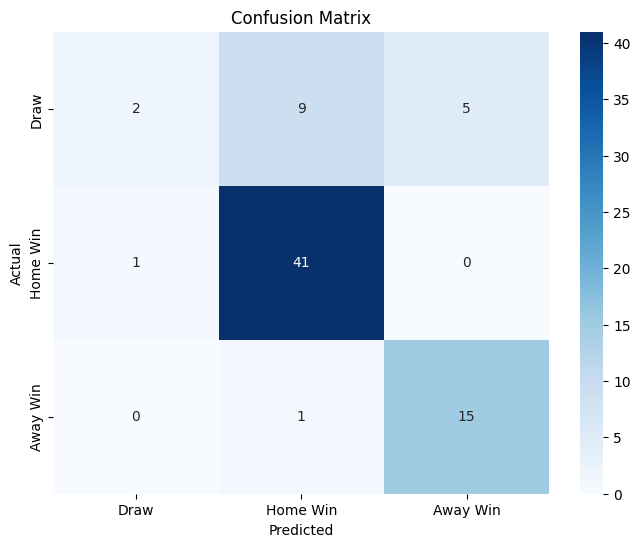

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
classes = ['Draw', 'Home Win', 'Away Win']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [128]:

# Calculate total counts of each class in y_test
draw_count = (y_test == 0).sum()
home_win_count = (y_test == 1).sum()
away_win_count = (y_test == 2).sum()

# Print the counts
print(f"Total Draws in y_test: {draw_count}")
print(f"Total Home Wins in y_test: {home_win_count}")
print(f"Total Away Wins in y_test: {away_win_count}")

# Optionally, print the sum of all counts
total_counts = draw_count + home_win_count + away_win_count
print(f"Total counts (Draws + Home Wins + Away Wins): {total_counts}")


Total Draws in y_test: 16
Total Home Wins in y_test: 42
Total Away Wins in y_test: 16
Total counts (Draws + Home Wins + Away Wins): 74


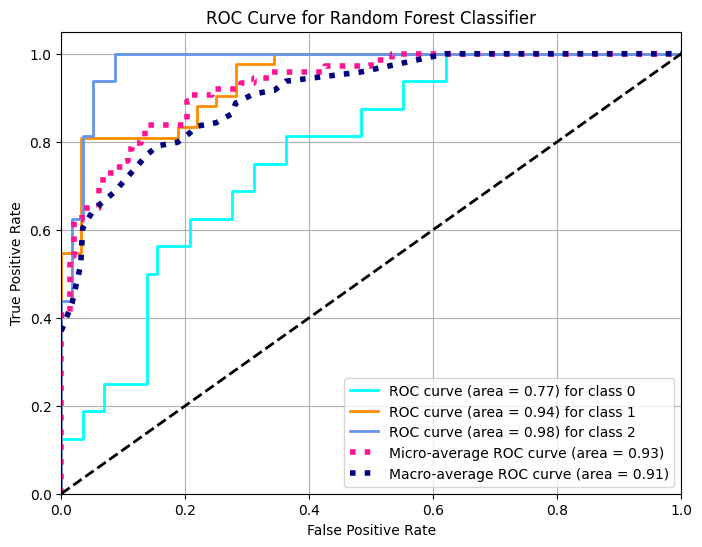

In [129]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming rf is your trained RandomForestClassifier and X_test, y_test are your test data
y_score = rf.predict_proba(X_test)

# Binarize the labels for multi-class ROC curve and ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_score, average="micro")

# Compute macro-average ROC curve and ROC AUC score
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()


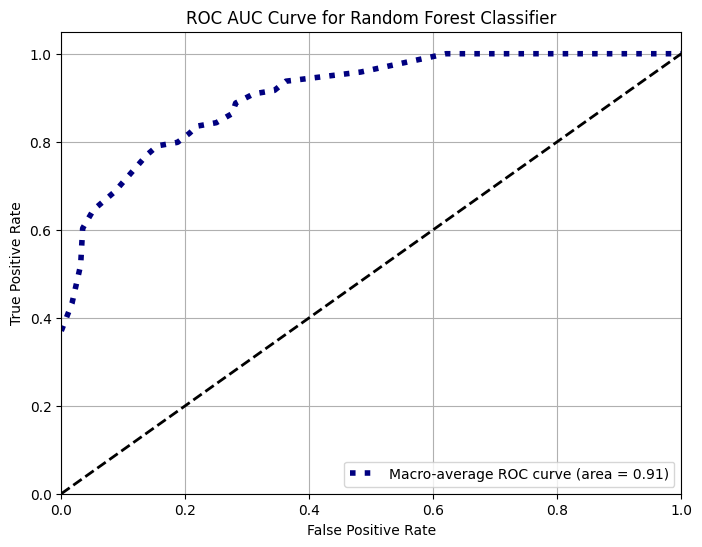

In [130]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming rf is your trained RandomForestClassifier and X_test, y_test are your test data
y_score = rf.predict_proba(X_test)

# Binarize the labels for multi-class ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC AUC score
roc_auc["micro"] = roc_auc_score(y_test_bin, y_score, average="micro")

# Compute macro-average ROC curve and ROC AUC score
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### **Adding class weight to balanced to see changes**

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model with adjusted class weights
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        16
           1       0.83      0.90      0.86        42
           2       0.70      1.00      0.82        16

    accuracy                           0.76        74
   macro avg       0.64      0.68      0.62        74
weighted avg       0.71      0.76      0.71        74

Confusion Matrix:
[[ 2  8  6]
 [ 3 38  1]
 [ 0  0 16]]


In [132]:
# the result of the balanced class looks worse than the normal random forest thats my opinion

##### **USING SMOTE TO FIX CLASS IMBALANCE OF RANDOM FOREST CLASSIFIER**

In [133]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model with resampled data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix (SMOTE):")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.90      0.83      0.86        42
           2       0.80      1.00      0.89        16

    accuracy                           0.81        74
   macro avg       0.77      0.80      0.78        74
weighted avg       0.81      0.81      0.81        74

Confusion Matrix (SMOTE):
[[ 9  4  3]
 [ 6 35  1]
 [ 0  0 16]]


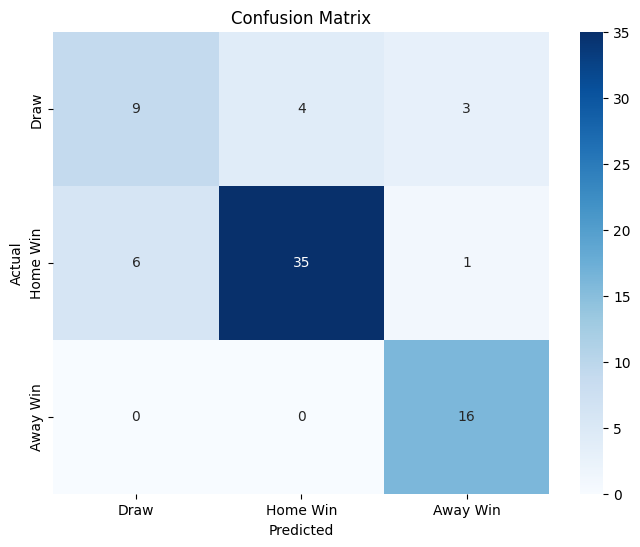

In [134]:
# print(confusion_matrix(y_test, y_pred_rf))


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
classes = ['Draw', 'Home Win', 'Away Win']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

When you used oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) on your training set after splitting by date, here's what typically happens:

Data Splitting: You first split your entire dataset into training and testing sets based on date to avoid look-ahead bias. This ensures that matches in the testing set occur chronologically after those in the training set.

Handling Imbalance: After splitting, you noticed that the training set had an imbalance in the distribution of outcomes ('Draw', 'Home Win', 'Away Win'). Specifically, 'Draw' outcomes were underrepresented compared to 'Home Win' and 'Away Win'.

Oversampling with SMOTE: To address this imbalance, you applied SMOTE to the training set. SMOTE generates synthetic samples for the minority class ('Draw' in this case) based on the feature space similarities between existing minority class samples. This creates a balanced distribution of classes in the training set.

Impact on Model Training: By oversampling the 'Draw' class, you provided the model with more instances of draws to learn from during training. This can potentially improve the model's ability to correctly classify draws in the testing set, especially if the original imbalance was affecting model performance.

Evaluation on Testing Set: After training the model on the oversampled training set, you evaluated its performance on the untouched testing set to assess its generalization ability. The evaluation metrics (precision, recall, F1-score, confusion matrix) showed improved performance for predicting draws compared to your initial model.

Result Interpretation: The improved performance metrics after using SMOTE indicate that addressing class imbalance through oversampling helped the model better understand and predict the 'Draw' class. This approach leverages synthetic data to enrich the training set and improve minority class prediction without affecting the chronological integrity of your dataset due to the initial date-based splitting.

In summary, using SMOTE on the training set after splitting by date allows you to handle class imbalance effectively while maintaining the integrity of your temporal data split. It enhances the model's ability to generalize and predict rare events (like draws) more accurately.

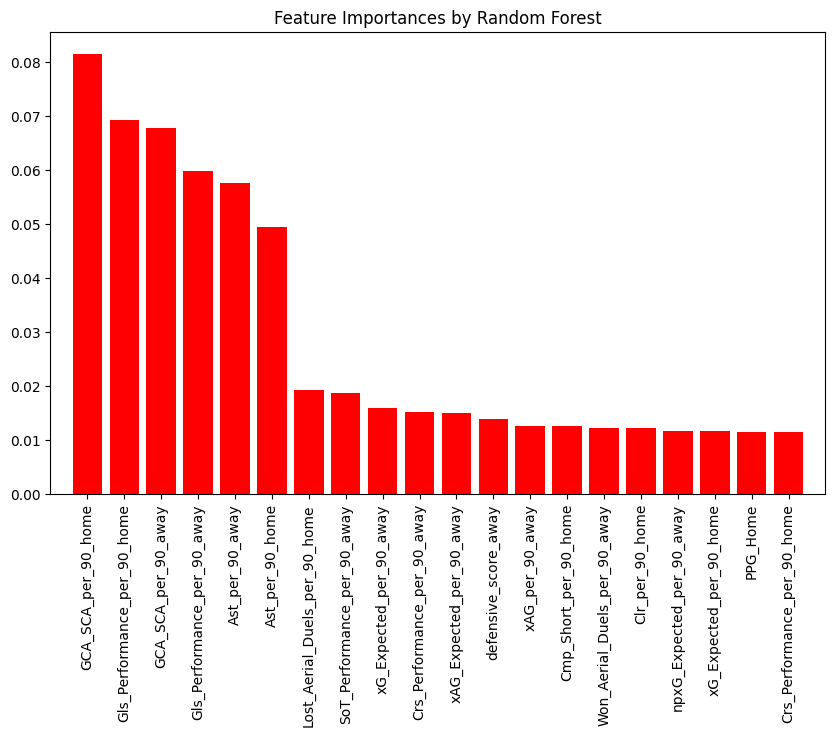

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'rf_model' is your trained Random Forest model
rf_importances = rf.feature_importances_
indices = np.argsort(rf_importances)[::-1][:20]  # Get indices of top 20 features

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances by Random Forest")
plt.bar(range(len(indices)), rf_importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.show()


In [136]:
import joblib
import os

# /Users/mac/R-footballscripts/PlayerPulse/PlayerPulse/PredictPlayer

# Define the path
model_path = os.path.expanduser('/Users/mac/R-footballscripts/PlayerPulse/PlayerPulse/PredictPlayer/rf_model.joblib')

# Ensure the directory exists, if not, create it
directory = os.path.dirname(model_path)
if not os.path.exists(directory):
    os.makedirs(directory)

print("Saving the model...")
joblib.dump(rf, model_path)
print("Model saved successfully at:", model_path)



Saving the model...
Model saved successfully at: /Users/mac/R-footballscripts/PlayerPulse/PlayerPulse/PredictPlayer/rf_model.joblib


In [137]:
# import joblib

# Load the model from disk
loaded_model = joblib.load('/Users/mac/R-footballscripts/PlayerPulse/PlayerPulse/PredictPlayer/rf_model.joblib')


# from google.colab import files
# files.download('/Users/mac/R-footballscripts/PlayerPulse/PlayerPulse/PredictPlayer/rf_model.joblib')


In [138]:
# Use loaded_model to make predictions or evaluate it
# For example:
predictions = loaded_model.predict(X_test)
print(predictions)

[1 0 0 1 1 1 2 1 1 1 0 1 2 1 2 2 2 2 1 1 0 1 1 2 0 1 0 1 1 1 1 1 2 1 0 1 2
 0 2 1 0 1 1 1 2 0 1 2 1 2 2 1 1 1 2 2 0 0 1 1 1 0 0 1 1 0 1 1 2 1 1 2 2 2]


------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Categorical Boosting**

In [139]:
 pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00


In [140]:
from catboost import CatBoostClassifier

# # Initialize the model
# catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, loss_function='MultiClass', verbose=False)

# # Fit the model
# catboost.fit(X_train, y_train, cat_features=categorical_features_indices)  # specify the index of categorical features

# # Make predictions
# y_pred_cat = catboost.predict(X_test)

# # Evaluate the model
# accuracy_cat = accuracy_score(y_test, y_pred_cat)
# print(f"CatBoost Accuracy: {accuracy_cat:.2%}")


# Create the CatBoost model
catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='MultiClass',  # Since your outcome has multiple classes
    verbose=50  # Controls the output of training progress info (every 50 iterations)
)

# Fit the model
catboost.fit(X_train, y_train)

# Make predictions
predictions = catboost.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')


0:	learn: 1.0390685	total: 71.1ms	remaining: 1m 11s
50:	learn: 0.4606851	total: 829ms	remaining: 15.4s
100:	learn: 0.3023133	total: 1.82s	remaining: 16.2s
150:	learn: 0.2280830	total: 2.38s	remaining: 13.4s
200:	learn: 0.1770060	total: 3.02s	remaining: 12s
250:	learn: 0.1421126	total: 3.84s	remaining: 11.5s
300:	learn: 0.1176950	total: 4.62s	remaining: 10.7s
350:	learn: 0.1005446	total: 5.45s	remaining: 10.1s
400:	learn: 0.0841327	total: 6.22s	remaining: 9.29s
450:	learn: 0.0720651	total: 7s	remaining: 8.53s
500:	learn: 0.0619439	total: 7.79s	remaining: 7.76s
550:	learn: 0.0544458	total: 8.67s	remaining: 7.07s
600:	learn: 0.0479515	total: 9.68s	remaining: 6.43s
650:	learn: 0.0427055	total: 10.6s	remaining: 5.68s
700:	learn: 0.0386792	total: 11.9s	remaining: 5.07s
750:	learn: 0.0348325	total: 13.1s	remaining: 4.35s
800:	learn: 0.0314919	total: 14.5s	remaining: 3.61s
850:	learn: 0.0287782	total: 15.6s	remaining: 2.73s
900:	learn: 0.0263208	total: 16.3s	remaining: 1.79s
950:	learn: 0.0244

In [141]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the CatBoost model
catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='MultiClass',  # Since your outcome has multiple classes
    verbose=50  # Controls the output of training progress info (every 50 iterations)
)

# Fit the model
catboost.fit(X_train, y_train)

# Make predictions
predictions = catboost.predict(X_test)
preds_proba = catboost.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')


0:	learn: 1.0390685	total: 37.6ms	remaining: 37.6s
50:	learn: 0.4606851	total: 1.26s	remaining: 23.4s
100:	learn: 0.3023133	total: 2.45s	remaining: 21.8s
150:	learn: 0.2280830	total: 3.84s	remaining: 21.6s
200:	learn: 0.1770060	total: 5.47s	remaining: 21.7s
250:	learn: 0.1421126	total: 6.4s	remaining: 19.1s
300:	learn: 0.1176950	total: 7.36s	remaining: 17.1s
350:	learn: 0.1005446	total: 8.75s	remaining: 16.2s
400:	learn: 0.0841327	total: 10s	remaining: 15s
450:	learn: 0.0720651	total: 11.2s	remaining: 13.7s
500:	learn: 0.0619439	total: 12.2s	remaining: 12.2s
550:	learn: 0.0544458	total: 13.1s	remaining: 10.7s
600:	learn: 0.0479515	total: 14.1s	remaining: 9.38s
650:	learn: 0.0427055	total: 14.9s	remaining: 7.99s
700:	learn: 0.0386792	total: 15.7s	remaining: 6.69s
750:	learn: 0.0348325	total: 16.3s	remaining: 5.41s
800:	learn: 0.0314919	total: 17.1s	remaining: 4.25s
850:	learn: 0.0287782	total: 17.8s	remaining: 3.12s
900:	learn: 0.0263208	total: 18.6s	remaining: 2.04s
950:	learn: 0.02445


Classification Report:
              precision    recall  f1-score   support

        Draw       0.62      0.31      0.42        16
    Home Win       0.85      0.93      0.89        42
    Away Win       0.75      0.94      0.83        16

    accuracy                           0.80        74
   macro avg       0.74      0.73      0.71        74
weighted avg       0.78      0.80      0.77        74



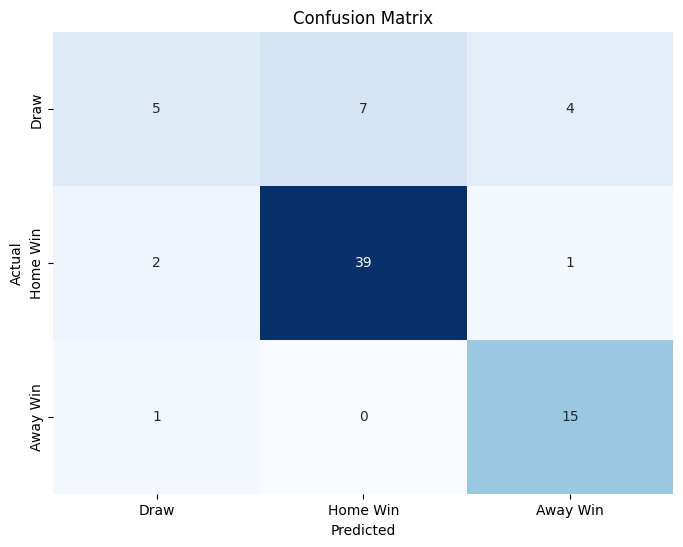

ROC-AUC Score (OvR): 0.94


In [142]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['Draw', 'Home Win', 'Away Win']))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_ovr = roc_auc_score(y_test, preds_proba, multi_class='ovr')
print(f"ROC-AUC Score (OvR): {roc_auc_ovr:.2f}")

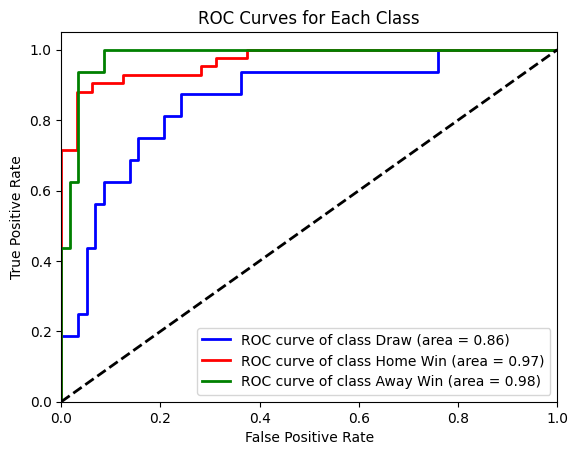

In [143]:
# Calculate ROC Curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  # Assuming 3 classes: Draw, Home Win, Away Win
    # ROC curve: computes TPR and FPR for each class
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), preds_proba[:, i])

    # ROC AUC: computes the Area Under the ROC Curve for each class
    roc_auc[i] = roc_auc_score((y_test == i).astype(int), preds_proba[:, i])

# Plotting the ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']
class_names = ['Draw', 'Home Win', 'Away Win']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

# Plotting the reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Setting plot limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


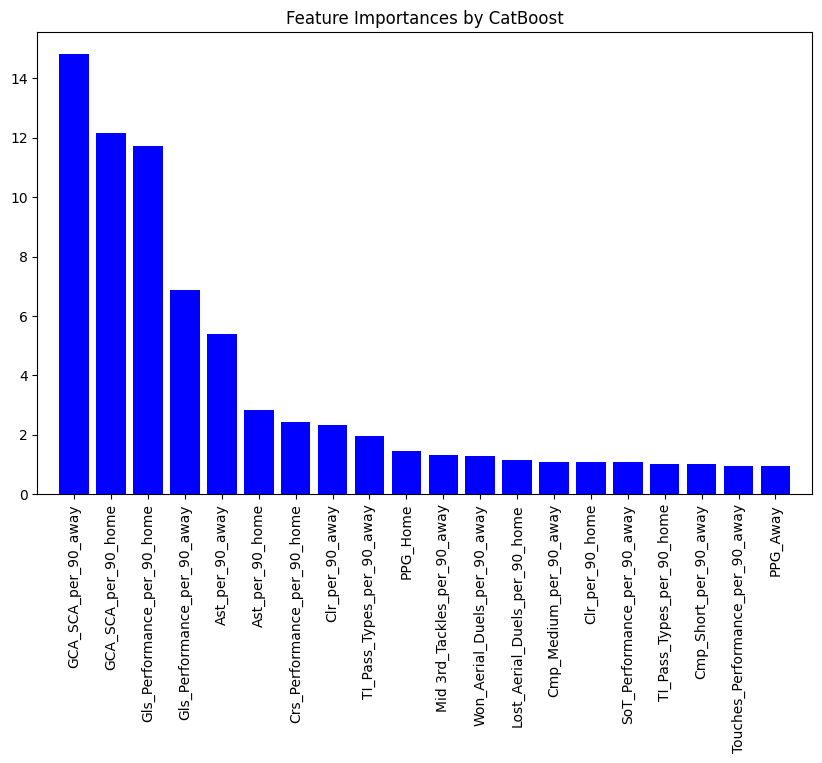

In [144]:
# Assuming 'catboost_model' is your trained CatBoost model
cat_importances = catboost.get_feature_importance()
cat_indices = np.argsort(cat_importances)[::-1][:20]  # Get indices of top 20 features

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances by CatBoost")
plt.bar(range(len(cat_indices)), cat_importances[cat_indices], color="b", align="center")
plt.xticks(range(len(cat_indices)), [X_train.columns[i] for i in cat_indices], rotation=90)
plt.xlim([-1, len(cat_indices)])
plt.show()


### **SMOTE and ADASYN**

In [145]:
pip install imbalanced-learn


0:	learn: 1.0423364	total: 56.8ms	remaining: 56.7s
50:	learn: 0.4123881	total: 821ms	remaining: 15.3s
100:	learn: 0.2727288	total: 1.49s	remaining: 13.2s
150:	learn: 0.2023464	total: 1.92s	remaining: 10.8s
200:	learn: 0.1540333	total: 2.56s	remaining: 10.2s
250:	learn: 0.1247825	total: 3.36s	remaining: 10s
300:	learn: 0.1039966	total: 4.3s	remaining: 9.98s
350:	learn: 0.0887728	total: 5.14s	remaining: 9.51s
400:	learn: 0.0760928	total: 6.14s	remaining: 9.18s
450:	learn: 0.0683586	total: 7.01s	remaining: 8.54s
500:	learn: 0.0601922	total: 8s	remaining: 7.97s
550:	learn: 0.0531858	total: 9.11s	remaining: 7.42s
600:	learn: 0.0465579	total: 10.5s	remaining: 7s
650:	learn: 0.0404092	total: 12.5s	remaining: 6.69s
700:	learn: 0.0357864	total: 14.4s	remaining: 6.13s
750:	learn: 0.0324947	total: 15.6s	remaining: 5.16s
800:	learn: 0.0300715	total: 16.7s	remaining: 4.15s
850:	learn: 0.0275012	total: 17.9s	remaining: 3.13s
900:	learn: 0.0255718	total: 19.1s	remaining: 2.1s
950:	learn: 0.0234759	to

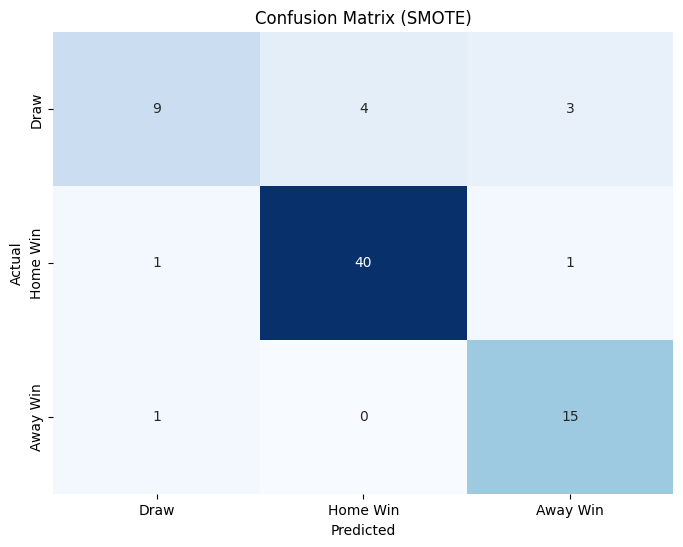

ROC-AUC Score (OvR) with SMOTE: 0.94


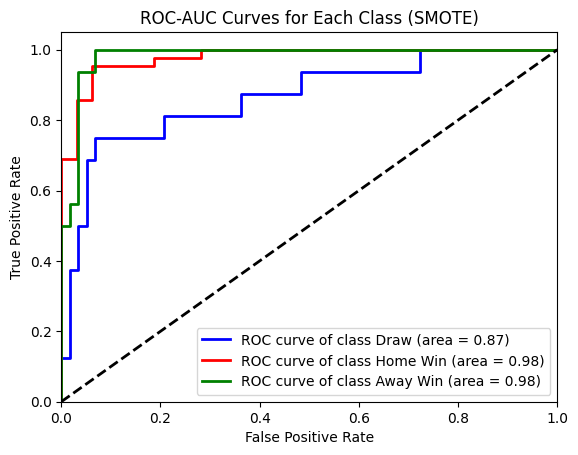

ADASYN Data Evaluation:

Classification Report:
              precision    recall  f1-score   support

        Draw       0.75      0.56      0.64        16
    Home Win       0.93      0.93      0.93        42
    Away Win       0.75      0.94      0.83        16

    accuracy                           0.85        74
   macro avg       0.81      0.81      0.80        74
weighted avg       0.85      0.85      0.85        74



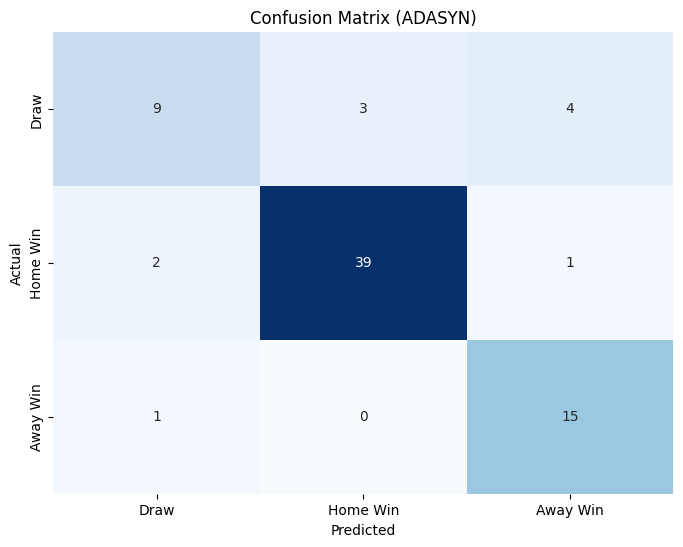

ROC-AUC Score (OvR) with ADASYN: 0.93


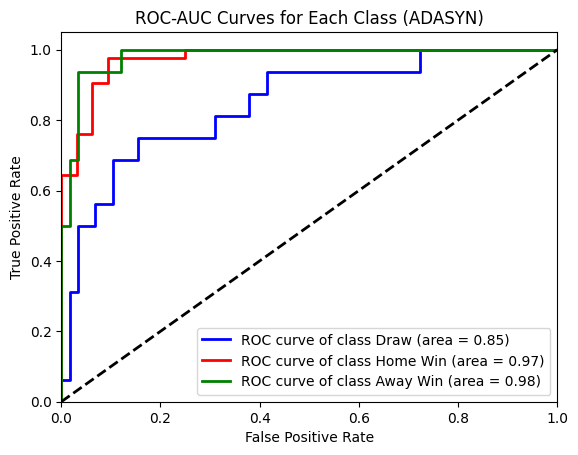

In [146]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Create the CatBoost model
catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='MultiClass',  # Since your outcome has multiple classes
    verbose=50  # Controls the output of training progress info (every 50 iterations)
)

# Fit the model on SMOTE data
catboost.fit(X_train_smote, y_train_smote)
predictions_smote = catboost.predict(X_test)
preds_proba_smote = catboost.predict_proba(X_test)

# Fit the model on ADASYN data
catboost.fit(X_train_adasyn, y_train_adasyn)
predictions_adasyn = catboost.predict(X_test)
preds_proba_adasyn = catboost.predict_proba(X_test)

# Evaluate the model on SMOTE data
print("SMOTE Data Evaluation:")
print("\nClassification Report:")
print(classification_report(y_test, predictions_smote, target_names=['Draw', 'Home Win', 'Away Win']))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SMOTE)')
plt.show()

# ROC-AUC Score
roc_auc_ovr_smote = roc_auc_score(y_test, preds_proba_smote, multi_class='ovr')
print(f"ROC-AUC Score (OvR) with SMOTE: {roc_auc_ovr_smote:.2f}")

# Plot ROC Curves for each class (SMOTE)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), preds_proba_smote[:, i])
    roc_auc[i] = roc_auc_score((y_test == i).astype(int), preds_proba_smote[:, i])

plt.figure()
colors = ['blue', 'red', 'green']
class_names = ['Draw', 'Home Win', 'Away Win']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Each Class (SMOTE)')
plt.legend(loc="lower right")
plt.show()

# Evaluate the model on ADASYN data
print("ADASYN Data Evaluation:")
print("\nClassification Report:")
print(classification_report(y_test, predictions_adasyn, target_names=['Draw', 'Home Win', 'Away Win']))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_adasyn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (ADASYN)')
plt.show()

# ROC-AUC Score
roc_auc_ovr_adasyn = roc_auc_score(y_test, preds_proba_adasyn, multi_class='ovr')
print(f"ROC-AUC Score (OvR) with ADASYN: {roc_auc_ovr_adasyn:.2f}")

# Plot ROC Curves for each class (ADASYN)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), preds_proba_adasyn[:, i])
    roc_auc[i] = roc_auc_score((y_test == i).astype(int), preds_proba_adasyn[:, i])

plt.figure()
colors = ['blue', 'red', 'green']
class_names = ['Draw', 'Home Win', 'Away Win']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Each Class (ADASYN)')
plt.legend(loc="lower right")
plt.show()


### **FIXING GOAL RELATED FEATURES HERE**

In [147]:
X_traind = X_train.copy()
X_testd = X_test.copy()
y_traind = y_train.copy()
y_testd = y_test.copy()

In [148]:
# X_traind.columns

# Keywords to exclude
exclude_keywords = ['Gls', 'Ast', 'GCA', 'SCA', 'xA', 'xAG', 'Expected', 'PKwon', 'PKcon']
# Filter columns based on keywords
filtered_columns = [col for col in X_traind.columns if not any(keyword in col for keyword in exclude_keywords)]

# Use the filtered columns to select data from X_traind
X_traind = X_traind[filtered_columns]

# Display the filtered columns
print(X_traind.columns)

Index(['Squad_ID_home', 'PrgP_Passes_per_90_home', 'PrgC_Carries_per_90_home',
       'PrgDist_Total_per_90_home', 'Cmp_Long_per_90_home',
       'Final_Third_per_90_home', 'TB_Pass_Types_per_90_home',
       'TI_Pass_Types_per_90_home', 'Att_Take_Ons_per_90_home',
       'Succ_Take_Ons_per_90_home', 'KP_per_90_home', 'PPA_per_90_home',
       'CrsPA_per_90_home', 'Att 3rd_Tackles_per_90_home',
       'SoT_Performance_per_90_home', 'Cmp_Passes_per_90_home',
       'Cmp_Short_per_90_home', 'Cmp_Medium_per_90_home',
       'Carries_Carries_per_90_home', 'Touches_Performance_per_90_home',
       'Cmp_Total_per_90_home', 'Tkl+Int_per_90_home',
       'TklW_Tackles_per_90_home', 'Def 3rd_Tackles_per_90_home',
       'Mid 3rd_Tackles_per_90_home', 'Recov_Performance_per_90_home',
       'Won_Aerial_Duels_per_90_home', 'Lost_Aerial_Duels_per_90_home',
       'Clr_per_90_home', 'Err_per_90_home', 'Blocks_Blocks_per_90_home',
       'Cmp_percent_Long_home', 'Crs_Performance_per_90_home',
      

In [149]:
# Use the filtered columns to select data from X_traind
X_testd = X_testd[filtered_columns]

# Display the filtered columns
print(X_testd.columns)

Index(['Squad_ID_home', 'PrgP_Passes_per_90_home', 'PrgC_Carries_per_90_home',
       'PrgDist_Total_per_90_home', 'Cmp_Long_per_90_home',
       'Final_Third_per_90_home', 'TB_Pass_Types_per_90_home',
       'TI_Pass_Types_per_90_home', 'Att_Take_Ons_per_90_home',
       'Succ_Take_Ons_per_90_home', 'KP_per_90_home', 'PPA_per_90_home',
       'CrsPA_per_90_home', 'Att 3rd_Tackles_per_90_home',
       'SoT_Performance_per_90_home', 'Cmp_Passes_per_90_home',
       'Cmp_Short_per_90_home', 'Cmp_Medium_per_90_home',
       'Carries_Carries_per_90_home', 'Touches_Performance_per_90_home',
       'Cmp_Total_per_90_home', 'Tkl+Int_per_90_home',
       'TklW_Tackles_per_90_home', 'Def 3rd_Tackles_per_90_home',
       'Mid 3rd_Tackles_per_90_home', 'Recov_Performance_per_90_home',
       'Won_Aerial_Duels_per_90_home', 'Lost_Aerial_Duels_per_90_home',
       'Clr_per_90_home', 'Err_per_90_home', 'Blocks_Blocks_per_90_home',
       'Cmp_percent_Long_home', 'Crs_Performance_per_90_home',
      

In [150]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtraind = xgb.DMatrix(X_traind, label=y_traind)
dtestd = xgb.DMatrix(X_testd, label=y_testd)

# Set parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softprob',  # multi-class classification
    'num_class': 3  # number of classes in the target variable
}

# Train the model
bstd = xgb.train(params, dtraind, num_boost_round=100)

# Predictions
predsd = bstd.predict(dtestd)
predictionsd = np.asarray([np.argmax(line) for line in predsd])

# Evaluate predictions
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f%%" % (accuracy_score(y_testd, predictionsd) * 100))


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Print Classification Report
target_names = ['Draw', 'Home Win', 'Away Win']
print("\nClassification Report:")
print(classification_report(y_testd, predictionsd, target_names=target_names))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_testd, predictionsd))

Accuracy: 60.81%

Classification Report:
              precision    recall  f1-score   support

        Draw       0.33      0.19      0.24        16
    Home Win       0.70      0.79      0.74        42
    Away Win       0.50      0.56      0.53        16

    accuracy                           0.61        74
   macro avg       0.51      0.51      0.50        74
weighted avg       0.58      0.61      0.59        74


Confusion Matrix:
[[ 3 10  3]
 [ 3 33  6]
 [ 3  4  9]]


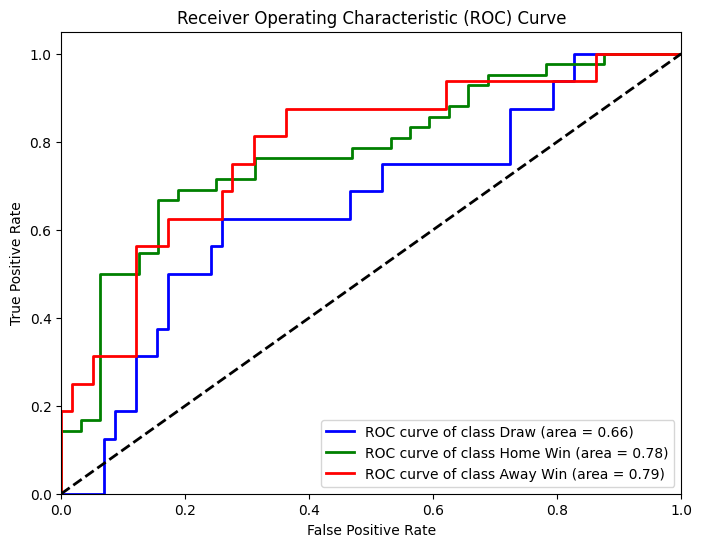

ROC AUC Score (Class Draw): 0.66
ROC AUC Score (Class Home Win): 0.78
ROC AUC Score (Class Away Win): 0.79


In [151]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Convert labels to binary matrix for ROC curve computation
from sklearn.preprocessing import label_binarize
y_test_bind = label_binarize(y_testd, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bind[:, i], predsd[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC scores
for i in range(3):
    print(f"ROC AUC Score (Class {class_names[i]}): {roc_auc[i]:.2f}")


**XG smote**

              precision    recall  f1-score   support

           0       0.42      0.31      0.36        16
           1       0.83      0.83      0.83        42
           2       0.50      0.62      0.56        16

    accuracy                           0.68        74
   macro avg       0.58      0.59      0.58        74
weighted avg       0.67      0.68      0.67        74



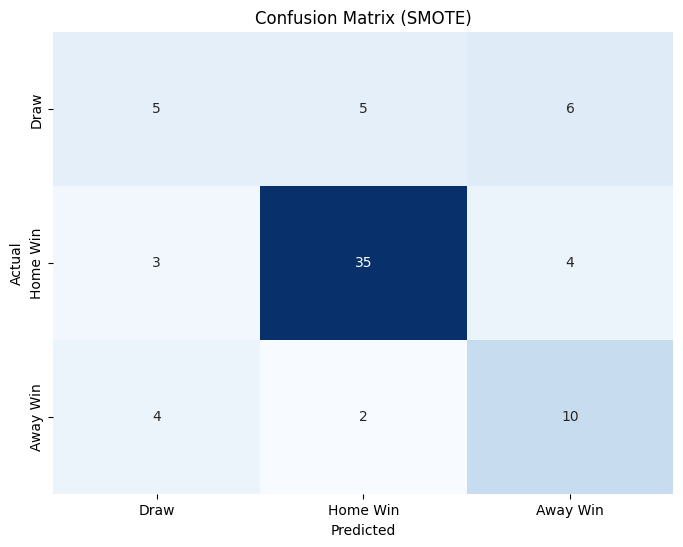

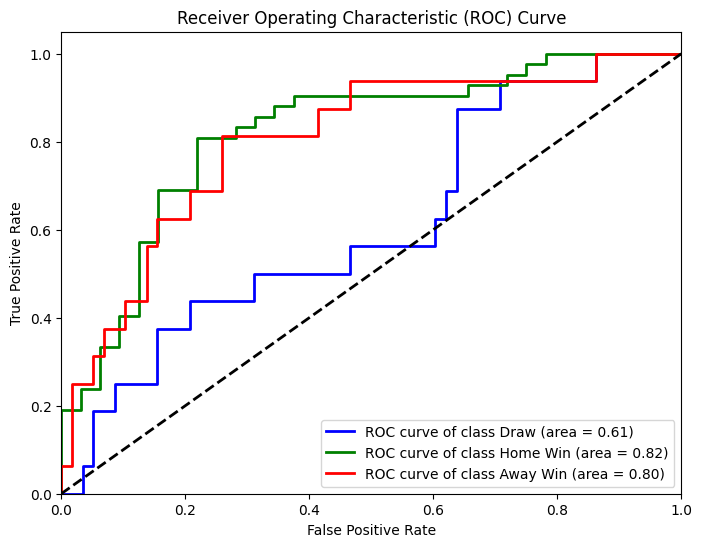

ROC AUC Score (Class Draw): 0.61
ROC AUC Score (Class Home Win): 0.82
ROC AUC Score (Class Away Win): 0.80


In [152]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_traind_resampled, y_traind_resampled = smote.fit_resample(X_traind, y_traind)

# Train your XGBoost model on the resampled data
dtrain_resampled = xgb.DMatrix(X_traind_resampled, label=y_traind_resampled)
bstd_resampled = xgb.train(params, dtrain_resampled, num_boost_round=100)

# Evaluate the model on the original test set
dtest = xgb.DMatrix(X_testd, label=y_testd)
preds = bstd_resampled.predict(dtest)
predictions = np.asarray([np.argmax(line) for line in preds])

# Print classification report and other metrics
print(classification_report(y_testd, predictions))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_testd, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SMOTE)')
plt.show()


from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Convert labels to binary matrix for ROC curve computation
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_testd, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC scores
for i in range(3):
    print(f"ROC AUC Score (Class {class_names[i]}): {roc_auc[i]:.2f}")


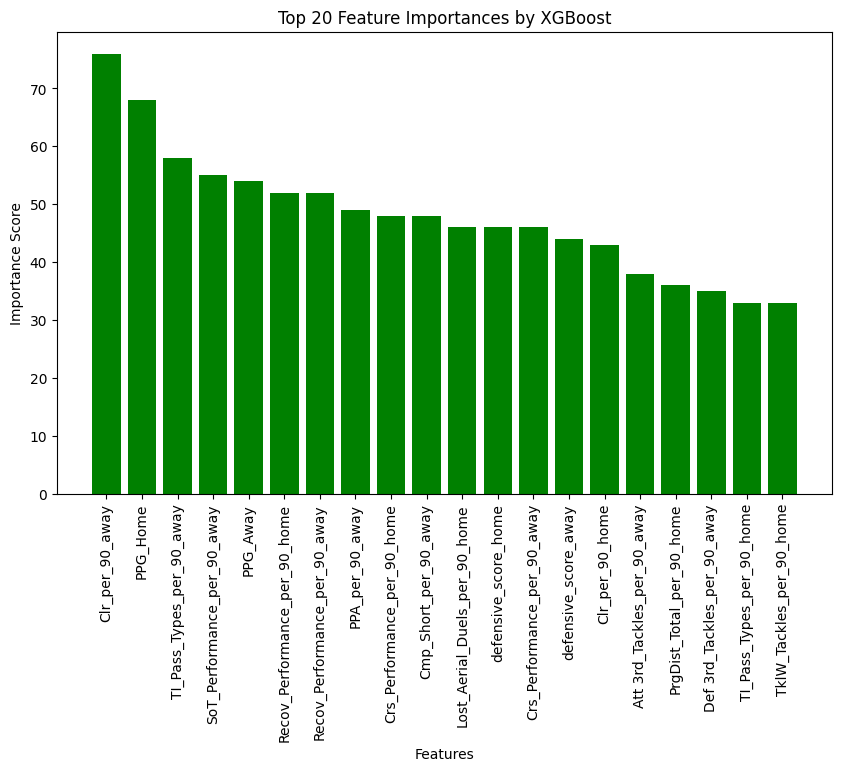

In [153]:
xgb_importances = bstd.get_score(importance_type='weight')
sorted_xgb_importances = sorted(xgb_importances.items(), key=lambda x: x[1], reverse=True)[:20]

# Extract feature names and their importance scores
features, importances = zip(*sorted_xgb_importances)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances by XGBoost")
plt.bar(features, importances, color="g")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


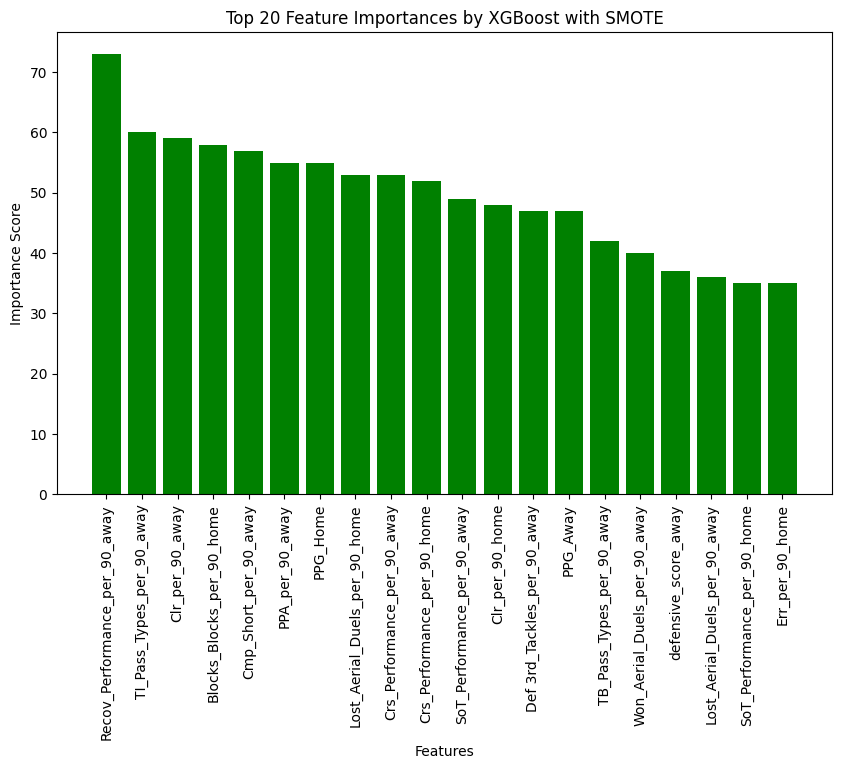

In [154]:
xgb_importances = bstd_resampled.get_score(importance_type='weight')
sorted_xgb_importances = sorted(xgb_importances.items(), key=lambda x: x[1], reverse=True)[:20]

# Extract feature names and their importance scores
features, importances = zip(*sorted_xgb_importances)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances by XGBoost with SMOTE")
plt.bar(features, importances, color="g")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

----- **RANDOM FOREST**

Random Forest Accuracy: 62.16%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.64      0.90      0.75        42
           2       0.50      0.44      0.47        16

    accuracy                           0.62        74
   macro avg       0.71      0.47      0.45        74
weighted avg       0.69      0.62      0.55        74

Confusion Matrix:
[[ 1 12  3]
 [ 0 38  4]
 [ 0  9  7]]
ROC-AUC Score (OvR): 0.78
ROC-AUC Score (OvO): 0.76


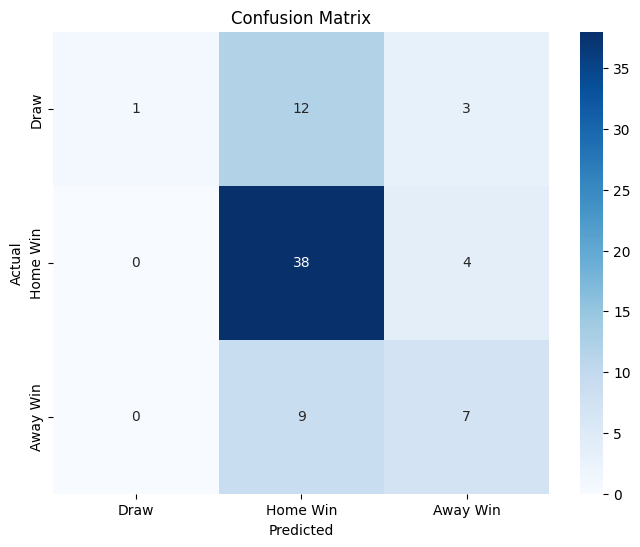

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
rfd = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model
rfd.fit(X_traind, y_traind)

# Make predictions
y_pred_rf = rfd.predict(X_testd)

# Evaluate the model
accuracy_rf = accuracy_score(y_testd, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2%}")



from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calculate precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_testd, y_pred_rf))

# Compute confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_testd, y_pred_rf))
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score using 'ovr' strategy
roc_auc_ovr = roc_auc_score(y_testd, rfd.predict_proba(X_testd), multi_class='ovr')
print(f"ROC-AUC Score (OvR): {roc_auc_ovr:.2f}")

# Calculate ROC-AUC score using 'ovo' strategy
roc_auc_ovo = roc_auc_score(y_testd, rfd.predict_proba(X_testd), multi_class='ovo')
print(f"ROC-AUC Score (OvO): {roc_auc_ovo:.2f}")


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_testd, y_pred_rf)
classes = ['Draw', 'Home Win', 'Away Win']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


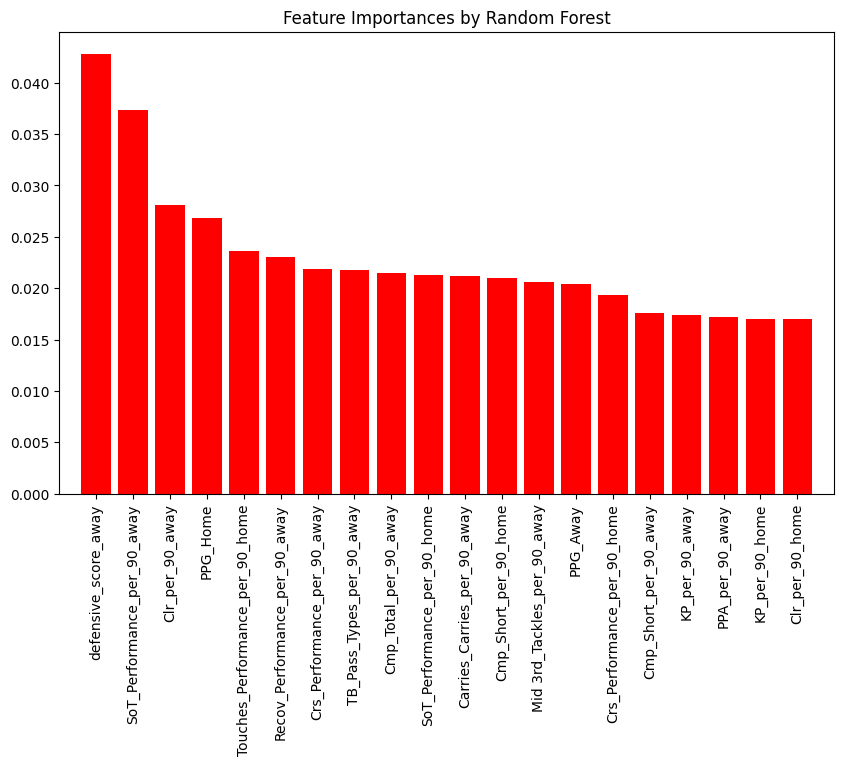

In [156]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'rf_model' is your trained Random Forest model
rfd_importances = rfd.feature_importances_
indices = np.argsort(rfd_importances)[::-1][:20]  # Get indices of top 20 features

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances by Random Forest")
plt.bar(range(len(indices)), rfd_importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), [X_traind.columns[i] for i in indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.show()

---- SMOTE RANDOMFOREST

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.27      0.19      0.22        16
           1       0.74      0.74      0.74        42
           2       0.48      0.62      0.54        16

    accuracy                           0.59        74
   macro avg       0.50      0.52      0.50        74
weighted avg       0.58      0.59      0.58        74

Confusion Matrix (SMOTE):
[[ 3  8  5]
 [ 5 31  6]
 [ 3  3 10]]


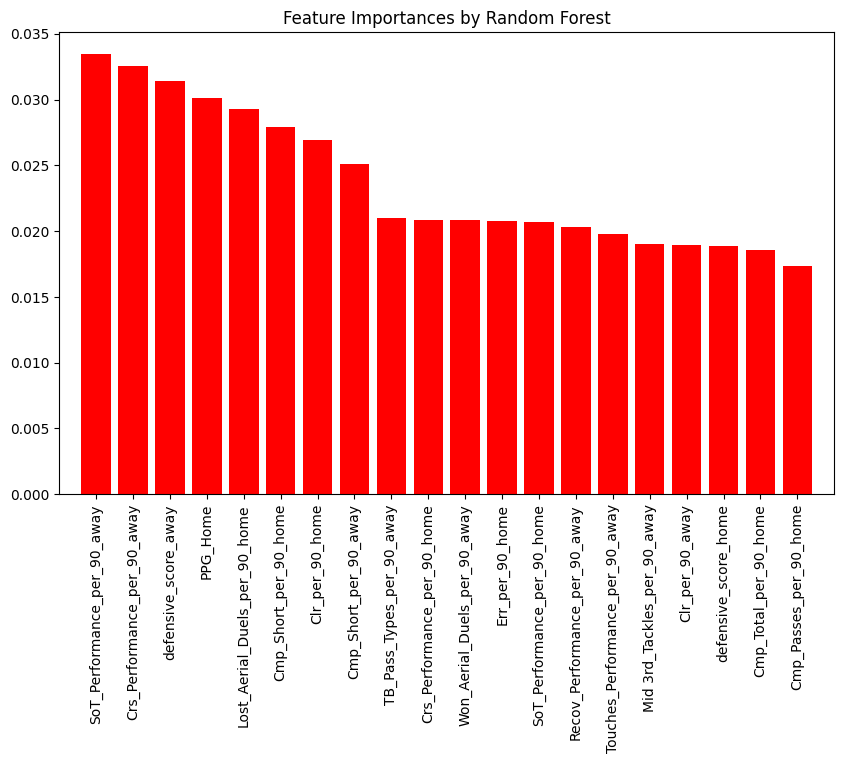

In [157]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_traind_resampled, y_traind_resampled = smote.fit_resample(X_traind, y_traind)

# Initialize the model
rfds = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model with resampled data
rfds.fit(X_traind_resampled, y_traind_resampled)

# Make predictions
y_pred_rfd = rfds.predict(X_testd)

# Evaluate the model
print("Classification Report (SMOTE):")
print(classification_report(y_testd, y_pred_rfd))

print("Confusion Matrix (SMOTE):")
print(confusion_matrix(y_testd, y_pred_rfd))

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'rf_model' is your trained Random Forest model
rfds_importances = rfds.feature_importances_
indices = np.argsort(rfds_importances)[::-1][:20]  # Get indices of top 20 features

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances by Random Forest")
plt.bar(range(len(indices)), rfds_importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), [X_traind.columns[i] for i in indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.show()


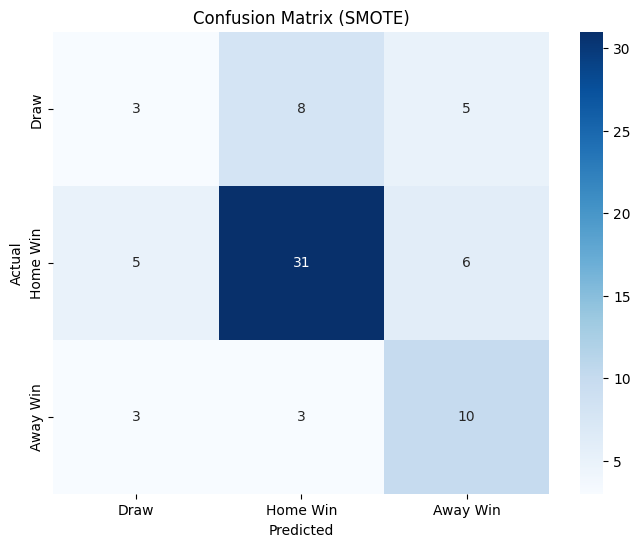

In [158]:
# Calculate confusion matrix
cm = confusion_matrix(y_testd, y_pred_rfd)
classes = ['Draw', 'Home Win', 'Away Win']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SMOTE)')
plt.show()

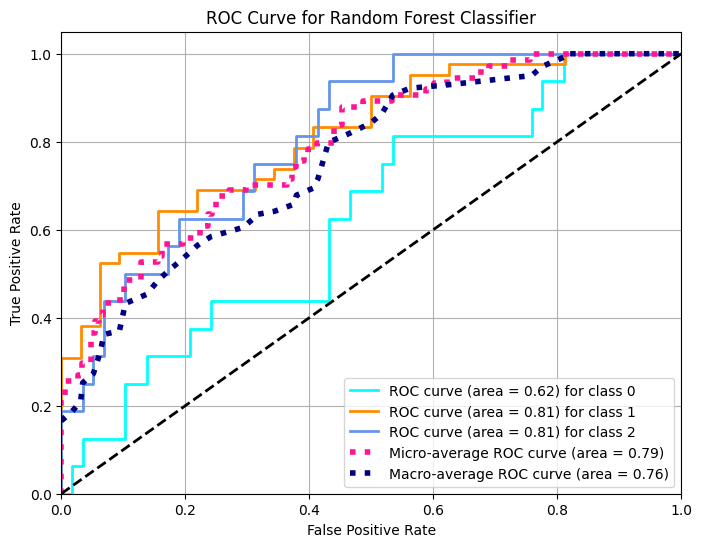

In [159]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming rf is your trained RandomForestClassifier and X_test, y_test are your test data
y_score = rfds.predict_proba(X_testd)

# Binarize the labels for multi-class ROC curve and ROC AUC calculation
y_test_bin = label_binarize(y_testd, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_score, average="micro")

# Compute macro-average ROC curve and ROC AUC score
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### --------- **CATBOOST**

0:	learn: 1.0702472	total: 13.4ms	remaining: 13.4s
50:	learn: 0.7295541	total: 1.33s	remaining: 24.8s
100:	learn: 0.5388127	total: 2.98s	remaining: 26.5s
150:	learn: 0.4134742	total: 4.53s	remaining: 25.5s
200:	learn: 0.3308060	total: 6.27s	remaining: 24.9s
250:	learn: 0.2707660	total: 7.46s	remaining: 22.3s
300:	learn: 0.2245760	total: 8.6s	remaining: 20s
350:	learn: 0.1876978	total: 9.51s	remaining: 17.6s
400:	learn: 0.1594071	total: 10.4s	remaining: 15.6s
450:	learn: 0.1377406	total: 11.5s	remaining: 14s
500:	learn: 0.1205019	total: 12.8s	remaining: 12.7s
550:	learn: 0.1047732	total: 14s	remaining: 11.4s
600:	learn: 0.0923640	total: 14.9s	remaining: 9.89s
650:	learn: 0.0821783	total: 16s	remaining: 8.57s
700:	learn: 0.0747459	total: 18.1s	remaining: 7.73s
750:	learn: 0.0673338	total: 20.4s	remaining: 6.77s
800:	learn: 0.0607931	total: 21.8s	remaining: 5.42s
850:	learn: 0.0551827	total: 22.9s	remaining: 4.02s
900:	learn: 0.0504154	total: 24.1s	remaining: 2.64s
950:	learn: 0.0468553	t

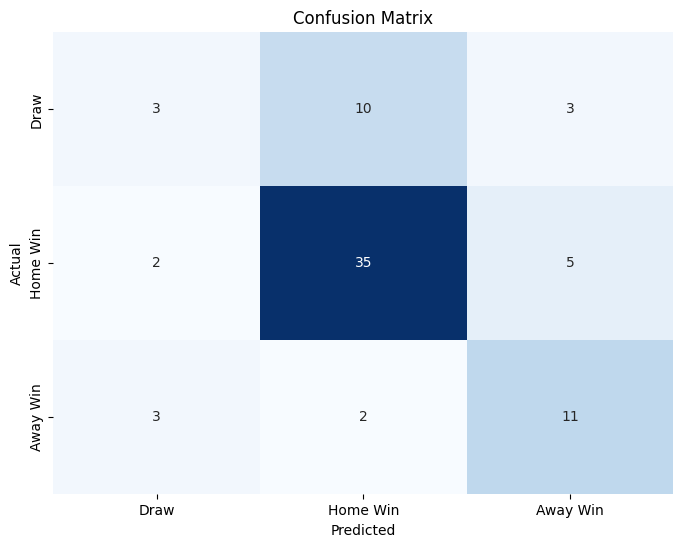

ROC-AUC Score (OvR): 0.78


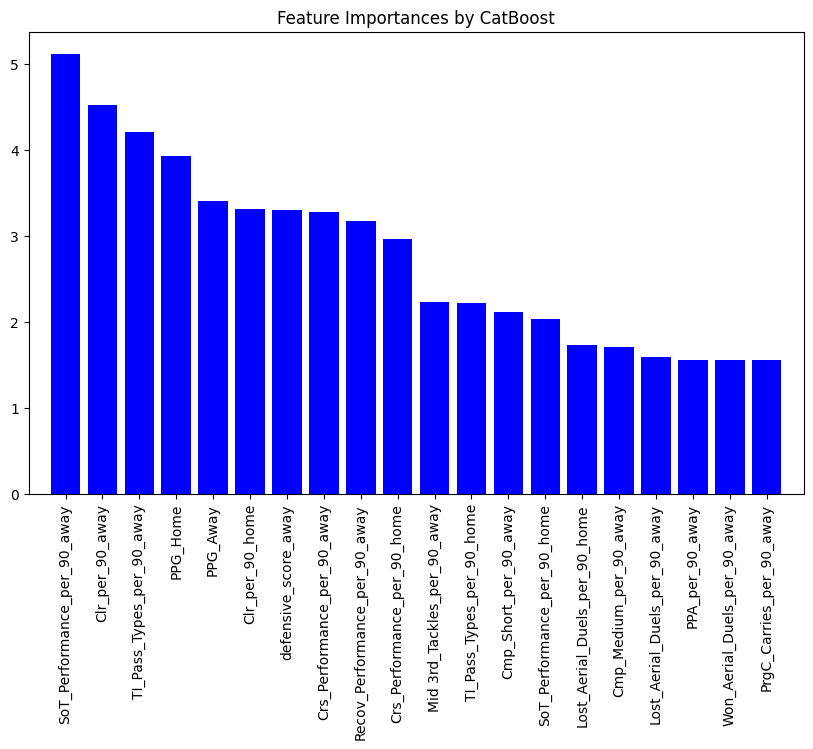

In [160]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the CatBoost model
catboostd = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='MultiClass',  # Since your outcome has multiple classes
    verbose=50  # Controls the output of training progress info (every 50 iterations)
)

# Fit the model
catboostd.fit(X_traind, y_traind)

# Make predictions
predictionsd = catboostd.predict(X_testd)
preds_probad = catboostd.predict_proba(X_testd)

# Evaluate the model
accuracy = accuracy_score(y_testd, predictionsd)
print(f'Accuracy: {accuracy:.2%}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_testd, predictionsd, target_names=['Draw', 'Home Win', 'Away Win']))

# Confusion Matrix
cm = confusion_matrix(y_testd, predictionsd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_ovr = roc_auc_score(y_testd, preds_probad, multi_class='ovr')
print(f"ROC-AUC Score (OvR): {roc_auc_ovr:.2f}")

# Assuming 'catboost_model' is your trained CatBoost model
cat_importances = catboostd.get_feature_importance()
cat_indices = np.argsort(cat_importances)[::-1][:20]  # Get indices of top 20 features

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances by CatBoost")
plt.bar(range(len(cat_indices)), cat_importances[cat_indices], color="b", align="center")
plt.xticks(range(len(cat_indices)), [X_traind.columns[i] for i in cat_indices], rotation=90)
plt.xlim([-1, len(cat_indices)])
plt.show()


### **CATBOOST SMOTE**

0:	learn: 1.0792146	total: 31.5ms	remaining: 31.5s
50:	learn: 0.6966130	total: 1.1s	remaining: 20.5s
100:	learn: 0.4916853	total: 2.39s	remaining: 21.3s
150:	learn: 0.3742384	total: 4.24s	remaining: 23.8s
200:	learn: 0.2940514	total: 6.09s	remaining: 24.2s
250:	learn: 0.2417097	total: 7.61s	remaining: 22.7s
300:	learn: 0.2044533	total: 8.52s	remaining: 19.8s
350:	learn: 0.1753279	total: 9.43s	remaining: 17.4s
400:	learn: 0.1524587	total: 10.4s	remaining: 15.5s
450:	learn: 0.1308481	total: 11.5s	remaining: 14s
500:	learn: 0.1143751	total: 12.7s	remaining: 12.6s
550:	learn: 0.1015617	total: 13.6s	remaining: 11.1s
600:	learn: 0.0913631	total: 14.5s	remaining: 9.65s
650:	learn: 0.0818810	total: 15.4s	remaining: 8.27s
700:	learn: 0.0740107	total: 16.5s	remaining: 7.03s
750:	learn: 0.0658402	total: 17.6s	remaining: 5.84s
800:	learn: 0.0588961	total: 19.2s	remaining: 4.78s
850:	learn: 0.0544200	total: 20.8s	remaining: 3.64s
900:	learn: 0.0496567	total: 22.1s	remaining: 2.43s
950:	learn: 0.045

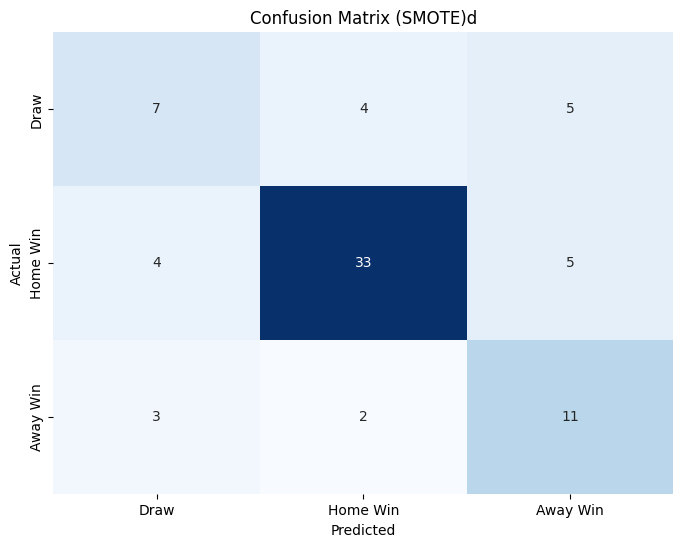

ROC-AUC Score (OvR) with SMOTE: 0.76


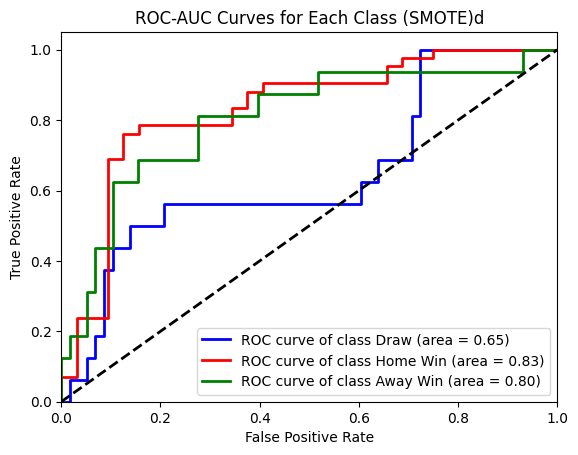

ADASYN Data Evaluation:

Classification Report:
              precision    recall  f1-score   support

        Draw       0.40      0.25      0.31        16
    Home Win       0.77      0.81      0.79        42
    Away Win       0.55      0.69      0.61        16

    accuracy                           0.66        74
   macro avg       0.57      0.58      0.57        74
weighted avg       0.64      0.66      0.65        74



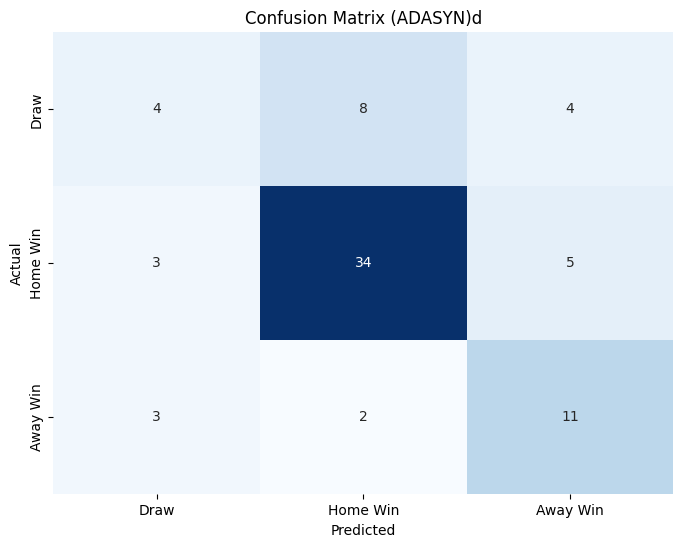

ROC-AUC Score (OvR) with ADASYN: 0.76


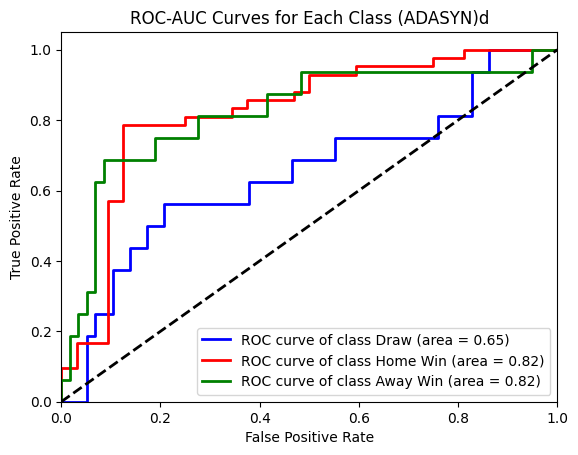

In [161]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# SMOTE
smote = SMOTE(random_state=42)
X_train_smoted, y_train_smoted = smote.fit_resample(X_traind, y_traind)

# ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasynd, y_train_adasynd = adasyn.fit_resample(X_traind, y_traind)

# Create the CatBoost model
catboostds = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='MultiClass',  # Since your outcome has multiple classes
    verbose=50  # Controls the output of training progress info (every 50 iterations)
)

# Fit the model on SMOTE data
catboostds.fit(X_train_smoted, y_train_smoted)
predictions_smoted = catboostds.predict(X_testd)
preds_proba_smoted = catboostds.predict_proba(X_testd)

# Fit the model on ADASYN data
catboostds.fit(X_train_adasynd, y_train_adasynd)
predictions_adasynd = catboostds.predict(X_testd)
preds_proba_adasynd = catboostds.predict_proba(X_testd)

# Evaluate the model on SMOTE data
print("SMOTE Data Evaluation:")
print("\nClassification Report:")
print(classification_report(y_testd, predictions_smoted, target_names=['Draw', 'Home Win', 'Away Win']))

# Confusion Matrix
cm = confusion_matrix(y_testd, predictions_smoted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SMOTE)d')
plt.show()

# ROC-AUC Score
roc_auc_ovr_smote = roc_auc_score(y_testd, preds_proba_smoted, multi_class='ovr')
print(f"ROC-AUC Score (OvR) with SMOTE: {roc_auc_ovr_smote:.2f}")

# Plot ROC Curves for each class (SMOTE)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_testd == i).astype(int), preds_proba_smoted[:, i])
    roc_auc[i] = roc_auc_score((y_testd == i).astype(int), preds_proba_smoted[:, i])

plt.figure()
colors = ['blue', 'red', 'green']
class_names = ['Draw', 'Home Win', 'Away Win']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Each Class (SMOTE)d')
plt.legend(loc="lower right")
plt.show()

# Evaluate the model on ADASYN data
print("ADASYN Data Evaluation:")
print("\nClassification Report:")
print(classification_report(y_testd, predictions_adasynd, target_names=['Draw', 'Home Win', 'Away Win']))

# Confusion Matrix
cm = confusion_matrix(y_testd, predictions_adasynd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (ADASYN)d')
plt.show()

# ROC-AUC Score
roc_auc_ovr_adasyn = roc_auc_score(y_testd, preds_proba_adasynd, multi_class='ovr')
print(f"ROC-AUC Score (OvR) with ADASYN: {roc_auc_ovr_adasyn:.2f}")

# Plot ROC Curves for each class (ADASYN)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_testd == i).astype(int), preds_proba_adasynd[:, i])
    roc_auc[i] = roc_auc_score((y_testd == i).astype(int), preds_proba_adasynd[:, i])

plt.figure()
colors = ['blue', 'red', 'green']
class_names = ['Draw', 'Home Win', 'Away Win']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Each Class (ADASYN)d')
plt.legend(loc="lower right")
plt.show()


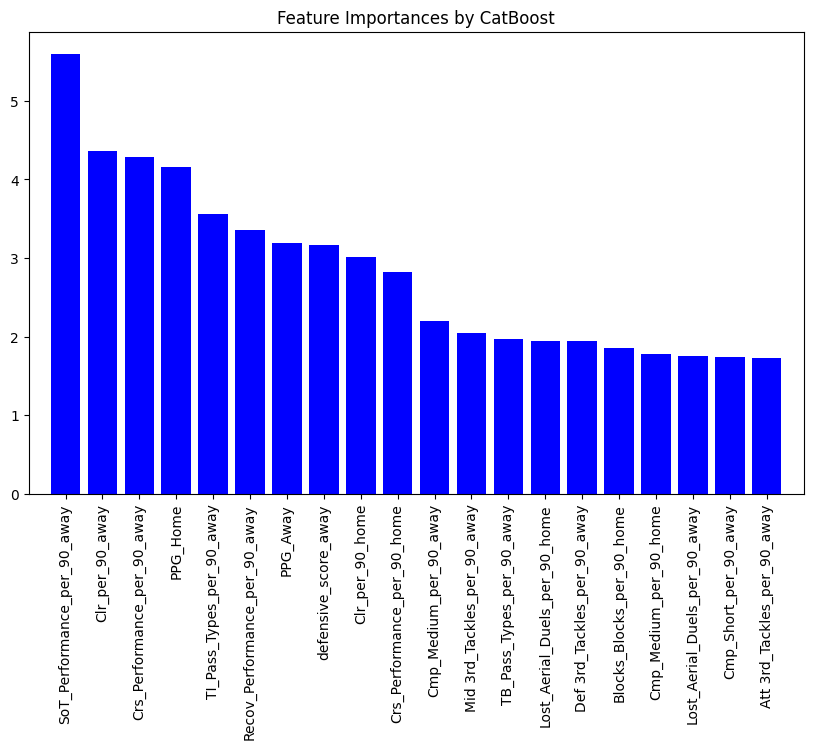

In [162]:
# Assuming 'catboost_model' is your trained CatBoost model
cat_importancesds = catboostds.get_feature_importance()
cat_indicesds = np.argsort(cat_importancesds)[::-1][:20]  # Get indices of top 20 features

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances by CatBoost")
plt.bar(range(len(cat_indicesds)), cat_importancesds[cat_indicesds], color="b", align="center")
plt.xticks(range(len(cat_indicesds)), [X_train_smoted.columns[i] for i in cat_indicesds], rotation=90)
plt.xlim([-1, len(cat_indicesds)])
plt.show()

## NEURAL NETWORKS


---



In [163]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Example architecture
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),  # Assuming X_train is reshaped appropriately
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')  # 3 output units for 3 classes: Home win, Away win, Draw
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming X_train and X_test are reshaped to (n_samples, n_features, 1)
# For instance: X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
# And that y_train is categorical but encoded as integers [0, 1, 2]

history =  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
9/9 [==============================] - 10s 212ms/step - loss: 1.0647 - accuracy: 0.4727 - val_loss: 1.0936 - val_accuracy: 0.3871
Epoch 2/10
9/9 [==============================] - 1s 90ms/step - loss: 1.0629 - accuracy: 0.4727 - val_loss: 1.0575 - val_accuracy: 0.3871
Epoch 3/10
9/9 [==============================] - 1s 101ms/step - loss: 1.0719 - accuracy: 0.4436 - val_loss: 1.0579 - val_accuracy: 0.3871
Epoch 4/10
9/9 [==============================] - 1s 121ms/step - loss: 1.0420 - accuracy: 0.4691 - val_loss: 1.0748 - val_accuracy: 0.3871
Epoch 5/10
9/9 [==============================] - 2s 167ms/step - loss: 1.0254 - accuracy: 0.4727 - val_loss: 0.9857 - val_accuracy: 0.5484
Epoch 6/10
9/9 [==============================] - 2s 227ms/step - loss: 1.0076 - accuracy: 0.5745 - val_loss: 0.9584 - val_accuracy: 0.5806
Epoch 7/10
9/9 [==============================] - 2s 187ms/step - loss: 0.9858 - accuracy: 0.5382 - val_loss: 0.8623 - val_accuracy: 0.6452
Epoch 8/10
9/9 [====

3/3 [==============================] - 1s 24ms/step

Classification Report:
              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00        16
    Home Win       0.77      0.81      0.79        42
    Away Win       0.47      0.88      0.61        16

    accuracy                           0.65        74
   macro avg       0.41      0.56      0.47        74
weighted avg       0.54      0.65      0.58        74



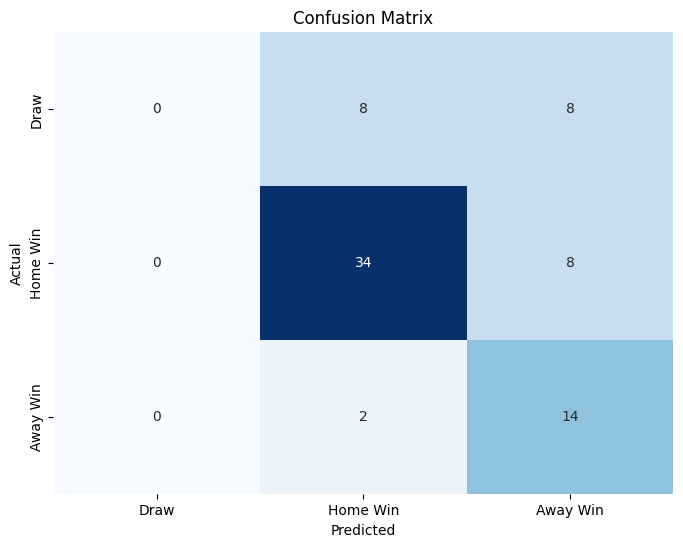

ROC-AUC Score (OvR): 0.78


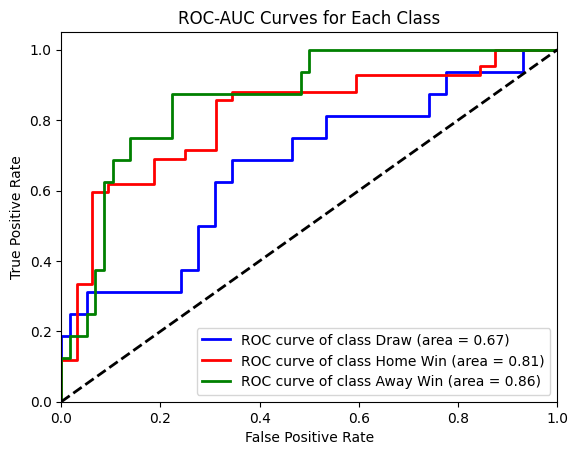

In [164]:
# Evaluate the model on test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Draw', 'Home Win', 'Away Win']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_ovr = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC Score (OvR): {roc_auc_ovr:.2f}")

# Plot ROC Curves for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score((y_test == i).astype(int), y_pred_proba[:, i])

plt.figure()
colors = ['blue', 'red', 'green']
class_names = ['Draw', 'Home Win', 'Away Win']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


In [165]:
# for i, color in zip(range(3), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')
#     print(f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

**Precision-Recall Curve:**

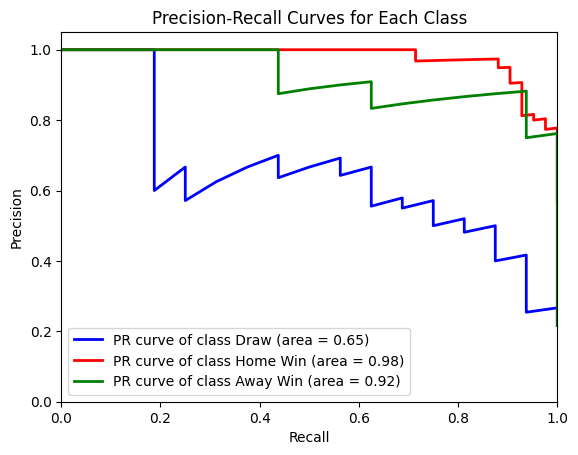

In [166]:
from sklearn.metrics import precision_recall_curve, auc

# Compute precision-recall curve for each class
precision = {}
recall = {}
pr_auc = {}

for i in range(3):  # Assuming 3 classes (Draw, Home Win, Away Win)
    precision[i], recall[i], _ = precision_recall_curve((y_test == i).astype(int), preds_proba[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plotting Precision-Recall curves
plt.figure()
colors = ['blue', 'red', 'green']
class_names = ['Draw', 'Home Win', 'Away Win']

for i, color in zip(range(3), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'PR curve of class {class_names[i]} (area = {pr_auc[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Class')
plt.legend(loc="lower left")
plt.show()


**Learning Curves:**

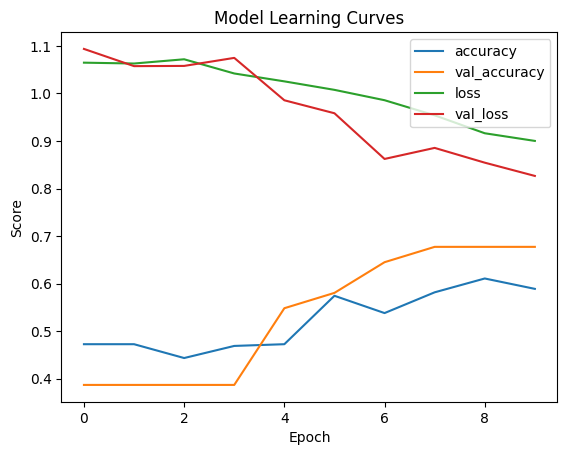

In [167]:


# Plotting learning curves
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend(loc="upper right")
plt.show()


**Cross-Validation:**

In [168]:
# pip install scikeras

In [169]:
# # from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier, KerasRegressor
# from sklearn.model_selection import cross_val_score, StratifiedKFold

# # Define a function that creates your Keras model
# def create_model():
#     model = Sequential([
#         LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
#         Dropout(0.2),
#         LSTM(50, return_sequences=False),
#         Dropout(0.2),
#         Dense(50, activation='relu'),
#         Dense(3, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Wrap the Keras model in a KerasClassifier
# keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# # Use StratifiedKFold for cross-validation
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(keras_model, X_train, y_train, cv=kfold, scoring='accuracy')

# # Print cross-validation scores
# print(f'Cross-validation scores: {cv_scores}')
# print(f'Mean CV accuracy: {cv_scores.mean():.2f} +/- {cv_scores.std():.2f}')


**Improving baseline nueral network**

Epoch 1/10
9/9 [==============================] - 7s 214ms/step - loss: 1.0880 - accuracy: 0.4145 - val_loss: 1.0558 - val_accuracy: 0.3871
Epoch 2/10
9/9 [==============================] - 1s 90ms/step - loss: 1.0445 - accuracy: 0.4764 - val_loss: 1.0327 - val_accuracy: 0.3871
Epoch 3/10
9/9 [==============================] - 1s 107ms/step - loss: 1.0238 - accuracy: 0.4800 - val_loss: 0.9925 - val_accuracy: 0.5161
Epoch 4/10
9/9 [==============================] - 2s 279ms/step - loss: 1.0012 - accuracy: 0.5455 - val_loss: 0.9388 - val_accuracy: 0.6452
Epoch 5/10
9/9 [==============================] - 1s 91ms/step - loss: 0.9765 - accuracy: 0.5345 - val_loss: 0.8931 - val_accuracy: 0.6452
Epoch 6/10
9/9 [==============================] - 1s 90ms/step - loss: 0.9301 - accuracy: 0.6000 - val_loss: 0.8931 - val_accuracy: 0.6774
Epoch 7/10
9/9 [==============================] - 1s 97ms/step - loss: 0.9165 - accuracy: 0.6000 - val_loss: 0.8613 - val_accuracy: 0.6452
Epoch 8/10
9/9 [========

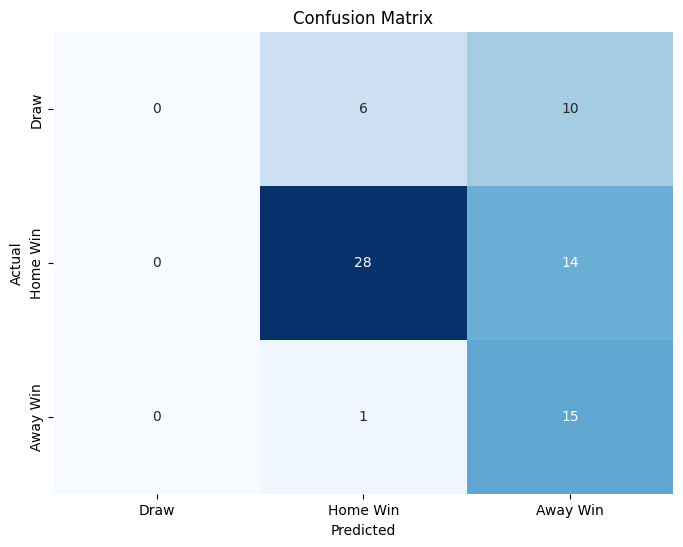

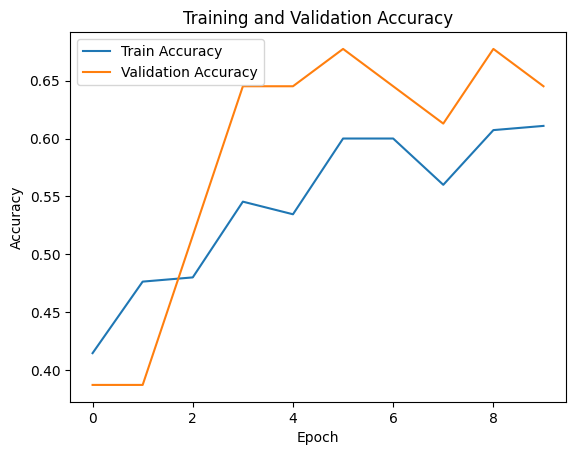

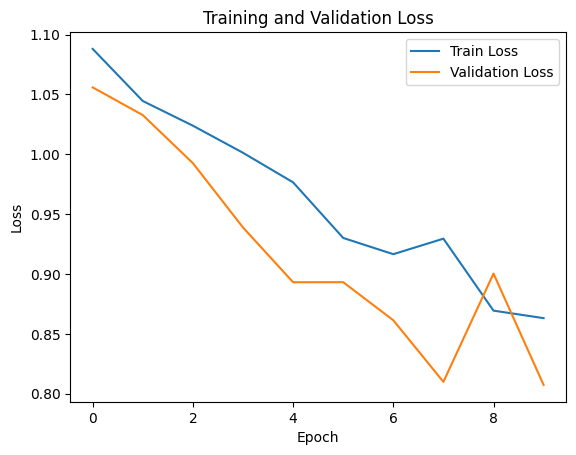

In [170]:
# Define the model
model2 = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)



# Evaluate on test data
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')



# Make predictions
predictions = model2.predict(X_test)

# Convert predictions to classes (assuming predictions are probabilities)
y_pred = np.argmax(predictions, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Draw', 'Home Win', 'Away Win']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Plot Training History

if 'accuracy' in history2.history:
    plt.plot(history2.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history2.history:
    plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

if 'loss' in history2.history:
    plt.plot(history2.history['loss'], label='Train Loss')
if 'val_loss' in history2.history:
    plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**SMOTE NUERAL BASELINE**

Epoch 1/10
12/12 [==============================] - 7s 178ms/step - loss: 1.0900 - accuracy: 0.3681 - val_loss: 1.4218 - val_accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 1s 86ms/step - loss: 1.0757 - accuracy: 0.3603 - val_loss: 1.2139 - val_accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 1s 121ms/step - loss: 1.0678 - accuracy: 0.3499 - val_loss: 1.2761 - val_accuracy: 0.1163
Epoch 4/10
12/12 [==============================] - 2s 148ms/step - loss: 1.0461 - accuracy: 0.4047 - val_loss: 1.3683 - val_accuracy: 0.3023
Epoch 5/10
12/12 [==============================] - 2s 159ms/step - loss: 1.0075 - accuracy: 0.4648 - val_loss: 1.1486 - val_accuracy: 0.5581
Epoch 6/10
12/12 [==============================] - 1s 102ms/step - loss: 0.9727 - accuracy: 0.5248 - val_loss: 1.2396 - val_accuracy: 0.5814
Epoch 7/10
12/12 [==============================] - 1s 89ms/step - loss: 0.9217 - accuracy: 0.5222 - val_loss: 1.2377 - val_accuracy: 0.5349


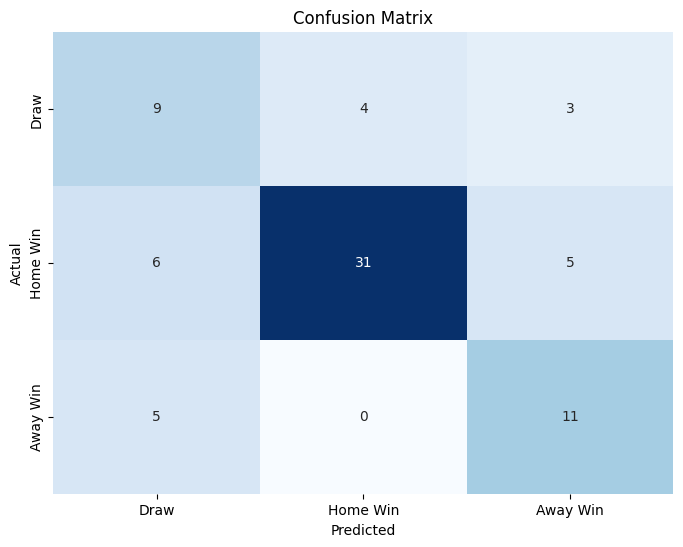

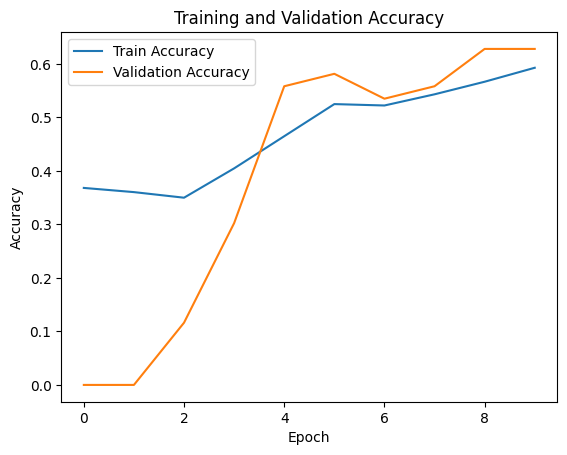

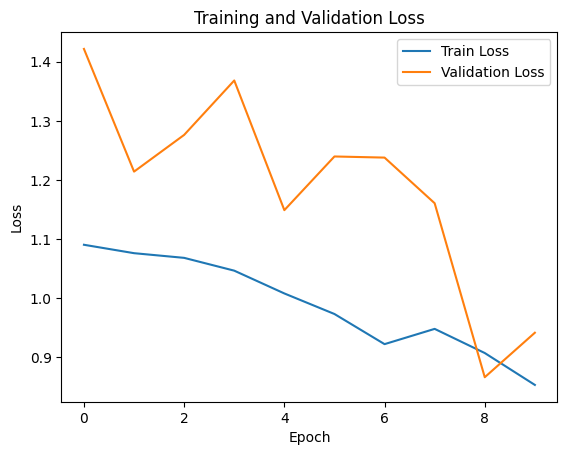

In [171]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined and prepared

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape data if necessary (assuming X_train is already reshaped appropriately for LSTM)
# X_train_resampled = X_train_resampled.values.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)

# Define the model
model2 = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the resampled data
history2 = model2.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate on test data
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
predictions = model2.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Draw', 'Home Win', 'Away Win']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
if 'accuracy' in history2.history:
    plt.plot(history2.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history2.history:
    plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

if 'loss' in history2.history:
    plt.plot(history2.history['loss'], label='Train Loss')
if 'val_loss' in history2.history:
    plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


##.  **LSTM WITH PLAYER DIMENSION**

---



In [172]:
rolling1

match_identifier       Date  Player_ID  \
0              2022-08-05_arsenal_crystal palace 2022-08-05         70   
1              2022-08-05_arsenal_crystal palace 2022-08-05         74   
2              2022-08-05_arsenal_crystal palace 2022-08-05        127   
3              2022-08-05_arsenal_crystal palace 2022-08-05        209   
4              2022-08-05_arsenal_crystal palace 2022-08-05        211   
...                                          ...        ...        ...   
13486  2023-05-28_crystal palace_nott'ham forest 2023-05-28        466   
13487           2023-05-28_fulham_manchester utd 2023-05-28        472   
13488  2023-05-28_crystal palace_nott'ham forest 2023-05-28        473   
13489          2023-05-28_leeds united_tottenham 2023-05-28        479   
13490         2023-05-28_leicester city_west ham 2023-05-28        481   

       Role_ID   Min  Venue_ID  Squad_ID  Opponent_ID  Home_Team_ID  \
0            3  74.0         1         6            0             6   
1            0   0.0         1         6            0             6   
2            3  85.0         1         6            0             6   
3            3   0.0         1         6            0             6   
4            1  33.0         1         6            0             6   
...        ...   ...       ...       ...          ...           ...   
13486        2  90.0         0        15            6             6   
13487        1  90.0         0         8           13            13   
13488        0  71.0         0        15            6             6   
13489        3  76.0         0        17            9             9   
13490        2  90.0         0        18           10            10   

       Away_Team_ID  PrgP_Passes_per_90_rolling_avg  \
0                 0                        7.297297   
1                 0                        0.000000   
2                 0                        0.000000   
3                 0                        0.000000   
4                 0                        0.000000   
...             ...                             ...   
13486            15                        0.000000   
13487             8                        5.116883   
13488            15                        0.422535   
13489            17                        9.728070   
13490            18                        0.000000   

       PrgC_Carries_per_90_rolling_avg  PrgDist_Total_per_90_rolling_avg  \
0                             2.432432                        200.675676   
1                             0.000000                          0.000000   
2                             1.058824                        126.000000   
3                             0.000000                          0.000000   
4                             2.727273                          0.000000   
...                                ...                               ...   
13486                         0.000000                        176.000000   
13487                         2.779221                        161.593074   
13488                         0.000000                         27.464789   
13489                         2.000000                        283.052632   
13490                         0.000000                        441.333333   

       Cmp_Long_per_90_rolling_avg  Final_Third_per_90_rolling_avg  \
0                         3.648649                        3.648649   
1                         0.000000                        0.000000   
2                         3.176471                        2.117647   
3                         0.000000                        0.000000   
4                         0.000000                        0.000000   
...                            ...                             ...   
13486                     2.333333                        0.333333   
13487                     4.558442                        0.779221   
13488                     0.845070                        0.000000   
13489           

In [173]:
# file_path = "/Users/mac/football Project python/version1"
# os.makedirs(file_path, exist_ok=True)

# per901.to_csv(os.path.join(file_path, "per901.csv"), index=False)
# rolling1.to_csv(os.path.join(file_path, "rolling1.csv"), index=False)

In [174]:
# from google.colab import files

# per901.to_csv("per901.csv", index=False)
# files.download("per901.csv")

# rolling1.to_csv("rolling1.csv", index=False)
# files.download("rolling1.csv")


In [175]:
rollingfeatures = ['PrgP_Passes_per_90_rolling_avg', 'PrgC_Carries_per_90_rolling_avg', 'PrgDist_Total_per_90_rolling_avg','Cmp_Long_per_90_rolling_avg',
           'Final_Third_per_90_rolling_avg', 'TB_Pass_Types_per_90_rolling_avg','TI_Pass_Types_per_90_rolling_avg','Att_Take_Ons_per_90_rolling_avg',
           'Succ_Take_Ons_per_90_rolling_avg','KP_per_90_rolling_avg','PPA_per_90_rolling_avg','CrsPA_per_90_rolling_avg',
           'Att 3rd_Tackles_per_90_rolling_avg','SoT_Performance_per_90_rolling_avg','PKwon_Performance_per_90_rolling_avg',
           'Cmp_Passes_per_90_rolling_avg', 'Cmp_Short_per_90_rolling_avg','Cmp_Medium_per_90_rolling_avg', 'Carries_Carries_per_90_rolling_avg',
           'Touches_Performance_per_90_rolling_avg','Cmp_Total_per_90_rolling_avg', 'Tkl+Int_per_90_rolling_avg', 'TklW_Tackles_per_90_rolling_avg',
           'Def 3rd_Tackles_per_90_rolling_avg','Mid 3rd_Tackles_per_90_rolling_avg','PKcon_Performance_per_90_rolling_avg',
           'Recov_Performance_per_90_rolling_avg','Won_Aerial_Duels_per_90_rolling_avg','Lost_Aerial_Duels_per_90_rolling_avg',
           'Clr_per_90_rolling_avg','Err_per_90_rolling_avg','Blocks_Blocks_per_90_rolling_avg','xG_Expected_per_90_rolling_avg',
           'npxG_Expected_per_90_rolling_avg', 'xAG_Expected_per_90_rolling_avg', 'SCA_SCA_per_90_rolling_avg','GCA_SCA_per_90_rolling_avg',
           'Ast_per_90_rolling_avg', 'xA_per_90_rolling_avg', 'xAG_per_90_rolling_avg', 'Cmp_percent_Long_rolling_avg',
           'Gls_Performance_per_90_rolling_avg', 'Crs_Performance_per_90_rolling_avg','attacking_score_rolling_avg',
           'possession_score_rolling_avg','defensive_score_rolling_avg']



In [176]:
len(rollingfeatures)

46

In [177]:
def extract_player_features(players_df, features, max_players=15):
    players_df = players_df[players_df['Min'] > 0]  # Filter out players with zero minutes
    players_df = players_df.sort_values(by='Min', ascending=False)
    top_players = players_df.head(max_players)
    feature_array = top_players[features].values.flatten()
    total_features = max_players * len(features)
    if len(feature_array) < total_features:
        feature_array = np.pad(feature_array, (0, total_features - len(feature_array)), 'constant')
    return feature_array

rolling_features = rollingfeatures + ['Player_ID']

In [ ]:
# rolling_features

In [178]:
def aggregate_match_features_and_labels(df, match_id, features):
    match_df = df[df['match_identifier'] == match_id]
    home_players = match_df[match_df['Venue_ID'] == 1]
    away_players = match_df[match_df['Venue_ID'] == 0]
    home_features = extract_player_features(home_players, features, max_players=15)
    away_features = extract_player_features(away_players, features, max_players=15)
    match_features = np.concatenate([home_features, away_features])
    label = match_df['Outcome'].iloc[0]
    return match_features, label


In [179]:
def create_feature_matrix_and_labels(df, features):
    match_ids = df['match_identifier'].unique()
    features_list = []
    labels_list = []
    for mid in match_ids:
        match_features, label = aggregate_match_features_and_labels(df, mid, features)
        features_list.append(match_features)
        labels_list.append(label)
    return np.array(features_list), np.array(labels_list)




In [180]:
train_data2 = rolling1[rolling1['Date'] < '2023-03-15']
test_data2 = rolling1[rolling1['Date'] >= '2023-03-15']


print(train_data2.shape, test_data2.shape)

(9536, 59) (3955, 59)


In [181]:

train_features2, train_labels2 = create_feature_matrix_and_labels(train_data2, rolling_features)
test_features2, test_labels2 = create_feature_matrix_and_labels(test_data2, rolling_features)

In [182]:
# Print shapes to confirm alignment
print("Train features shape:", train_features2.shape)
print("Test features shape:", test_features2.shape)
print("Train labels size:", train_labels2.shape)
print("Test labels size:", test_labels2.shape)

Train features shape: (261, 1410)
Test features shape: (119, 1410)
Train labels size: (261,)
Test labels size: (119,)


In [183]:
scaler = StandardScaler()
train_features2 = scaler.fit_transform(train_features2)
test_features2 = scaler.transform(test_features2)

train_features2 = train_features2.reshape(train_features2.shape[0], 1, -1)
test_features2 = test_features2.reshape(test_features2.shape[0], 1, -1)

In [184]:
import pickle

# Define the file path where you want to save the scaler
scaler_file_path = 'scaler.pkl'

# Save the scaler object to file
with open(scaler_file_path, 'wb') as f:
    pickle.dump(scaler, f)


In [185]:
# Print shapes to confirm alignment
print("Train features shape:", train_features2.shape)
print("Test features shape:", test_features2.shape)
print("Train labels size:", train_labels2.shape)
print("Test labels size:", test_labels2.shape)

Train features shape: (261, 1, 1410)
Test features shape: (119, 1, 1410)
Train labels size: (261,)
Test labels size: (119,)


In [186]:
from tensorflow.keras.utils import to_categorical

train_labels2 = to_categorical(train_labels2, num_classes=3)
test_labels2 = to_categorical(test_labels2, num_classes=3)


## **4. IMPROVED BACK PROPAGATION**

---



In [189]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Model architecture
modelmatch = Sequential([
    LSTM(64, input_shape=(1, 1410), return_sequences=True, dropout=0.2),
    LSTM(32, dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
modelmatch.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with stateful LSTMs and early stopping
history = modelmatch.fit(
    train_features2, train_labels2,
    epochs=100,  # Increased epoch count
    batch_size=32,
    validation_data=(test_features2, test_labels2),
    callbacks=[early_stopping]
)

# Evaluate the model
evaluation = modelmatch.evaluate(test_features2, test_labels2)
print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')

Epoch 1/100
9/9 [==============================] - 11s 206ms/step - loss: 1.0989 - accuracy: 0.3831 - val_loss: 1.0817 - val_accuracy: 0.5126
Epoch 2/100
9/9 [==============================] - 0s 26ms/step - loss: 1.0498 - accuracy: 0.5785 - val_loss: 1.0664 - val_accuracy: 0.5126
Epoch 3/100
9/9 [==============================] - 0s 25ms/step - loss: 1.0019 - accuracy: 0.6092 - val_loss: 1.0481 - val_accuracy: 0.5294
Epoch 4/100
9/9 [==============================] - 0s 22ms/step - loss: 0.9560 - accuracy: 0.6475 - val_loss: 1.0228 - val_accuracy: 0.5378
Epoch 5/100
9/9 [==============================] - 0s 23ms/step - loss: 0.8720 - accuracy: 0.6820 - val_loss: 0.9985 - val_accuracy: 0.5546
Epoch 6/100
9/9 [==============================] - 0s 24ms/step - loss: 0.7759 - accuracy: 0.7816 - val_loss: 0.9816 - val_accuracy: 0.5546
Epoch 7/100
9/9 [==============================] - 0s 31ms/step - loss: 0.6595 - accuracy: 0.8621 - val_loss: 0.9834 - val_accuracy: 0.5882
Epoch 8/100
9/9 [=

4/4 [==============================] - 0s 5ms/step - loss: 0.9816 - accuracy: 0.5546
Test Loss: 0.9816197156906128, Test Accuracy: 0.5546218752861023
4/4 [==============================] - 1s 5ms/step
Classification Report:
              precision    recall  f1-score   support

        Draw       0.22      0.08      0.12        25
    Home Win       0.58      0.87      0.70        60
    Away Win       0.57      0.35      0.44        34

    accuracy                           0.55       119
   macro avg       0.46      0.43      0.42       119
weighted avg       0.50      0.55      0.50       119

Confusion Matrix:
[[ 2 19  4]
 [ 3 52  5]
 [ 4 18 12]]


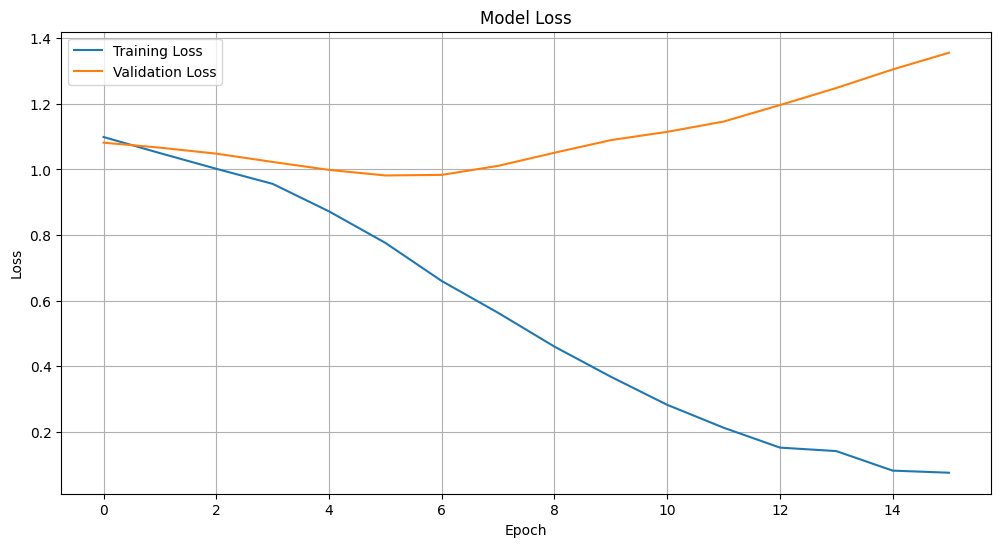

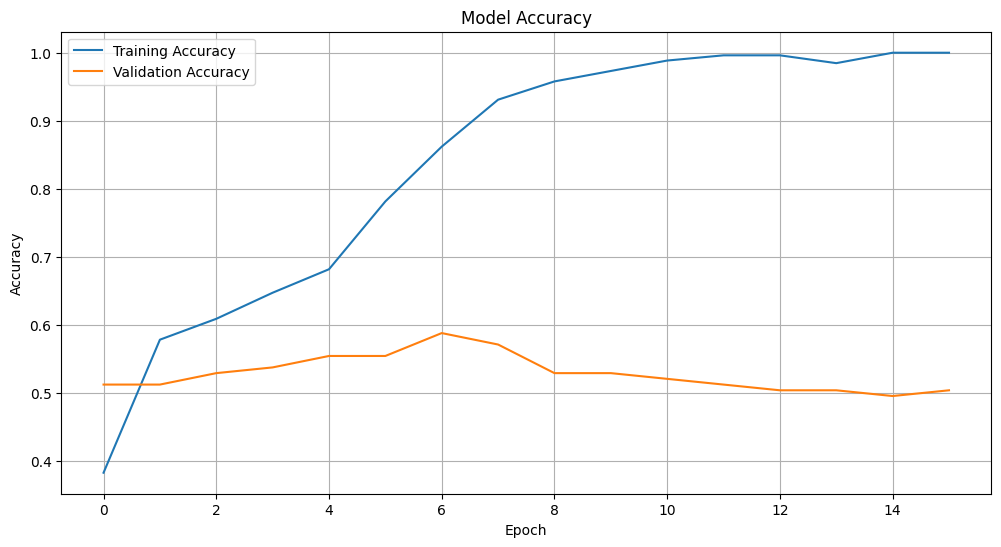

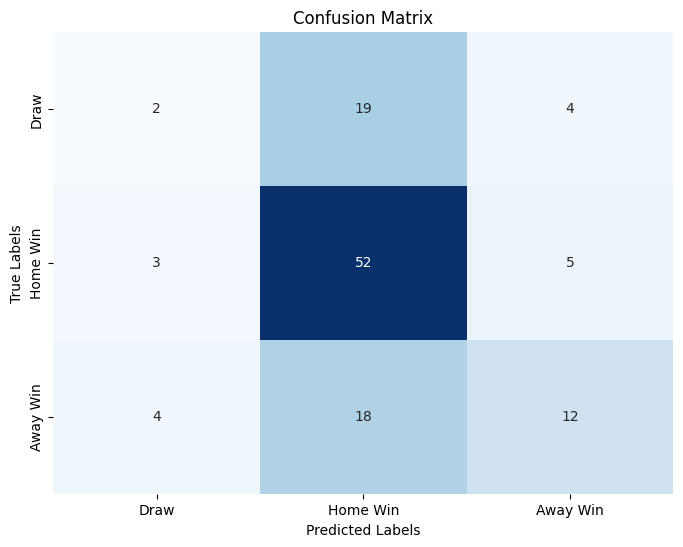

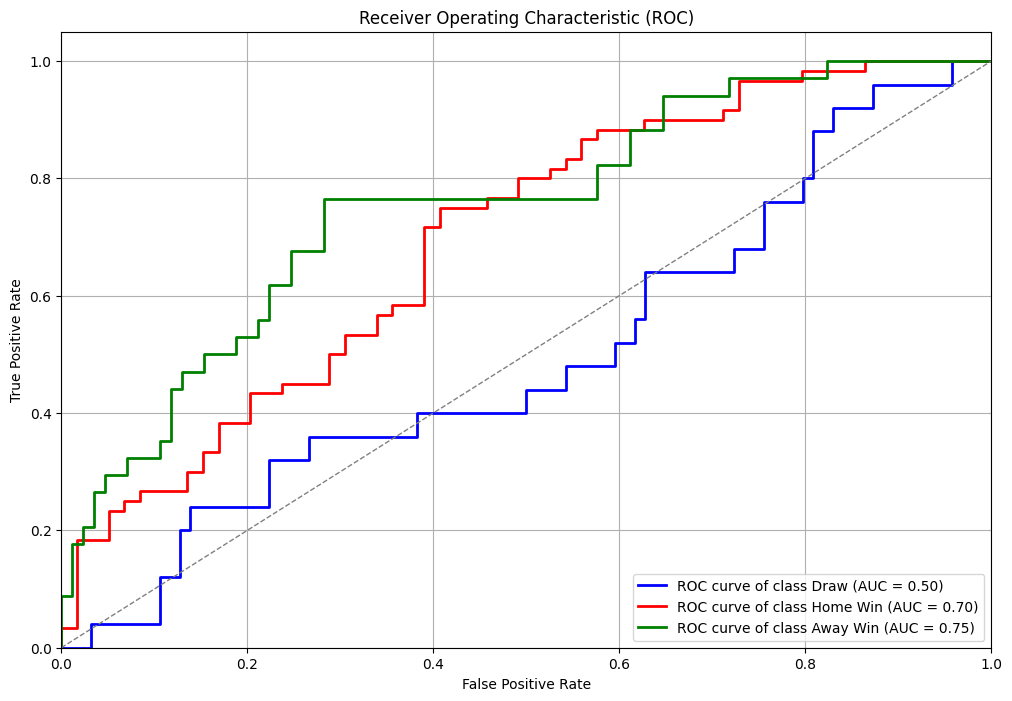

In [190]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Evaluate the model
evaluation = modelmatch.evaluate(test_features2, test_labels2)
print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')

# Predict probabilities for test set
y_pred_prob = modelmatch.predict(test_features2)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(test_labels2, axis=1)

# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=['Draw', 'Home Win', 'Away Win'])
print('Classification Report:')
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot confusion matrix (beautified version)
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home Win', 'Away Win'],
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Compute ROC curve and AUC for each class
num_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels2[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green']
class_names = ['Draw', 'Home Win', 'Away Win']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 4ms/step
   Actual  Predicted
0       2          1
1       1          1
2       2          1
3       0          1
4       0          1
Confusion Matrix:
 [[ 2 19  4]
 [ 3 52  5]
 [ 4 18 12]]


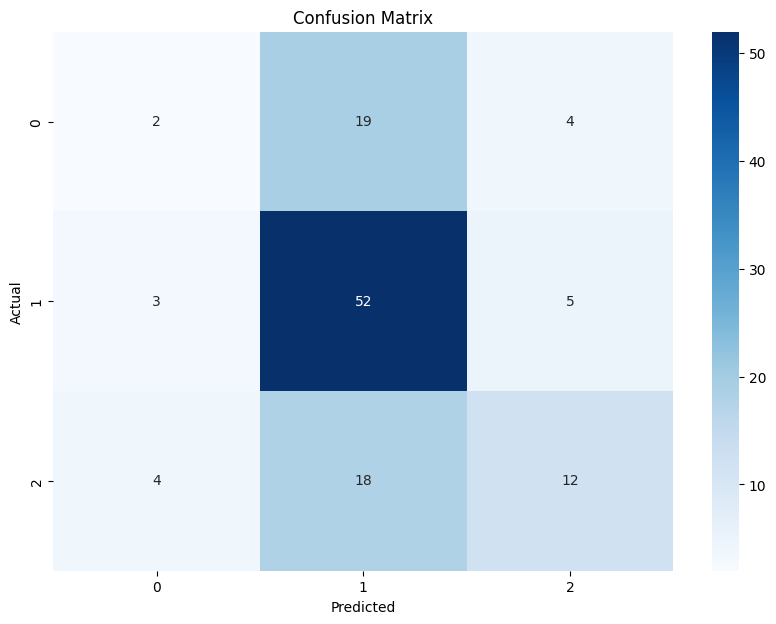

In [191]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test labels
predicted_labels = modelmatch.predict(test_features2)

# Assuming the labels are one-hot encoded, convert them to their class indices
predicted_labels_indices = np.argmax(predicted_labels, axis=1)
actual_labels_indices = np.argmax(test_labels2, axis=1)

# Create a DataFrame to store actual and predicted labels
results_df = pd.DataFrame({
    'Actual': actual_labels_indices,
    'Predicted': predicted_labels_indices
})

# Print the first few rows of the DataFrame
print(results_df.head())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(actual_labels_indices, predicted_labels_indices)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**TACKLING OVERFITTING IN OUR IMPROVED MODEL**

Epoch 1/100
9/9 [==============================] - 7s 139ms/step - loss: 1.4112 - accuracy: 0.2950 - val_loss: 1.3837 - val_accuracy: 0.3697 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 1.3750 - accuracy: 0.4023 - val_loss: 1.3538 - val_accuracy: 0.5042 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 1.3388 - accuracy: 0.4713 - val_loss: 1.3261 - val_accuracy: 0.4958 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 0s 17ms/step - loss: 1.3140 - accuracy: 0.4981 - val_loss: 1.2996 - val_accuracy: 0.5042 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 1.2852 - accuracy: 0.4904 - val_loss: 1.2741 - val_accuracy: 0.5042 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 0s 16ms/step - loss: 1.2553 - accuracy: 0.5057 - val_loss: 1.2503 - val_accuracy: 0.5042 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 0s 16ms/step - loss: 1.2368 - 

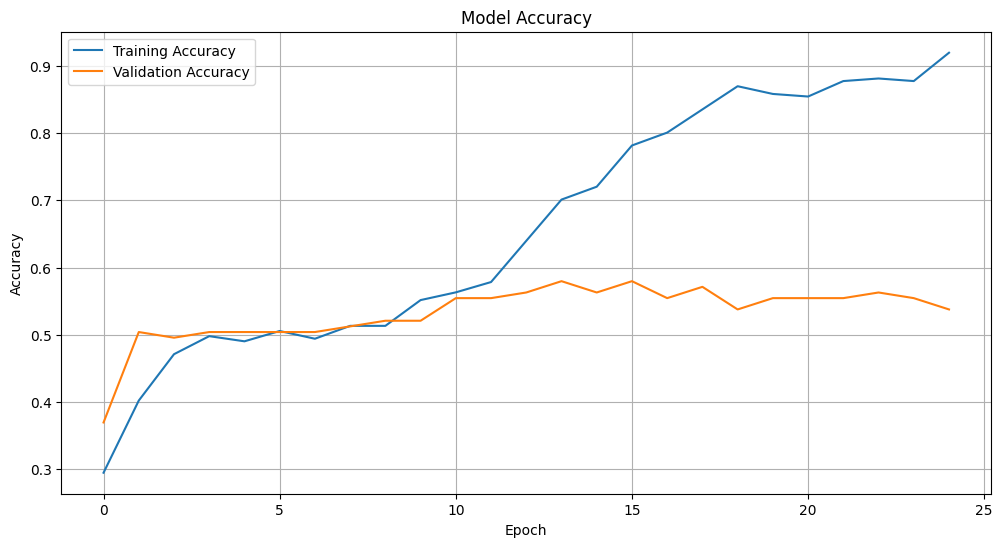

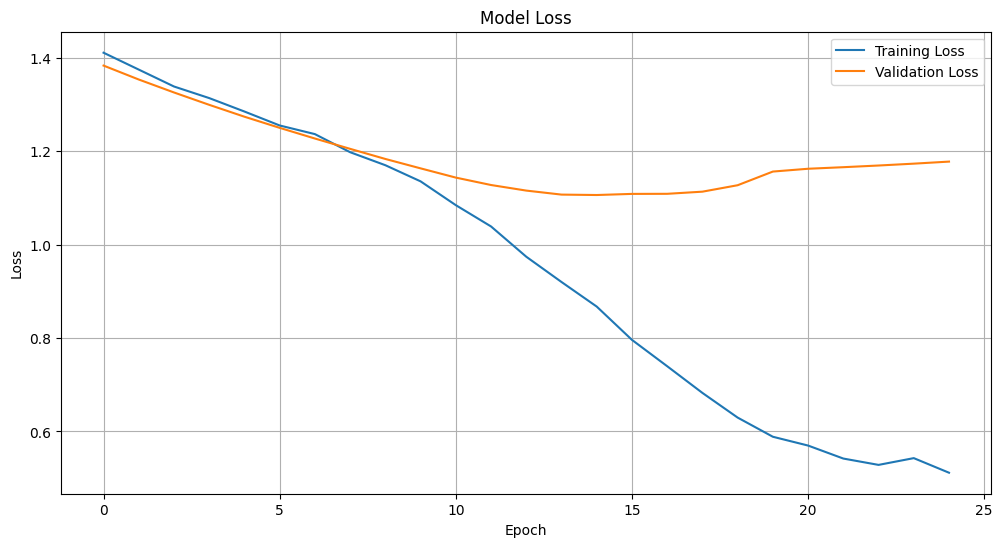

In [192]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define your model architecture with regularization and dropout
modelmatch2 = Sequential([
    LSTM(64, input_shape=(1, 1410), return_sequences=True, dropout=0.5),
    LSTM(32, dropout=0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
modelmatch2.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Setup early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with early stopping and dropout regularization
history = modelmatch2.fit(
    train_features2, train_labels2,
    epochs=100,
    batch_size=32,
    validation_data=(test_features2, test_labels2),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on test data
evaluation = modelmatch2.evaluate(test_features2, test_labels2)
print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')

# Generate predictions
y_pred = modelmatch2.predict(test_features2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels2, axis=1)

# Print classification report
class_report = classification_report(y_true, y_pred_classes, target_names=['Draw', 'Home Win', 'Away Win'])
print('Classification Report:')
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [194]:
# ## reducing learning rate

# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l2
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np

# # Define your model architecture with regularization and dropout
# modelmatch2 = Sequential([
#     LSTM(64, input_shape=(1, 1410), return_sequences=True, dropout=0.5),
#     LSTM(32, dropout=0.5),
#     Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
#     Dropout(0.5),
#     Dense(3, activation='softmax')
# ])

# # Compile the model with Adam optimizer and categorical crossentropy loss
# modelmatch2.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Setup early stopping to monitor validation loss
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Reduce learning rate on plateau
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# # Train the model with early stopping and dropout regularization
# history = modelmatch2.fit(
#     train_features2, train_labels2,
#     epochs=100,
#     batch_size=32,
#     validation_data=(test_features2, test_labels2),
#     callbacks=[early_stopping, reduce_lr],
#     class_weight={0: 1, 1: 1, 2: 1}  # Adjust class weights as needed
# )

# # Evaluate the model on test data
# evaluation = modelmatch2.evaluate(test_features2, test_labels2)
# print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')

# # Generate predictions
# y_pred = modelmatch2.predict(test_features2)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(test_labels2, axis=1)

# # Print classification report
# class_report = classification_report(y_true, y_pred_classes, target_names=['Draw', 'Home Win', 'Away Win'])
# print('Classification Report:')
# print(class_report)

# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred_classes)
# print('Confusion Matrix:')
# print(conf_matrix)

# # Plot training & validation accuracy values
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot training & validation loss values
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot confusion matrix (beautified version)
# import seaborn as sns

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Draw', 'Home Win', 'Away Win'],
#             yticklabels=['Draw', 'Home Win', 'Away Win'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()




# # Compute ROC curve and AUC for each class
# num_classes = 3
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(num_classes):
#     fpr[i], tpr[i], _ = roc_curve(test_labels2[:, i], y_pred_prob[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curve for each class
# plt.figure(figsize=(12, 8))
# colors = ['blue', 'red', 'green']
# class_names = ['Draw', 'Home Win', 'Away Win']
# for i, color in zip(range(num_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label='ROC curve of class {0} (AUC = {1:0.2f})'.format(class_names[i], roc_auc[i]))

# plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.grid(True)
# plt.show()

## **Using Improved Model to make Real-life prediction**

In [195]:
# Fetch the latest match date for Manchester United
man_united_last_date = rolling1[rolling1['Squad_ID'] == 13]['Date'].max()
man_united_last_match = rolling1[(rolling1['Squad_ID'] == 13) & (rolling1['Date'] == man_united_last_date)]
# Exclude players with zero minutes, then sort by minutes played and select top 15
man_united_last_match = man_united_last_match[man_united_last_match['Min'] > 0].sort_values(by='Min', ascending=False).head(15)

# Fetch the latest match date for Arsenal
arsenal_last_date = rolling1[rolling1['Squad_ID'] == 0]['Date'].max()
arsenal_last_match = rolling1[(rolling1['Squad_ID'] == 0) & (rolling1['Date'] == arsenal_last_date)]
# Exclude players with zero minutes, then sort by minutes played and select top 15
arsenal_last_match = arsenal_last_match[arsenal_last_match['Min'] > 0].sort_values(by='Min', ascending=False).head(15)


In [196]:
arsenal_last_match

match_identifier       Date  Player_ID  Role_ID   Min  \
13177  2023-05-28_arsenal_wolves 2023-05-28          2        2  90.0   
13190  2023-05-28_arsenal_wolves 2023-05-28         45        0  90.0   
13232  2023-05-28_arsenal_wolves 2023-05-28        153        1  90.0   
13260  2023-05-28_arsenal_wolves 2023-05-28        235        3  90.0   
13320  2023-05-28_arsenal_wolves 2023-05-28        445        3  90.0   
13243  2023-05-28_arsenal_wolves 2023-05-28        190        0  79.0   
13272  2023-05-28_arsenal_wolves 2023-05-28        272        1  79.0   
13234  2023-05-28_arsenal_wolves 2023-05-28        159        3  74.0   
13284  2023-05-28_arsenal_wolves 2023-05-28        314        3  74.0   
13196  2023-05-28_arsenal_wolves 2023-05-28         60        1  59.0   
13304  2023-05-28_arsenal_wolves 2023-05-28        386        1  31.0   
13227  2023-05-28_arsenal_wolves 2023-05-28        146        3  16.0   
13221  2023-05-28_arsenal_wolves 2023-05-28        128        1  11.0   
13267  2023-05-28_arsenal_wolves 2023-05-28        262        0  11.0   

       Venue_ID  Squad_ID  Opponent_ID  Home_Team_ID  Away_Team_ID  \
13177         1         0           19             0            19   
13190         1         0           19             0            19   
13232         1         0           19             0            19   
13260         1         0           19             0            19   
13320         1         0           19             0            19   
13243         1         0           19             0            19   
13272         1         0           19             0            19   
13234         1         0           19             0            19   
13284         1         0           19             0            19   
13196         1         0           19             0            19   
13304         1         0           19             0            19   
13227         1         0           19             0            19   
13221         1         0           19             0            19   
13267         1         0           19             0            19   

       PrgP_Passes_per_90_rolling_avg  PrgC_Carries_per_90_rolling_avg  \
13177                        0.000000                         0.000000   
13190                        5.666667                         2.666667   
13232                        1.728070                         1.789474   
13260                       10.192090                         2.000000   
13320                        9.301075                         3.000000   
13243                        1.817204                         0.000000   
13272                        3.613370                         2.051594   
13234                        1.803156                         0.000000   
13284                        7.267662                         3.016358   
13196                        3.350282                         6.050847   
13304                        1.935484                         4.838710   
13227                        8.928571                         1.428571   
13221                        0.000000                         0.000000   
13267                        7.930736                         1.071429   

       PrgDist_Total_per_90_rolling_avg  Cmp_Long_per_90_rolling_avg  \
13177                        367.666667                     3.333333   
13190                        326.333333                     1.333333   
13232                         43.622807                     0.728070   
13260                        301.740113                     3.175141   
13320                        308.795699                     4.634409   
13243                        187.590853                     0.333333   
13272                        121.138930                     2.094382   
13234                         51.657160                     0.889276   
13284                        148.079896                     2.133476   
13196                        100.75706

In [206]:
# Assuming man_united_id and arsenal_id are known and represent Manchester United and Arsenal

man_united_id = 13
arsenal_id = 0

# Function to extract features for the latest performance of top 15 players
def extract_latest_player_features(df, squad_id, features, max_players=15):
    recent_players = df[df['Squad_ID'] == squad_id].sort_values(by='Date', ascending=False)
    recent_players = recent_players.drop_duplicates(subset='Player_ID', keep='first')
    filtered_players = recent_players[recent_players['Min'] > 0].sort_values(by='Min', ascending=False).head(max_players)
    feature_array = filtered_players[features].values.flatten()
    expected_length = max_players * len(features)
    if len(feature_array) < expected_length:
        feature_array = np.pad(feature_array, (0, expected_length - len(feature_array)), 'constant')
    return feature_array

# Define the rolling features
# rolling_features = [f + '_rolling_avg' for f in ['Gls_Performance', 'Ast_Performance', 'Touches_Performance', 'Cmp_Passes', 'PrgP_Passes']] + ['Player_ID']
rolling_features = rollingfeatures + ['Player_ID']

# Extract features for both teams using the predefined function
man_united_features = extract_latest_player_features(rolling1, man_united_id, rolling_features, max_players=15)
arsenal_features = extract_latest_player_features(rolling1, arsenal_id, rolling_features, max_players=15)

# Combine features and prepare for model input
match_features = np.concatenate([man_united_features, arsenal_features])
match_features = match_features.reshape(1, -1)  # Flatten for scaler

# Scale the features using the pre-fitted scaler
match_features_scaled = scaler.transform(match_features)
match_features_scaled = match_features_scaled.reshape(1, 1, -1)  # Reshape for LSTM input

# Predict the outcome using the model
prediction = model.predict(match_features_scaled)
predicted_class = np.argmax(prediction, axis=-1)

# Mapping the predicted class to outcome
outcome_mapping = {0: "Draw", 1: "Home Win (Manchester United)", 2: "Away Win (Arsenal)"}
predicted_outcome = outcome_mapping[predicted_class[0]]
print("Predicted Match Outcome:", predicted_outcome)


1/1 [==============================] - 0s 38ms/step
Predicted Match Outcome: Draw


## **shuffle the players to see the difference**

---



In [207]:
man_united_id = 13
arsenal_id = 0

# Function to extract features for the latest performance of top 15 players with shuffling
def extract_latest_player_features_shuffled(df, squad_id, features, max_players=15):
    recent_players = df[df['Squad_ID'] == squad_id].sort_values(by='Date', ascending=False)
    recent_players = recent_players.drop_duplicates(subset='Player_ID', keep='first')
    # Filter players with non-zero minutes and shuffle before selecting top players
    recent_players = recent_players[recent_players['Min'] > 0].sample(frac=1).head(max_players)
    feature_array = recent_players[features].values.flatten()
    expected_length = max_players * len(features)
    if len(feature_array) < expected_length:
        feature_array = np.pad(feature_array, (0, expected_length - len(feature_array)), 'constant')
    return feature_array

# Define the rolling features
rolling_features = rollingfeatures + ['Player_ID']

# Extract features for both teams using the updated function with shuffling
man_united_features = extract_latest_player_features_shuffled(rolling1, man_united_id, rolling_features, max_players=15)
arsenal_features = extract_latest_player_features_shuffled(rolling1, arsenal_id, rolling_features, max_players=15)

# Combine features and prepare for model input
match_features = np.concatenate([man_united_features, arsenal_features])
match_features = match_features.reshape(1, -1)  # Flatten for scaler

# Scale the features using the pre-fitted scaler
match_features_scaled = scaler.transform(match_features)
match_features_scaled = match_features_scaled.reshape(1, 1, -1)  # Reshape for LSTM input

# Predict the outcome using the model
prediction = model.predict(match_features_scaled)
predicted_class = np.argmax(prediction, axis=-1)

# Mapping the predicted class to outcome
outcome_mapping = {0: "Draw", 1: "Home Win (Manchester United)", 2: "Away Win (Arsenal)"}
predicted_outcome = outcome_mapping[predicted_class[0]]
print("Predicted Match Outcome:", predicted_outcome)


1/1 [==============================] - 0s 34ms/step
Predicted Match Outcome: Home Win (Manchester United)


In [208]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Predict probabilities for test data
y_pred_prob = modelmatch.predict(test_features2)

# Convert test_labels2 to categorical labels (if it's one-hot encoded)
y_true = np.argmax(test_labels2, axis=1)

# Compute ROC AUC for each class
roc_auc = roc_auc_score(test_labels2, y_pred_prob, multi_class='ovr', average='macro')

print(f"ROC AUC (Macro): {roc_auc}")

# Optionally, you can also compute micro-average ROC AUC
roc_auc_micro = roc_auc_score(test_labels2, y_pred_prob, multi_class='ovr', average='micro')
print(f"ROC AUC (Micro): {roc_auc_micro}")


4/4 [==============================] - 0s 12ms/step
ROC AUC (Macro): 0.6491624070910617
ROC AUC (Micro): 0.7229009250759127


## **BALL POSSESSION**

---



In [209]:

def extract_player_features22(players_df, features, max_players=15):
    players_df = players_df[players_df['Min'] > 0]
    players_df = players_df.sort_values(by='Min', ascending=False)
    top_players = players_df.head(max_players)
    feature_array = top_players[features].values.flatten()
    total_features = max_players * len(features)
    if len(feature_array) < total_features:
        feature_array = np.pad(feature_array, (0, total_features - len(feature_array)), 'constant')
    return feature_array

rolling_features = rollingfeatures + ['Player_ID']

def aggregate_match_features_and_labels22(df, match_id, features):
    match_df = df[df['match_identifier'] == match_id]
    home_players = match_df[match_df['Venue_ID'] == 1]
    away_players = match_df[match_df['Venue_ID'] == 0]
    home_features = extract_player_features22(home_players, features, max_players=15)
    away_features = extract_player_features22(away_players, features, max_players=15)
    match_features = np.concatenate([home_features, away_features])
    labels = match_df[['Home_Possession', 'Away_Possession']].iloc[0].values
    return match_features, labels

def create_feature_matrix_and_labels22(df, features):
    match_ids = df['match_identifier'].unique()
    features_list = []
    labels_list = []
    for mid in match_ids:
        match_features, labels = aggregate_match_features_and_labels22(df, mid, features)
        features_list.append(match_features)
        labels_list.append(labels)
    return np.array(features_list), np.array(labels_list)

In [210]:
train_data22 = rolling1[rolling1['Date'] < '2023-03-15']
test_data22 = rolling1[rolling1['Date'] >= '2023-03-15']


print(train_data22.shape, test_data22.shape)

(9536, 59) (3955, 59)


In [211]:
train_features22, train_labels22 = create_feature_matrix_and_labels22(train_data22, rolling_features)
test_features22, test_labels22 = create_feature_matrix_and_labels22(test_data22, rolling_features)

In [212]:
# Print shapes to confirm alignment
print("Train features shape:", train_features22.shape)
print("Test features shape:", test_features22.shape)
print("Train labels size:", train_labels22.shape)
print("Test labels size:", test_labels22.shape)

Train features shape: (261, 1410)
Test features shape: (119, 1410)
Train labels size: (261, 2)
Test labels size: (119, 2)


In [213]:
# Scale the features
scaler = StandardScaler()
train_features22 = scaler.fit_transform(train_features22)
test_features22 = scaler.transform(test_features22)

# Reshape back to 3D for LSTM
train_features22 = train_features22.reshape(train_features22.shape[0], 1, -1)
test_features22 = test_features22.reshape(test_features22.shape[0], 1, -1)


In [ ]:
# scaler = StandardScaler()

# train_features22 = scaler.fit_transform(train_features22)
# test_features22 = scaler.transform(test_features22)


# train_features22 = train_features22.reshape(train_features22.shape[0], 1, -1)
# test_features22 = test_features22.reshape(test_features22.shape[0], 1, -1)

In [ ]:
# # Print shapes to confirm alignment
# print("Train features shape:", train_features22.shape)
# print("Test features shape:", test_features22.shape)
# print("Train labels size:", train_labels22.shape)
# print("Test labels size:", test_labels22.shape)

In [214]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Reshape features for scaling
train_features_reshaped = train_features22.reshape(-1, train_features22.shape[-1])
test_features_reshaped = test_features22.reshape(-1, test_features22.shape[-1])

# Standardize the features
scaler_features = StandardScaler()
train_features_scaled = scaler_features.fit_transform(train_features_reshaped).reshape(train_features22.shape)
test_features_scaled = scaler_features.transform(test_features_reshaped).reshape(test_features22.shape)

# Standardize the labels
scaler_labels = StandardScaler()
train_labels_scaled = scaler_labels.fit_transform(train_labels22)
test_labels_scaled = scaler_labels.transform(test_labels22)

# Define the model architecture
model = Sequential([
    LSTM(128, input_shape=(1, train_features_scaled.shape[2]), return_sequences=True),
    LSTM(64),
    Dense(2)  # No activation function for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary
model.summary()

# Fit the model
history22 = model.fit(train_features_scaled, train_labels_scaled, epochs=100, batch_size=32, validation_split=0.2)




# Evaluate the model
loss, mae = model.evaluate(test_features_scaled, test_labels_scaled)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# Generate predictions
predictions_scaled = model.predict(test_features_scaled)
predictions = scaler_labels.inverse_transform(predictions_scaled)  # Transform predictions back to original scale

# Normalize predictions to ensure they sum to 100
predictions_sum = np.sum(predictions, axis=1, keepdims=True)
normalized_predictions = (predictions / predictions_sum) * 100

# Inverse transform the test labels to original scale
test_labels_original = scaler_labels.inverse_transform(test_labels_scaled)

# Calculate metrics
mse = mean_squared_error(test_labels_original, normalized_predictions)
mae = mean_absolute_error(test_labels_original, normalized_predictions)
r2 = r2_score(test_labels_original, normalized_predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'RMSE: {rmse}')


# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Match_ID': test_data22['match_identifier'].unique(),
    'Actual_Home_Possession': test_labels_original[:, 0],
    'Actual_Away_Possession': test_labels_original[:, 1],
    'Predicted_Home_Possession': normalized_predictions[:, 0],
    'Predicted_Away_Possession': normalized_predictions[:, 1]
})

# Display the DataFrame
results_df


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 128)            787968    
                                                                 
 lstm_15 (LSTM)              (None, 64)                49408     
                                                                 
 dense_14 (Dense)            (None, 2)                 130       
                                                                 
Total params: 837506 (3.19 MB)
Trainable params: 837506 (3.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 11s 297ms/step - loss: 0.8500 - mae: 0.7671 - val_loss: 0.8815 - val_mae: 0.8109
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 0.4443 - mae: 0.5382 - val_loss: 0.5804 - val_mae: 0.6565
Epoch 3/100
7/7 [===

Match_ID  Actual_Home_Possession  \
0             2023-03-15_brentford_southampton                    66.0   
1           2023-03-15_brighton_crystal palace                    57.0   
2     2023-03-17_newcastle utd_nott'ham forest                    39.0   
3          2023-03-18_brentford_leicester city                    53.0   
4             2023-03-18_southampton_tottenham                    51.0   
..                                         ...                     ...   
114  2023-05-28_crystal palace_nott'ham forest                    66.0   
115            2023-05-28_aston villa_brighton                    41.0   
116         2023-05-28_leicester city_west ham                    48.0   
117          2023-05-28_leeds united_tottenham                    52.0   
118           2023-05-28_chelsea_newcastle utd                    64.0   

     Actual_Away_Possession  Predicted_Home_Possession  \
0                      34.0                  49.496925   
1                      43.0                  62.379776   
2                      61.0                  43.156937   
3                      47.0                  53.138779   
4                      49.0                  49.637691   
..                      ...                        ...   
114                    34.0                  60.687859   
115                    59.0                  36.978600   
116                    52.0                  46.140800   
117                    48.0                  49.873508   
118                    36.0                  47.884308   

     Predicted_Away_Possession  
0                    50.503082  
1                    37.620224  
2                    56.843060  
3                    46.861217  
4                    50.362312  
..                         ...  
114                  39.312145  
115                  63.021404  
116                  53.859200  
117                  50.126488  
118                  52.115692  

[119 rows x 5 columns]

In [ ]:
# results_df.head(60)

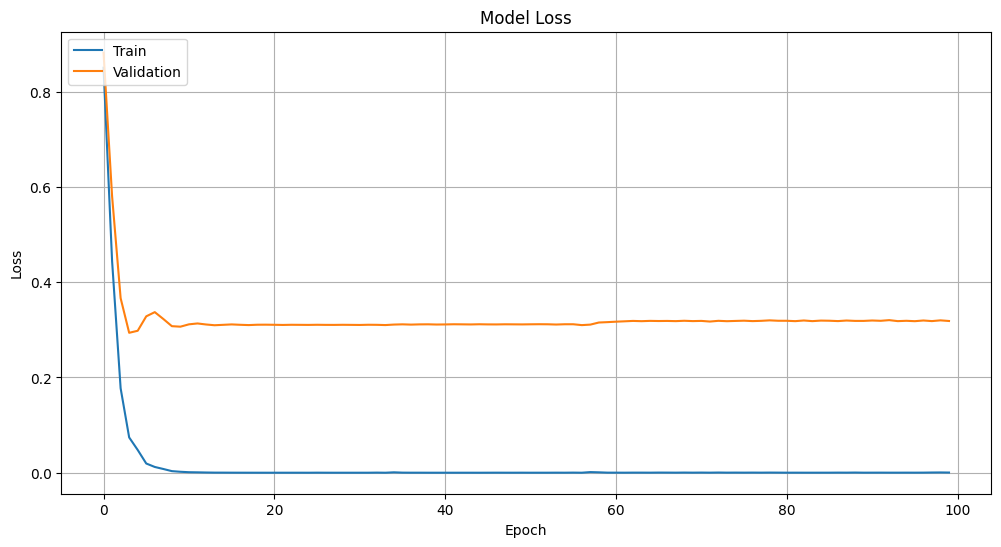

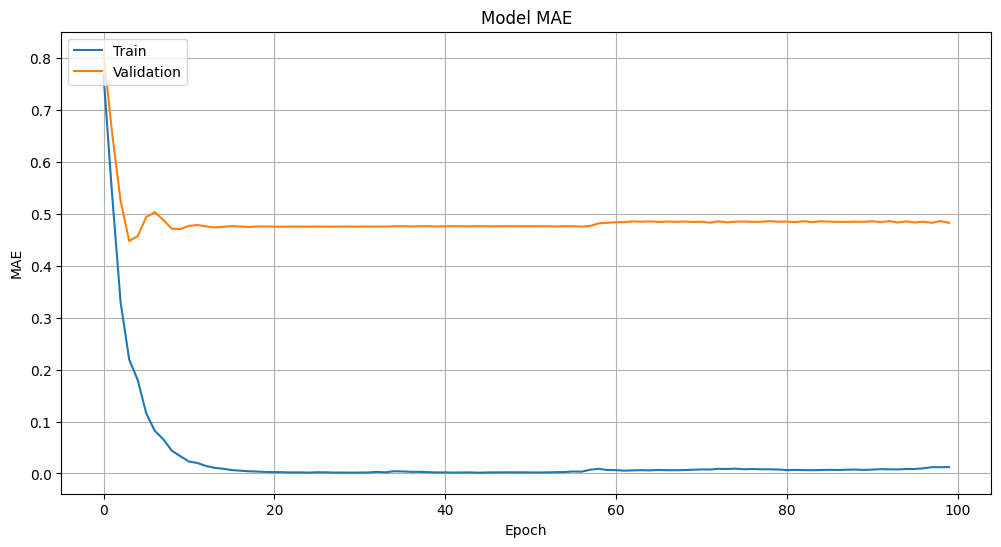

In [215]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history22.history['loss'])
plt.plot(history22.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history22.history['mae'])
plt.plot(history22.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()


In [216]:
## Improve the regression ball possession prediction

In [217]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Reshape features for scaling
train_features_reshaped = train_features22.reshape(-1, train_features22.shape[-1])
test_features_reshaped = test_features22.reshape(-1, test_features22.shape[-1])

# Standardize the features
scaler_features = StandardScaler()
train_features_scaled = scaler_features.fit_transform(train_features_reshaped).reshape(train_features22.shape)
test_features_scaled = scaler_features.transform(test_features_reshaped).reshape(test_features22.shape)

# Standardize the labels
scaler_labels = StandardScaler()
train_labels_scaled = scaler_labels.fit_transform(train_labels22)
test_labels_scaled = scaler_labels.transform(test_labels22)

# Define the model architecture with Dropout and BatchNormalization
modelpossession = Sequential([
    LSTM(128, input_shape=(1, train_features_scaled.shape[2]), return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(2)  # No activation function for regression
])

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
modelpossession.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Print the model summary
modelpossession.summary()

# Fit the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = modelpossession.fit(train_features_scaled, train_labels_scaled, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, mae = modelpossession.evaluate(test_features_scaled, test_labels_scaled)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# Generate predictions
predictions_scaled = modelpossession.predict(test_features_scaled)
predictions = scaler_labels.inverse_transform(predictions_scaled)  # Transform predictions back to original scale

# Normalize predictions to ensure they sum to 100
predictions_sum = np.sum(predictions, axis=1, keepdims=True)
normalized_predictions = (predictions / predictions_sum) * 100

# Inverse transform the test labels to original scale
test_labels_original = scaler_labels.inverse_transform(test_labels_scaled)

# Calculate metrics
mse = mean_squared_error(test_labels_original, normalized_predictions)
mae = mean_absolute_error(test_labels_original, normalized_predictions)
r2 = r2_score(test_labels_original, normalized_predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'RMSE: {rmse}')

# Assuming test_data22 contains a 'match_identifier' column
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Match_ID': test_data22['match_identifier'].unique(),
    'Actual_Home_Possession': test_labels_original[:, 0],
    'Actual_Away_Possession': test_labels_original[:, 1],
    'Predicted_Home_Possession': normalized_predictions[:, 0],
    'Predicted_Away_Possession': normalized_predictions[:, 1]
})

# Display the DataFrame
results_df


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 128)            787968    
                                                                 
 batch_normalization (Batch  (None, 1, 128)            512       
 Normalization)                                                  
                                                                 
 dropout_9 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                      

Match_ID  Actual_Home_Possession  \
0             2023-03-15_brentford_southampton                    66.0   
1           2023-03-15_brighton_crystal palace                    57.0   
2     2023-03-17_newcastle utd_nott'ham forest                    39.0   
3          2023-03-18_brentford_leicester city                    53.0   
4             2023-03-18_southampton_tottenham                    51.0   
..                                         ...                     ...   
114  2023-05-28_crystal palace_nott'ham forest                    66.0   
115            2023-05-28_aston villa_brighton                    41.0   
116         2023-05-28_leicester city_west ham                    48.0   
117          2023-05-28_leeds united_tottenham                    52.0   
118           2023-05-28_chelsea_newcastle utd                    64.0   

     Actual_Away_Possession  Predicted_Home_Possession  \
0                      34.0                  50.296276   
1                      43.0                  63.670273   
2                      61.0                  39.887981   
3                      47.0                  53.290474   
4                      49.0                  51.215767   
..                      ...                        ...   
114                    34.0                  62.129612   
115                    59.0                  34.410511   
116                    52.0                  44.541138   
117                    48.0                  49.487228   
118                    36.0                  49.460472   

     Predicted_Away_Possession  
0                    49.703728  
1                    36.329735  
2                    60.112019  
3                    46.709522  
4                    48.784237  
..                         ...  
114                  37.870388  
115                  65.589493  
116                  55.458855  
117                  50.512772  
118                  50.539528  

[119 rows x 5 columns]

## **Convert the ball possession -regression task- to a -classification task- that predicts team that has the highest ball possession**

Epoch 1/100
9/9 [==============================] - 3s 81ms/step - loss: 0.5909 - accuracy: 0.7548 - val_loss: 0.5014 - val_accuracy: 0.7815
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 0.2876 - accuracy: 0.9732 - val_loss: 0.4420 - val_accuracy: 0.7983
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1836 - accuracy: 0.9962 - val_loss: 0.4242 - val_accuracy: 0.7899
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1313 - accuracy: 1.0000 - val_loss: 0.4186 - val_accuracy: 0.7815
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0954 - accuracy: 1.0000 - val_loss: 0.4159 - val_accuracy: 0.7815
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0733 - accuracy: 1.0000 - val_loss: 0.4172 - val_accuracy: 0.7815
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0570 - accuracy: 1.0000 - val_loss: 0.4184 - val_accuracy: 0.7899
Epoch 8/100
9/9 [===

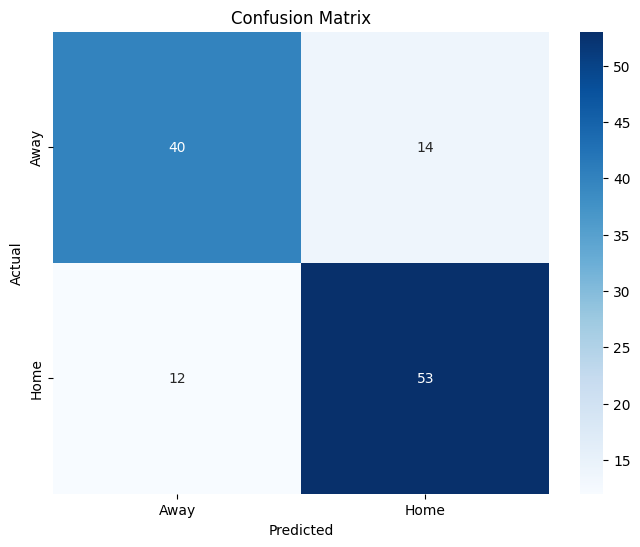

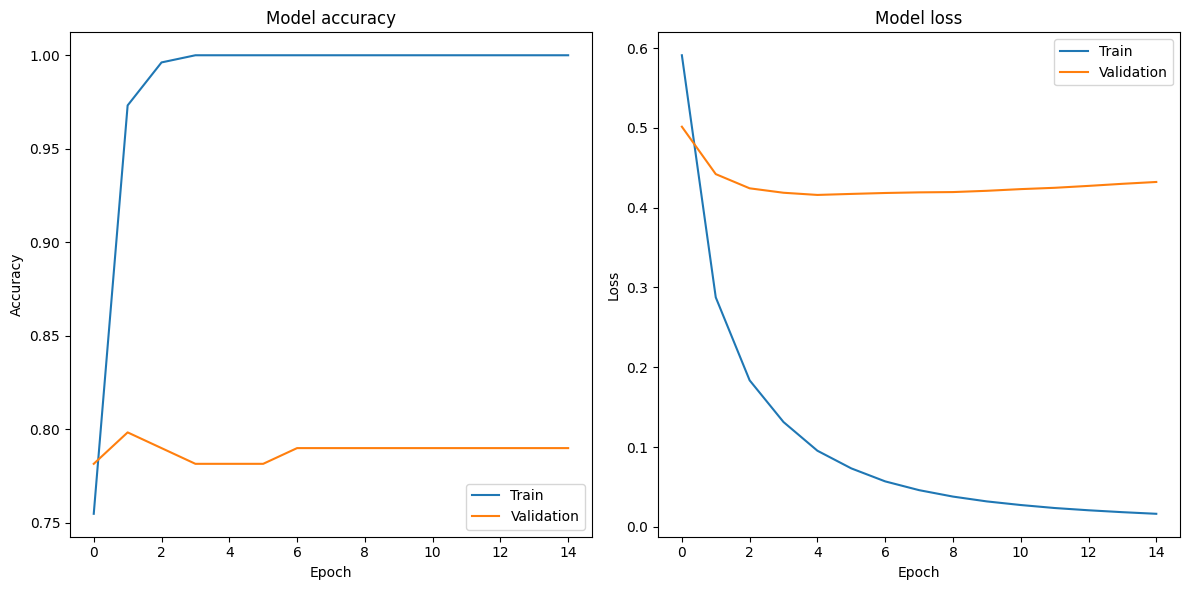

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust labels for classification (1 if home possession > away possession, else 0)
train_labels_class = (train_labels22[:, 0] > train_labels22[:, 1]).astype(int)
test_labels_class = (test_labels22[:, 0] > test_labels22[:, 1]).astype(int)

# Model definition
model = Sequential([
    LSTM(64, input_shape=(1, 1410)),
    Dense(1, activation='sigmoid')  # Output probability of home team having higher possession
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    train_features22, train_labels_class,
    epochs=100,
    batch_size=32,
    validation_data=(test_features22, test_labels_class),
    callbacks=[early_stopping]
)

# Evaluate the model
evaluation = model.evaluate(test_features22, test_labels_class)
print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')

# Predict the probability of home team having higher possession
predicted_probabilities = model.predict(test_features22)

# Predict class based on probability threshold (0.5)
predicted_class = (predicted_probabilities > 0.5).astype(int).flatten()

# Print classification report
print("\nClassification Report:")
print(classification_report(test_labels_class, predicted_class))

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Away', 'Home'], yticklabels=['Away', 'Home'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(test_labels_class, predicted_class)

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)


# **-----Prepping for Deployment---------**

In [219]:
# Save the model
modelmatch.save('/content/match_outcome_model.h5')
modelpossession.save('/content/possession_model.h5')

In [220]:
from google.colab import files

# Download the models
files.download('/content/match_outcome_model.h5')
files.download('/content/possession_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [221]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
# !pip install tensorflow==2.8.0

In [222]:
# from google.colab import drive
# drive.mount('/content/drive')


In [223]:
# import keras
# print(keras.__version__)
# 2.15.0

# import tensorflow as tf
# print(tf.__version__)

# 2.15.0

In [224]:
# import tensorflow as tf
# print(tf.__version__)


In [228]:
# import joblib

# # Example: Saving label_encoders to Colab's temporary storage
# file_path = '/content/label_encoders.joblib'
# joblib.dump(label_encoders, file_path)


In [227]:
# from google.colab import files
# files.download(file_path)


In [ ]:
# # Use reticulate to load the Python environment and Keras models
# use_virtualenv("/Users/mac/your_virtualenv")

# # Load the models
# modelmatch <- load_model_hdf5("/Users/mac/R-footballscripts/PlayerPulse/PlayerPulse/PredictPlayer/match_outcome_model.h5")
# modelpossession <- load_model_hdf5("/Users/mac/R-footballscripts/PlayerPulse/PlayerPulse/PredictPlayer/possession_model.h5")


In [ ]:
# import joblib
# from sklearn.preprocessing import LabelEncoder

# # Load existing LabelEncoder objects
# # squad_encoder = joblib.load("/Users/mac/football Project python/version1/Squad_encoder.pkl")
# # player_encoder = joblib.load("/Users/mac/football Project python/version1/Player_encoder.pkl")

# squad_encoder = joblib.load("/Squad_encoder.pkl")
# player_encoder = joblib.load("/Player_encoder.pkl")



# # Check current scikit-learn version
# import sklearn
# print(sklearn.__version__)
# # Ensure you have the latest version installed

1.2.2

1.2.2


In [225]:
# !pip install -U scikit-learn


In [226]:
# # Re-save the LabelEncoder objects using the current environment version
# joblib.dump(squad_encoder, "/Squad_encoder1.pkl")
# joblib.dump(player_encoder, "/Player_encoder1.pkl")